In [1]:
import os
import zipfile

import torch
import numpy as np
import mne

import csv

import multiprocessing
from multiprocessing import Pool

import pandas as pd

from scipy.io import wavfile
import matplotlib.pyplot as plt

In [2]:
traffic = torch.load("/home/oturgut/data/processed/benchmarks/forecasting/traffic/val_correct_norm.pt")

In [5]:
len(traffic), traffic[0][1].shape

(862, torch.Size([1, 1755]))

In [5]:
# domain "eeg_10-20"
epilepsy_b_1 = np.array([92.653, 91.620, 91.077])
epilepsy_b_10 = np.array([94.203, 94.316, 91.585])
epilepsy_b_100 = np.array([95.096, 94.238, 94.150])

epilepsy_b_1.mean(), epilepsy_b_1.std(), epilepsy_b_10.mean(), epilepsy_b_10.std(), epilepsy_b_100.mean(), epilepsy_b_100.std()

(91.78333333333335,
 0.6536830696565112,
 93.368,
 1.2616151024249342,
 94.49466666666667,
 0.42672187142863416)

In [12]:
# epilepsy_l_1 = np.array([94.352, 93.879, 93.879])
epilepsy_l_1 = np.array([93.879, 92.828, 90.919])
epilepsy_l_10 = np.array([93.371, 92.828, 92.198])
epilepsy_l_100 = np.array([94.536, 93.905, 93.643])

epilepsy_l_1.mean(), epilepsy_l_1.std(), epilepsy_l_10.mean(), epilepsy_l_10.std(), epilepsy_l_100.mean(), epilepsy_l_100.std()

(92.54199999999999,
 1.2252202523084064,
 92.79899999999999,
 0.47931409326244606,
 94.028,
 0.3747968338535784)

In [13]:
# epilepsy_h_1 = np.array([94.431, 93.581, 93.170])
epilepsy_h_1 = np.array([90.613, 92.198, 92.803])
epilepsy_h_10 = np.array([91.287, 92.110, 89.825])
epilepsy_h_100 = np.array([91.785, 91.340, 91.322])

epilepsy_h_1.mean(), epilepsy_h_1.std(), epilepsy_h_10.mean(), epilepsy_h_10.std(), epilepsy_h_100.mean(), epilepsy_h_100.std()

(91.87133333333333,
 0.9234205734959303,
 91.074,
 0.944927863207909,
 91.48233333333333,
 0.21414377309544688)

In [2]:
# domain "epilepsy"
ep_b_1 = np.array([90.692, 93.222, 91.235])
ep_b_10 = np.array([94.711, 87.084, 83.099])
ep_b_100 = np.array([95.350, 94.124, 94.133])

ep_b_1.mean(), ep_b_1.std(), ep_b_10.mean(), ep_b_10.std(), ep_b_100.mean(), ep_b_100.std()

(91.71633333333334,
 1.0875006002552619,
 88.298,
 4.817674611954054,
 94.53566666666666,
 0.575832344427515)

In [3]:
ep_l_1 = np.array([94.037, 94.921, 94.827])
ep_l_10 = np.array([93.861, 94.212, 90.236])
ep_l_100 = np.array([94.965, 93.634, 92.164])

ep_l_1.mean(), ep_l_1.std(), ep_l_10.mean(), ep_l_10.std(), ep_l_100.mean(), ep_l_100.std()

(94.59500000000001,
 0.39642737880558343,
 92.76966666666668,
 1.7972943245024973,
 93.58766666666666,
 1.1439727075221495)

In [4]:
ep_h_1 = np.array([94.378, 93.949, 93.651])
ep_h_10 = np.array([93.108, 93.257, 92.697])
ep_h_100 = np.array([91.541, 93.091, 94.370])

ep_h_1.mean(), ep_h_1.std(), ep_h_10.mean(), ep_h_10.std(), ep_h_100.mean(), ep_h_100.std()

(93.99266666666666,
 0.29839831694491253,
 93.02066666666667,
 0.2368126310445088,
 93.00066666666667,
 1.1566994231672991)

#### Illness-like influenza data (ILI)

In [11]:
ili = torch.load("/home/oturgut/data/processed/benchmarks/forecasting/ili/test_correct_norm.pt")

In [12]:
ili

[('ili',
  tensor([[-0.8212, -0.8194, -0.8213,  ..., -0.6749, -0.6456, -0.6319],
          [-0.7801, -0.7744, -0.7646,  ..., -0.6675, -0.6410, -0.6049],
          [-0.5272, -0.5145, -0.5365,  ...,  0.3780,  0.4981,  0.6018],
          ...,
          [-0.5209, -0.5062, -0.5040,  ...,  0.5493,  0.6170,  0.6512],
          [ 0.1252,  0.1110,  0.1374,  ...,  3.7557,  3.5310,  3.4520],
          [ 0.3977,  0.4474,  0.4227,  ...,  4.5178,  4.5821,  4.4384]]))]

In [13]:
ili[0][1].shape

torch.Size([7, 194])

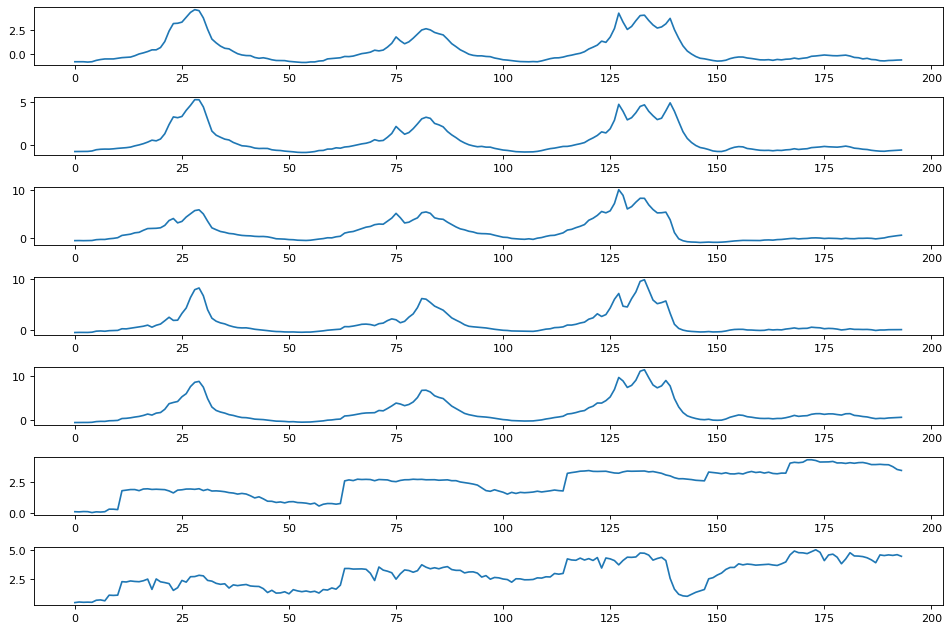

In [14]:
data = ili[0][1]

step = 1
plt.figure(figsize=(12, 8), dpi=80)

plt.subplot(7,1,1)
plt.plot(data[0, ::step])

plt.subplot(7,1,2)
plt.plot(data[1, ::step])

plt.subplot(7,1,3)
plt.plot(data[2, ::step])

plt.subplot(7,1,4)
plt.plot(data[3, ::step])

plt.subplot(7,1,5)
plt.plot(data[4, ::step])

plt.subplot(7,1,6)
plt.plot(data[5, ::step])

plt.subplot(7,1,7)
plt.plot(data[6, ::step])

plt.tight_layout()
plt.show()

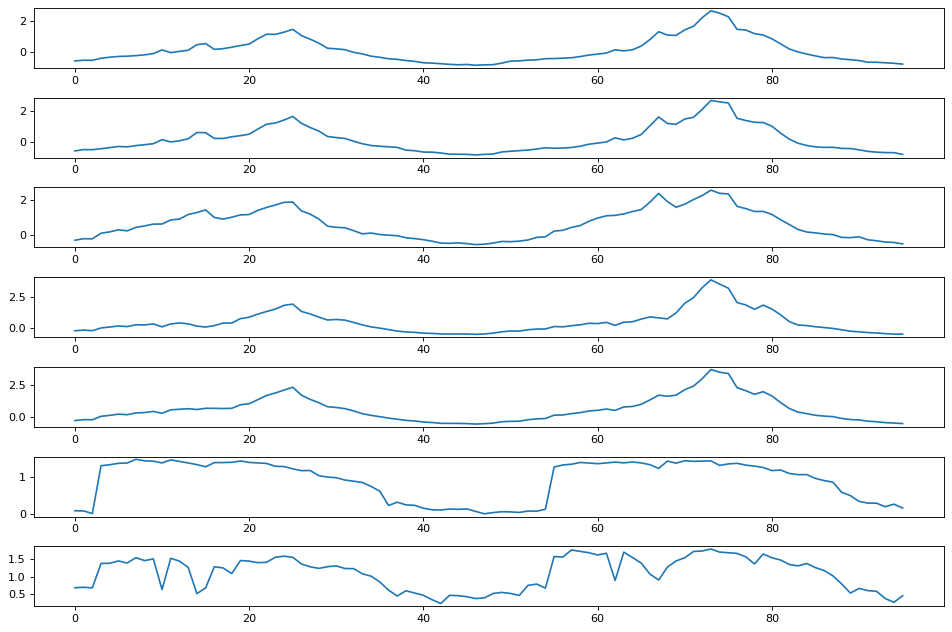

In [10]:
data = ili[0][1]

step = 1
plt.figure(figsize=(12, 8), dpi=80)

plt.subplot(7,1,1)
plt.plot(data[0, ::step])

plt.subplot(7,1,2)
plt.plot(data[1, ::step])

plt.subplot(7,1,3)
plt.plot(data[2, ::step])

plt.subplot(7,1,4)
plt.plot(data[3, ::step])

plt.subplot(7,1,5)
plt.plot(data[4, ::step])

plt.subplot(7,1,6)
plt.plot(data[5, ::step])

plt.subplot(7,1,7)
plt.plot(data[6, ::step])

plt.tight_layout()
plt.show()

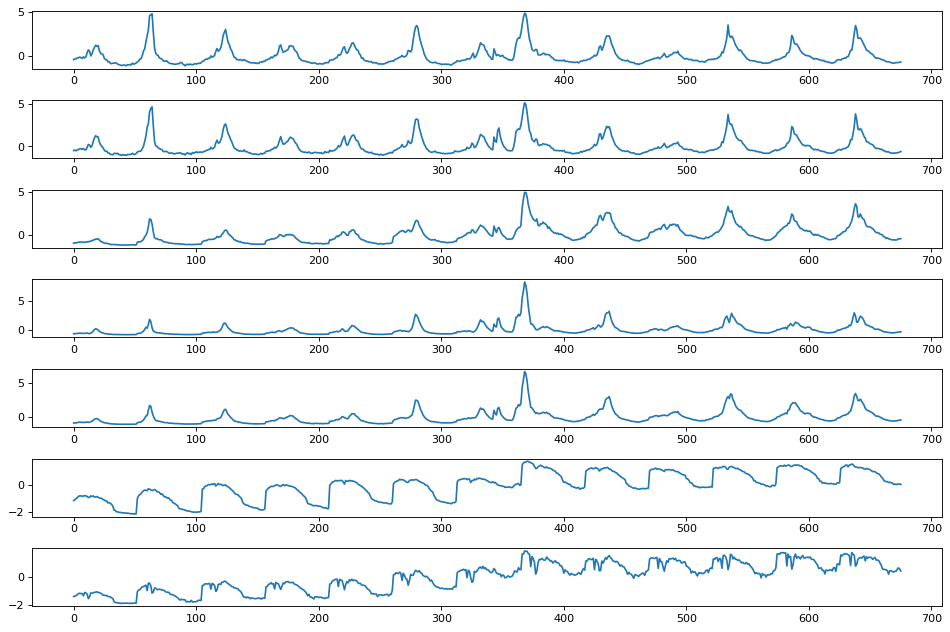

In [6]:
data = ili[0][1]

step = 1
plt.figure(figsize=(12, 8), dpi=80)

plt.subplot(7,1,1)
plt.plot(data[0, ::step])

plt.subplot(7,1,2)
plt.plot(data[1, ::step])

plt.subplot(7,1,3)
plt.plot(data[2, ::step])

plt.subplot(7,1,4)
plt.plot(data[3, ::step])

plt.subplot(7,1,5)
plt.plot(data[4, ::step])

plt.subplot(7,1,6)
plt.plot(data[5, ::step])

plt.subplot(7,1,7)
plt.plot(data[6, ::step])

plt.tight_layout()
plt.show()

TiCorp low-data subsets

In [2]:
train_100 = torch.load("/home/oturgut/data/processed/TiCorp/train_wo_mimic_new.pt")

In [3]:
len(train_100)

222394

In [11]:
audio_mono_100 = [sample for sample in train_100 if sample[0] == "audio_mono"]
audio_stereo_100 = [sample for sample in train_100 if sample[0] == "audio_stereo"]
banking_100 = [sample for sample in train_100 if sample[0] == "banking"]
ecg_100 = [sample for sample in train_100 if sample[0] == "ecg"]
economics_100 = [sample for sample in train_100 if sample[0] == "economics"]
eeg_1020_100 = [sample for sample in train_100 if sample[0] == "eeg_10-20"]
electromechanics_100 = [sample for sample in train_100 if sample[0] == "electromechanics"]
temperature_100 = [sample for sample in train_100 if sample[0] == "temperature"]

In [13]:
len(audio_mono_100), len(audio_stereo_100), len(banking_100), len(ecg_100), len(economics_100), len(eeg_1020_100), len(electromechanics_100), len(temperature_100)

(3491, 15142, 105, 0, 108, 3198, 7774, 192576)

In [20]:
train_10 = audio_mono_100[:349] + audio_stereo_100[:1514] + banking_100[:11] + economics_100[:11] + eeg_1020_100[:320] + electromechanics_100[:777] + temperature_100[:19257]
train_1 = audio_mono_100[:35] + audio_stereo_100[:151] + banking_100[:1] + economics_100[:1] + eeg_1020_100[:32] + electromechanics_100[:77] + temperature_100[:1926]

In [21]:
len(train_1), len(train_10)

(2223, 22239)

In [24]:
# torch.save([(sample[0], sample[1].clone()) for sample in train_1], "/home/oturgut/data/processed/TiCorp/train_wo_mimic_new_1percent.pt")
# torch.save([(sample[0], sample[1].clone()) for sample in train_10], "/home/oturgut/data/processed/TiCorp/train_wo_mimic_new_10percent.pt")

Electricity (ECL)

In [2]:
domain = "electricity"
data = torch.load(f"/home/oturgut/data/processed/benchmarks/forecasting/data_{domain}_all.pt")
len(data), data[0][0], data[0][1].shape

(321, 'electricity', torch.Size([1, 26304]))

In [7]:
data_rearranged = torch.cat([b for a, b in data])
print(data_rearranged.shape)

torch.Size([321, 26304])


In [3]:
sample = data[0][1]
data_train = sample[:, :int(0.7*sample.shape[-1])]
data_val = sample[:, int(0.7*sample.shape[-1]):int(0.8*sample.shape[-1])]
data_test = sample[:, int(0.8*sample.shape[-1]):]

print(data_train.shape, data_val.shape, data_test.shape)

torch.Size([1, 18412]) torch.Size([1, 2631]) torch.Size([1, 5261])


In [6]:
data_train = [(domain, sample[:, :int(0.7*sample.shape[-1])].clone()) for domain, sample in data]
data_val = [(domain, sample[:, int(0.7*sample.shape[-1]):int(0.8*sample.shape[-1])].clone()) for domain, sample in data]
data_test = [(domain, sample[:, int(0.8*sample.shape[-1]):].clone()) for domain, sample in data]

print(data_train[0][1].shape, data_val[0][1].shape, data_test[0][1].shape)

torch.Size([1, 18412]) torch.Size([1, 2631]) torch.Size([1, 5261])


In [8]:
# torch.save(data_train, f"/home/oturgut/data/processed/benchmarks/forecasting/{domain}/train.pt")
# torch.save(data_val, f"/home/oturgut/data/processed/benchmarks/forecasting/{domain}/val.pt")
# torch.save(data_test, f"/home/oturgut/data/processed/benchmarks/forecasting/{domain}/test.pt")

Weather

In [2]:
weather = pd.read_csv("/home/oturgut/data/benchmarks/weather.csv")

In [3]:
weather_tensor = torch.tensor(np.array(weather.values[:, 1:], dtype=float)).permute(1, 0)
weather_tensor.shape

torch.Size([21, 52696])

In [4]:
weather_train_o = weather_tensor[:, :int(0.7*weather_tensor.shape[-1])]
weather_val_o = weather_tensor[:, int(0.7*weather_tensor.shape[-1]):int(0.8*weather_tensor.shape[-1])]
weather_test_o = weather_tensor[:, int(0.8*weather_tensor.shape[-1]):]

print(weather_train_o.shape, weather_val_o.shape, weather_test_o.shape)

torch.Size([21, 36887]) torch.Size([21, 5269]) torch.Size([21, 10540])


In [ ]:
# etth1_train_o_norm = (etth1_train_o - etth1_train_o.mean(dim=-1, keepdim=True)) / etth1_train_o.std(dim=-1, keepdim=True)
# etth1_val_o_norm = (etth1_val_o - etth1_val_o.mean(dim=-1, keepdim=True)) / etth1_val_o.std(dim=-1, keepdim=True)
# etth1_test_o_norm = (etth1_test_o - etth1_test_o.mean(dim=-1, keepdim=True)) / etth1_test_o.std(dim=-1, keepdim=True)

In [5]:
weather_train_o_norm = (weather_train_o - weather_train_o.mean(dim=-1, keepdim=True)) / weather_train_o.std(dim=-1, keepdim=True)
weather_val_o_norm = (weather_val_o - weather_train_o.mean(dim=-1, keepdim=True)) / weather_train_o.std(dim=-1, keepdim=True)
weather_test_o_norm = (weather_test_o - weather_train_o.mean(dim=-1, keepdim=True)) / weather_train_o.std(dim=-1, keepdim=True)

In [6]:
weather_train_o_norm = weather_train_o_norm.to(torch.float32)
weather_val_o_norm = weather_val_o_norm.to(torch.float32)
weather_test_o_norm = weather_test_o_norm.to(torch.float32)

In [7]:
# torch.save([("weather", weather_train_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/weather/train_correct_norm.pt")
# torch.save([("weather", weather_val_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/weather/val_correct_norm.pt")
# torch.save([("weather", weather_test_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/weather/test_correct_norm.pt")

Electricity (ECL)

In [2]:
electricity = pd.read_csv("/home/oturgut/data/benchmarks/electricity.csv")

In [3]:
electricity_tensor = torch.tensor(np.array(electricity.values[:, 1:], dtype=float)).permute(1, 0)
electricity_tensor.shape

torch.Size([321, 26304])

In [4]:
electricity_train_o = electricity_tensor[:, :int(0.7*electricity_tensor.shape[-1])]
electricity_val_o = electricity_tensor[:, int(0.7*electricity_tensor.shape[-1]):int(0.8*electricity_tensor.shape[-1])]
electricity_test_o = electricity_tensor[:, int(0.8*electricity_tensor.shape[-1]):]

print(electricity_train_o.shape, electricity_val_o.shape, electricity_test_o.shape)

torch.Size([321, 18412]) torch.Size([321, 2631]) torch.Size([321, 5261])


In [ ]:
# electricity_train_o_norm = (electricity_train_o - electricity_train_o.mean(dim=-1, keepdim=True)) / electricity_train_o.std(dim=-1, keepdim=True)
# electricity_val_o_norm = (electricity_val_o - electricity_val_o.mean(dim=-1, keepdim=True)) / electricity_val_o.std(dim=-1, keepdim=True)
# electricity_test_o_norm = (electricity_test_o - electricity_test_o.mean(dim=-1, keepdim=True)) / electricity_test_o.std(dim=-1, keepdim=True)

In [5]:
electricity_train_o_norm = (electricity_train_o - electricity_train_o.mean(dim=-1, keepdim=True)) / electricity_train_o.std(dim=-1, keepdim=True)
electricity_val_o_norm = (electricity_val_o - electricity_train_o.mean(dim=-1, keepdim=True)) / electricity_train_o.std(dim=-1, keepdim=True)
electricity_test_o_norm = (electricity_test_o - electricity_train_o.mean(dim=-1, keepdim=True)) / electricity_train_o.std(dim=-1, keepdim=True)

In [6]:
electricity_train_o_norm = electricity_train_o_norm.to(torch.float32)
electricity_val_o_norm = electricity_val_o_norm.to(torch.float32)
electricity_test_o_norm = electricity_test_o_norm.to(torch.float32)

In [18]:
# torch.save([("electricity", electricity_train_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/electricity/train_mv_correct_norm.pt")
# torch.save([("electricity", electricity_val_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/electricity/val_mv_correct_norm.pt")
# torch.save([("electricity", electricity_test_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/electricity/test_mv_correct_norm.pt")

In [15]:
elec_train = [("electricity", sample.unsqueeze(0).clone()) for sample in electricity_train_o_norm]
elec_val = [("electricity", sample.unsqueeze(0).clone()) for sample in electricity_val_o_norm]
elec_test = [("electricity", sample.unsqueeze(0).clone()) for sample in electricity_test_o_norm]

In [16]:
elec_train[0][1].shape

torch.Size([1, 18412])

In [11]:
elec_mv = torch.load("/home/oturgut/data/processed/benchmarks/forecasting/electricity/train.pt")

In [14]:
elec_mv[0][1].shape

torch.Size([1, 18412])

In [17]:
# torch.save(elec_train, "/home/oturgut/data/processed/benchmarks/forecasting/electricity/train_correct_norm.pt")
# torch.save(elec_val, "/home/oturgut/data/processed/benchmarks/forecasting/electricity/val_correct_norm.pt")
# torch.save(elec_test, "/home/oturgut/data/processed/benchmarks/forecasting/electricity/test_correct_norm.pt")

ETT

In [2]:
etth = torch.load("/home/oturgut/data/processed/benchmarks/forecasting/data_etth_all.pt")
len(etth), etth[0][0], etth[0][1].shape

(2, 'etth', torch.Size([7, 17420]))

In [11]:
etth1 = etth[0][1]
etth1_train = etth1[:, :int(0.6*etth1.shape[-1])]
etth1_val = etth1[:, int(0.6*etth1.shape[-1]):int(0.8*etth1.shape[-1])]
etth1_test = etth1[:, int(0.8*etth1.shape[-1]):]

print(etth1_train.shape, etth1_val.shape, etth1_test.shape)

torch.Size([7, 10452]) torch.Size([7, 3484]) torch.Size([7, 3484])


In [12]:
# torch.save([(etth[0][0], etth1_train.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth1/train.pt")
# torch.save([(etth[0][0], etth1_val.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth1/val.pt")
# torch.save([(etth[0][0], etth1_test.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth1/test.pt")

In [13]:
etth2 = etth[1][1]
etth2_train = etth2[:, :int(0.6*etth2.shape[-1])]
etth2_val = etth2[:, int(0.6*etth2.shape[-1]):int(0.8*etth2.shape[-1])]
etth2_test = etth2[:, int(0.8*etth2.shape[-1]):]

print(etth2_train.shape, etth2_val.shape, etth2_test.shape)

torch.Size([7, 10452]) torch.Size([7, 3484]) torch.Size([7, 3484])


In [14]:
# torch.save([(etth[0][0], etth2_train.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth2/train.pt")
# torch.save([(etth[0][0], etth2_val.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth2/val.pt")
# torch.save([(etth[0][0], etth2_test.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth2/test.pt")

In [2]:
ettm = torch.load("/home/oturgut/data/processed/benchmarks/forecasting/data_ettm_all.pt")
len(ettm), ettm[0][0], ettm[0][1].shape

(2, 'ettm', torch.Size([7, 69680]))

In [16]:
ettm1 = ettm[0][1]
ettm1_train = ettm1[:, :int(0.6*ettm1.shape[-1])]
ettm1_val = ettm1[:, int(0.6*ettm1.shape[-1]):int(0.8*ettm1.shape[-1])]
ettm1_test = ettm1[:, int(0.8*ettm1.shape[-1]):]

print(ettm1_train.shape, ettm1_val.shape, ettm1_test.shape)

torch.Size([7, 41808]) torch.Size([7, 13936]) torch.Size([7, 13936])


In [17]:
# torch.save([(ettm[0][0], ettm1_train.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm1/train.pt")
# torch.save([(ettm[0][0], ettm1_val.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm1/val.pt")
# torch.save([(ettm[0][0], ettm1_test.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm1/test.pt")

In [18]:
ettm2 = ettm[1][1]
ettm2_train = ettm2[:, :int(0.6*ettm2.shape[-1])]
ettm2_val = ettm2[:, int(0.6*ettm2.shape[-1]):int(0.8*ettm2.shape[-1])]
ettm2_test = ettm2[:, int(0.8*ettm2.shape[-1]):]

print(ettm2_train.shape, ettm2_val.shape, ettm2_test.shape)

torch.Size([7, 41808]) torch.Size([7, 13936]) torch.Size([7, 13936])


In [19]:
# torch.save([(ettm[0][0], ettm2_train.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm2/train.pt")
# torch.save([(ettm[0][0], ettm2_val.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm2/val.pt")
# torch.save([(ettm[0][0], ettm2_test.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm2/test.pt")

In [9]:
etth1 = pd.read_csv("/home/oturgut/data/benchmarks/ETTh1.csv")

In [10]:
etth1_tensor = torch.tensor(np.array(etth1.values[:, 1:], dtype=float)).permute(1, 0)
etth1_tensor.shape

torch.Size([7, 17420])

In [11]:
etth1_train_o = etth1_tensor[:, :int(0.6*etth1_tensor.shape[-1])]
etth1_val_o = etth1_tensor[:, int(0.6*etth1_tensor.shape[-1]):int(0.8*etth1_tensor.shape[-1])]
etth1_test_o = etth1_tensor[:, int(0.8*etth1_tensor.shape[-1]):]

print(etth1_train_o.shape, etth1_val_o.shape, etth1_test_o.shape)

torch.Size([7, 10452]) torch.Size([7, 3484]) torch.Size([7, 3484])


In [ ]:
# etth1_train_o_norm = (etth1_train_o - etth1_train_o.mean(dim=-1, keepdim=True)) / etth1_train_o.std(dim=-1, keepdim=True)
# etth1_val_o_norm = (etth1_val_o - etth1_val_o.mean(dim=-1, keepdim=True)) / etth1_val_o.std(dim=-1, keepdim=True)
# etth1_test_o_norm = (etth1_test_o - etth1_test_o.mean(dim=-1, keepdim=True)) / etth1_test_o.std(dim=-1, keepdim=True)

In [12]:
etth1_train_o_norm = (etth1_train_o - etth1_train_o.mean(dim=-1, keepdim=True)) / etth1_train_o.std(dim=-1, keepdim=True)
etth1_val_o_norm = (etth1_val_o - etth1_train_o.mean(dim=-1, keepdim=True)) / etth1_train_o.std(dim=-1, keepdim=True)
etth1_test_o_norm = (etth1_test_o - etth1_train_o.mean(dim=-1, keepdim=True)) / etth1_train_o.std(dim=-1, keepdim=True)

In [13]:
etth1_train_o_norm = etth1_train_o_norm.to(torch.float32)
etth1_val_o_norm = etth1_val_o_norm.to(torch.float32)
etth1_test_o_norm = etth1_test_o_norm.to(torch.float32)

In [14]:
# torch.save([(etth[0][0], etth1_train_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth1/train_correct_norm.pt")
# torch.save([(etth[0][0], etth1_val_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth1/val_correct_norm.pt")
# torch.save([(etth[0][0], etth1_test_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth1/test_correct_norm.pt")

In [2]:
etth2 = pd.read_csv("/home/oturgut/data/benchmarks/ett_fresh/ETTh2.csv")

In [3]:
etth2_tensor = torch.tensor(np.array(etth2.values[:, 1:], dtype=float)).permute(1, 0)
etth2_tensor.shape

torch.Size([7, 17420])

In [4]:
etth2_train_o = etth2_tensor[:, :int(0.6*etth2_tensor.shape[-1])]
etth2_val_o = etth2_tensor[:, int(0.6*etth2_tensor.shape[-1]):int(0.8*etth2_tensor.shape[-1])]
etth2_test_o = etth2_tensor[:, int(0.8*etth2_tensor.shape[-1]):]

print(etth2_train_o.shape, etth2_val_o.shape, etth2_test_o.shape)

torch.Size([7, 10452]) torch.Size([7, 3484]) torch.Size([7, 3484])


In [5]:
# etth2_train_o_norm = (etth2_train_o - etth2_train_o.mean(dim=-1, keepdim=True)) / etth2_train_o.std(dim=-1, keepdim=True)
# etth2_val_o_norm = (etth2_val_o - etth2_val_o.mean(dim=-1, keepdim=True)) / etth2_val_o.std(dim=-1, keepdim=True)
# etth2_test_o_norm = (etth2_test_o - etth2_test_o.mean(dim=-1, keepdim=True)) / etth2_test_o.std(dim=-1, keepdim=True)

In [5]:
etth2_train_o_norm = (etth2_train_o - etth2_train_o.mean(dim=-1, keepdim=True)) / etth2_train_o.std(dim=-1, keepdim=True)
etth2_val_o_norm = (etth2_val_o - etth2_train_o.mean(dim=-1, keepdim=True)) / etth2_train_o.std(dim=-1, keepdim=True)
etth2_test_o_norm = (etth2_test_o - etth2_train_o.mean(dim=-1, keepdim=True)) / etth2_train_o.std(dim=-1, keepdim=True)

In [6]:
etth2_train_o_norm = etth2_train_o_norm.to(torch.float32)
etth2_val_o_norm = etth2_val_o_norm.to(torch.float32)
etth2_test_o_norm = etth2_test_o_norm.to(torch.float32)

In [7]:
# torch.save([("etth", etth2_train_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth2/train_correct_norm_fresh.pt")
# torch.save([("etth", etth2_val_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth2/val_correct_norm_fresh.pt")
# torch.save([("etth", etth2_test_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth2/test_correct_norm_fresh.pt")

In [14]:
etth2 = pd.read_csv("/home/oturgut/data/benchmarks/ett_fresh/ETTh2.csv")

In [15]:
etth2_tensor = torch.tensor(np.array(etth2.values[:, 1:], dtype=float)).permute(1, 0)
etth2_tensor.shape

torch.Size([7, 17420])

In [16]:
etth2_train_o = etth2_tensor[:, :int(0.6*etth2_tensor.shape[-1])]
etth2_val_o = etth2_tensor[:, int(0.6*etth2_tensor.shape[-1]):int(0.8*etth2_tensor.shape[-1])]
etth2_test_o = etth2_tensor[:, int(0.8*etth2_tensor.shape[-1]):]

print(etth2_train_o.shape, etth2_val_o.shape, etth2_test_o.shape)

torch.Size([7, 10452]) torch.Size([7, 3484]) torch.Size([7, 3484])


In [ ]:
# etth1_train_o_norm = (etth1_train_o - etth1_train_o.mean(dim=-1, keepdim=True)) / etth1_train_o.std(dim=-1, keepdim=True)
# etth1_val_o_norm = (etth1_val_o - etth1_val_o.mean(dim=-1, keepdim=True)) / etth1_val_o.std(dim=-1, keepdim=True)
# etth1_test_o_norm = (etth1_test_o - etth1_test_o.mean(dim=-1, keepdim=True)) / etth1_test_o.std(dim=-1, keepdim=True)

In [17]:
etth2_train_o_norm = (etth2_train_o - etth2_train_o.mean(dim=-1, keepdim=True)) / etth2_train_o.std(dim=-1, keepdim=True)
etth2_val_o_norm = (etth2_val_o - etth2_train_o.mean(dim=-1, keepdim=True)) / etth2_train_o.std(dim=-1, keepdim=True)
etth2_test_o_norm = (etth2_test_o - etth2_train_o.mean(dim=-1, keepdim=True)) / etth2_train_o.std(dim=-1, keepdim=True)

In [18]:
etth2_train_o_norm = etth2_train_o_norm.to(torch.float32)
etth2_val_o_norm = etth2_val_o_norm.to(torch.float32)
etth2_test_o_norm = etth2_test_o_norm.to(torch.float32)

In [19]:
# torch.save([("etth", etth2_train_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth2/train_correct_norm_fresh.pt")
# torch.save([("etth", etth2_val_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth2/val_correct_norm_fresh.pt")
# torch.save([("etth", etth2_test_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/etth2/test_correct_norm_fresh.pt")

In [3]:
ettm1 = pd.read_csv("/home/oturgut/data/benchmarks/ETTm1.csv")

In [4]:
ettm1

date    HUFL   HULL   MUFL   MULL   LUFL   LULL  \
0      2016-07-01 00:00:00   5.827  2.009  1.599  0.462  4.203  1.340   
1      2016-07-01 00:15:00   5.760  2.076  1.492  0.426  4.264  1.401   
2      2016-07-01 00:30:00   5.760  1.942  1.492  0.391  4.234  1.310   
3      2016-07-01 00:45:00   5.760  1.942  1.492  0.426  4.234  1.310   
4      2016-07-01 01:00:00   5.693  2.076  1.492  0.426  4.142  1.371   
...                    ...     ...    ...    ...    ...    ...    ...   
69675  2018-06-26 18:45:00   9.310  3.550  5.437  1.670  3.868  1.462   
69676  2018-06-26 19:00:00  10.114  3.550  6.183  1.564  3.716  1.462   
69677  2018-06-26 19:15:00  10.784  3.349  7.000  1.635  3.746  1.432   
69678  2018-06-26 19:30:00  11.655  3.617  7.533  1.706  4.173  1.523   
69679  2018-06-26 19:45:00  12.994  3.818  8.244  1.777  4.721  1.523   

              OT  
0      30.531000  
1      30.459999  
2      30.038000  
3      27.013000  
4      27.787001  
...          ...  
69675   9.567000  
69676   9.567000  
69677   9.426000  
69678   9.426000  
69679   9.778000  

[69680 rows x 8 columns]

In [16]:
np.array(ettm1.values[:, 1:], dtype=float)

array([[ 5.82700014,  2.00900006,  1.59899998, ...,  4.20300007,
         1.34000003, 30.53100014],
       [ 5.76000023,  2.07599998,  1.49199998, ...,  4.26399994,
         1.40100002, 30.45999908],
       [ 5.76000023,  1.94200003,  1.49199998, ...,  4.23400021,
         1.30999994, 30.03800011],
       ...,
       [10.7840004 ,  3.34899998,  7.        , ...,  3.74600005,
         1.43200004,  9.42599964],
       [11.65499973,  3.6170001 ,  7.53299999, ...,  4.17299986,
         1.523     ,  9.42599964],
       [12.99400043,  3.81800008,  8.24400043, ...,  4.72100019,
         1.523     ,  9.77799988]])

In [5]:
ettm1_tensor = torch.tensor(np.array(ettm1.values[:, 1:], dtype=float)).permute(1, 0)
ettm1_tensor.shape

torch.Size([7, 69680])

In [8]:
ettm1_train_o = ettm1_tensor[:, :int(0.6*ettm1_tensor.shape[-1])]
ettm1_val_o = ettm1_tensor[:, int(0.6*ettm1_tensor.shape[-1]):int(0.8*ettm1_tensor.shape[-1])]
ettm1_test_o = ettm1_tensor[:, int(0.8*ettm1_tensor.shape[-1]):]

print(ettm1_train_o.shape, ettm1_val_o.shape, ettm1_test_o.shape)

torch.Size([7, 41808]) torch.Size([7, 13936]) torch.Size([7, 13936])


In [7]:
# ettm1_train_o = ettm1_train_o.to(torch.float32)
# ettm1_val_o = ettm1_val_o.to(torch.float32)
# ettm1_test_o = ettm1_test_o.to(torch.float32)

In [ ]:
# torch.save([("ettm", ettm1_train_o.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm1/train_orig.pt")
# torch.save([("ettm", ettm1_val_o.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm1/val_orig.pt")
# torch.save([("ettm", ettm1_test_o.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm1/test_orig.pt")

In [ ]:
# ettm1_train_o_norm = (ettm1_train_o - ettm1_train_o.mean(dim=-1, keepdim=True)) / ettm1_train_o.std(dim=-1, keepdim=True)
# ettm1_val_o_norm = (ettm1_val_o - ettm1_val_o.mean(dim=-1, keepdim=True)) / ettm1_val_o.std(dim=-1, keepdim=True)
# ettm1_test_o_norm = (ettm1_test_o - ettm1_test_o.mean(dim=-1, keepdim=True)) / ettm1_test_o.std(dim=-1, keepdim=True)

In [9]:
ettm1_train_o_norm = (ettm1_train_o - ettm1_train_o.mean(dim=-1, keepdim=True)) / ettm1_train_o.std(dim=-1, keepdim=True)
ettm1_val_o_norm = (ettm1_val_o - ettm1_train_o.mean(dim=-1, keepdim=True)) / ettm1_train_o.std(dim=-1, keepdim=True)
ettm1_test_o_norm = (ettm1_test_o - ettm1_train_o.mean(dim=-1, keepdim=True)) / ettm1_train_o.std(dim=-1, keepdim=True)

In [11]:
ettm1_train_o_norm = ettm1_train_o_norm.to(torch.float32)
ettm1_val_o_norm = ettm1_val_o_norm.to(torch.float32)
ettm1_test_o_norm = ettm1_test_o_norm.to(torch.float32)

In [12]:
# torch.save([("ettm", ettm1_train_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm1/train_correct_norm.pt")
# torch.save([("ettm", ettm1_val_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm1/val_correct_norm.pt")
# torch.save([("ettm", ettm1_test_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm1/test_correct_norm.pt")

In [8]:
ettm2 = pd.read_csv("/home/oturgut/data/benchmarks/ett_fresh/ETTm2.csv")

In [9]:
ettm2_tensor = torch.tensor(np.array(ettm2.values[:, 1:], dtype=float)).permute(1, 0)
ettm2_tensor.shape

torch.Size([7, 69680])

In [10]:
ettm2_train_o = ettm2_tensor[:, :int(0.6*ettm2_tensor.shape[-1])]
ettm2_val_o = ettm2_tensor[:, int(0.6*ettm2_tensor.shape[-1]):int(0.8*ettm2_tensor.shape[-1])]
ettm2_test_o = ettm2_tensor[:, int(0.8*ettm2_tensor.shape[-1]):]

print(ettm2_train_o.shape, ettm2_val_o.shape, ettm2_test_o.shape)

torch.Size([7, 41808]) torch.Size([7, 13936]) torch.Size([7, 13936])


In [21]:
# ettm2_train_o = ettm2_train_o.to(torch.float32)
# ettm2_val_o = ettm2_val_o.to(torch.float32)
# ettm2_test_o = ettm2_test_o.to(torch.float32)

In [22]:
# torch.save([("ettm", ettm2_train_o.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm2/train_orig.pt")
# torch.save([("ettm", ettm2_val_o.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm2/val_orig.pt")
# torch.save([("ettm", ettm2_test_o.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm2/test_orig.pt")

In [49]:
# ettm2_train_o_norm = (ettm2_train_o - ettm2_train_o.mean(dim=-1, keepdim=True)) / ettm2_train_o.std(dim=-1, keepdim=True)
# ettm2_val_o_norm = (ettm2_val_o - ettm2_val_o.mean(dim=-1, keepdim=True)) / ettm2_val_o.std(dim=-1, keepdim=True)
# ettm2_test_o_norm = (ettm2_test_o - ettm2_test_o.mean(dim=-1, keepdim=True)) / ettm2_test_o.std(dim=-1, keepdim=True)

In [11]:
ettm2_train_o_norm = (ettm2_train_o - ettm2_train_o.mean(dim=-1, keepdim=True)) / ettm2_train_o.std(dim=-1, keepdim=True)
ettm2_val_o_norm = (ettm2_val_o - ettm2_train_o.mean(dim=-1, keepdim=True)) / ettm2_train_o.std(dim=-1, keepdim=True)
ettm2_test_o_norm = (ettm2_test_o - ettm2_train_o.mean(dim=-1, keepdim=True)) / ettm2_train_o.std(dim=-1, keepdim=True)

In [12]:
ettm2_train_o_norm = ettm2_train_o_norm.to(torch.float32)
ettm2_val_o_norm = ettm2_val_o_norm.to(torch.float32)
ettm2_test_o_norm = ettm2_test_o_norm.to(torch.float32)

In [13]:
# torch.save([("ettm", ettm2_train_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm2/train_correct_norm_fresh.pt")
# torch.save([("ettm", ettm2_val_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm2/val_correct_norm_fresh.pt")
# torch.save([("ettm", ettm2_test_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ettm2/test_correct_norm_fresh.pt")

ILI

In [2]:
ili = pd.read_csv("/home/oturgut/data/benchmarks/national_illness.csv")

In [3]:
ili

date  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  AGE 5-24  \
0    2002-01-01 00:00:00        1.222620         1.166680      582       805   
1    2002-01-08 00:00:00        1.333440         1.216500      683       872   
2    2002-01-15 00:00:00        1.319290         1.130570      642       878   
3    2002-01-22 00:00:00        1.494840         1.252460      728      1045   
4    2002-01-29 00:00:00        1.471950         1.302370      823      1189   
..                   ...             ...              ...      ...       ...   
961  2020-06-02 00:00:00        0.839059         0.846722     2756      3528   
962  2020-06-09 00:00:00        0.895958         0.908885     3203      3778   
963  2020-06-16 00:00:00        0.910926         0.941625     3478      3796   
964  2020-06-23 00:00:00        0.946945         0.972185     3734      3818   
965  2020-06-30 00:00:00        0.963716         1.013760     3955      3843   

     ILITOTAL  NUM. OF PROVIDERS       OT  
0        2060                754   176569  
1        2267                785   186355  
2        2176                831   192469  
3        2599                863   207512  
4        2907                909   223208  
..        ...                ...      ...  
961     12913               3258  1525058  
962     13979               3254  1538038  
963     14389               3177  1528103  
964     14999               3066  1542813  
965     15307               3027  1509928  

[966 rows x 8 columns]

In [4]:
ili_tensor = torch.tensor(np.array(ili.values[:, 1:], dtype=float)).permute(1, 0)
ili_tensor.shape

torch.Size([7, 966])

In [5]:
ili_train_o = ili_tensor[:, :int(0.7*ili_tensor.shape[-1])]
ili_val_o = ili_tensor[:, int(0.7*ili_tensor.shape[-1]):int(0.8*ili_tensor.shape[-1])]
ili_test_o = ili_tensor[:, int(0.8*ili_tensor.shape[-1]):]

print(ili_train_o.shape, ili_val_o.shape, ili_test_o.shape)

torch.Size([7, 676]) torch.Size([7, 96]) torch.Size([7, 194])


In [6]:
ili_train_o_norm = (ili_train_o - ili_train_o.mean(dim=-1, keepdim=True)) / ili_train_o.std(dim=-1, keepdim=True)
ili_val_o_norm = (ili_val_o - ili_train_o.mean(dim=-1, keepdim=True)) / ili_train_o.std(dim=-1, keepdim=True)
ili_test_o_norm = (ili_test_o - ili_train_o.mean(dim=-1, keepdim=True)) / ili_train_o.std(dim=-1, keepdim=True)

In [7]:
ili_train_o_norm = ili_train_o_norm.to(torch.float32)
ili_val_o_norm = ili_val_o_norm.to(torch.float32)
ili_test_o_norm = ili_test_o_norm.to(torch.float32)

In [19]:
# torch.save([("ili", ili_train_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ili/train_correct_norm.pt")
# torch.save([("ili", ili_val_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ili/val_correct_norm.pt")
# torch.save([("ili", ili_test_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/ili/test_correct_norm.pt")

In [8]:
# torch.save([("ili", sample.unsqueeze(0).clone()) for sample in ili_train_o_norm], "/home/oturgut/data/processed/benchmarks/forecasting/ili/train_uv_correct_norm.pt")
# torch.save([("ili", sample.unsqueeze(0).clone()) for sample in ili_val_o_norm], "/home/oturgut/data/processed/benchmarks/forecasting/ili/val_uv_correct_norm.pt")
# torch.save([("ili", sample.unsqueeze(0).clone()) for sample in ili_test_o_norm], "/home/oturgut/data/processed/benchmarks/forecasting/ili/test_uv_correct_norm.pt")

Traffic

In [19]:
traffic = pd.read_csv("/home/oturgut/data/benchmarks/traffic.csv")

In [20]:
traffic

date       0       1       2       3       4       5  \
0      2016-07-01 02:00:00  0.0048  0.0146  0.0289  0.0142  0.0064  0.0232   
1      2016-07-01 03:00:00  0.0072  0.0148  0.0350  0.0174  0.0084  0.0240   
2      2016-07-01 04:00:00  0.0040  0.0101  0.0267  0.0124  0.0049  0.0170   
3      2016-07-01 05:00:00  0.0039  0.0060  0.0218  0.0090  0.0029  0.0118   
4      2016-07-01 06:00:00  0.0042  0.0055  0.0191  0.0082  0.0024  0.0095   
...                    ...     ...     ...     ...     ...     ...     ...   
17539  2018-07-01 21:00:00  0.0342  0.0332  0.1378  0.0559  0.0165  0.0386   
17540  2018-07-01 22:00:00  0.0285  0.0253  0.0542  0.0485  0.0131  0.0331   
17541  2018-07-01 23:00:00  0.0276  0.0257  0.0551  0.0474  0.0121  0.0326   
17542  2018-07-02 00:00:00  0.0232  0.0229  0.0496  0.0435  0.0119  0.0297   
17543  2018-07-02 01:00:00  0.0090  0.0168  0.0365  0.0328  0.0084  0.0213   

            6       7       8  ...     852     853     854     855     856  \
0      0.0162  0.0242  0.0341  ...  0.0051  0.0051  0.0074  0.0079  0.0051   
1      0.0201  0.0338  0.0434  ...  0.0036  0.0036  0.0107  0.0058  0.0036   
2      0.0127  0.0255  0.0332  ...  0.0030  0.0030  0.0043  0.0050  0.0030   
3      0.0088  0.0163  0.0211  ...  0.0033  0.0033  0.0019  0.0052  0.0033   
4      0.0064  0.0087  0.0144  ...  0.0049  0.0049  0.0011  0.0071  0.0049   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
17539  0.0457  0.0687  0.0716  ...  0.0139  0.0179  0.0278  0.0280  0.0227   
17540  0.0372  0.0569  0.0669  ...  0.0116  0.0155  0.0201  0.0267  0.0207   
17541  0.0381  0.0566  0.0675  ...  0.0109  0.0142  0.0208  0.0252  0.0189   
17542  0.0361  0.0517  0.0598  ...  0.0092  0.0124  0.0219  0.0215  0.0169   
17543  0.0257  0.0475  0.0540  ...  0.0067  0.0085  0.0143  0.0151  0.0123   

          857     858     859     860      OT  
0      0.0051  0.0339  0.0051  0.0100  0.0121  
1      0.0036  0.0348  0.0036  0.0087  0.0136  
2      0.0030  0.0327  0.0030  0.0061  0.0107  
3      0.0033  0.0292  0.0033  0.0040  0.0071  
4      0.0049  0.0264  0.0049  0.0040  0.0039  
...       ...     ...     ...     ...     ...  
17539  0.0375  0.0142  0.0201  0.0341  0.0429  
17540  0.0320  0.0122  0.0163  0.0306  0.0363  
17541  0.0287  0.0123  0.0152  0.0292  0.0325  
17542  0.0258  0.0096  0.0130  0.0252  0.0279  
17543  0.0193  0.0061  0.0098  0.0170  0.0208  

[17544 rows x 863 columns]

In [21]:
traffic_tensor = torch.tensor(np.array(traffic.values[:, 1:], dtype=float)).permute(1, 0)
traffic_tensor.shape

torch.Size([862, 17544])

In [22]:
traffic_train_o = traffic_tensor[:, :int(0.7*traffic_tensor.shape[-1])]
traffic_val_o = traffic_tensor[:, int(0.7*traffic_tensor.shape[-1]):int(0.8*traffic_tensor.shape[-1])]
traffic_test_o = traffic_tensor[:, int(0.8*traffic_tensor.shape[-1]):]

print(traffic_train_o.shape, traffic_val_o.shape, traffic_test_o.shape)

torch.Size([862, 12280]) torch.Size([862, 1755]) torch.Size([862, 3509])


In [23]:
traffic_train_o_norm = (traffic_train_o - traffic_train_o.mean(dim=-1, keepdim=True)) / traffic_train_o.std(dim=-1, keepdim=True)
traffic_val_o_norm = (traffic_val_o - traffic_train_o.mean(dim=-1, keepdim=True)) / traffic_train_o.std(dim=-1, keepdim=True)
traffic_test_o_norm = (traffic_test_o - traffic_train_o.mean(dim=-1, keepdim=True)) / traffic_train_o.std(dim=-1, keepdim=True)

In [24]:
traffic_train_o_norm = traffic_train_o_norm.to(torch.float32)
traffic_val_o_norm = traffic_val_o_norm.to(torch.float32)
traffic_test_o_norm = traffic_test_o_norm.to(torch.float32)

In [26]:
# torch.save([("traffic", traffic_train_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/traffic/train_mv_correct_norm.pt")
# torch.save([("traffic", traffic_val_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/traffic/val_mv_correct_norm.pt")
# torch.save([("traffic", traffic_test_o_norm.clone())], "/home/oturgut/data/processed/benchmarks/forecasting/traffic/test_mv_correct_norm.pt")

In [25]:
# torch.save([("traffic", sample.unsqueeze(0).clone()) for sample in traffic_train_o_norm], "/home/oturgut/data/processed/benchmarks/forecasting/traffic/train_correct_norm.pt")
# torch.save([("traffic", sample.unsqueeze(0).clone()) for sample in traffic_val_o_norm], "/home/oturgut/data/processed/benchmarks/forecasting/traffic/val_correct_norm.pt")
# torch.save([("traffic", sample.unsqueeze(0).clone()) for sample in traffic_test_o_norm], "/home/oturgut/data/processed/benchmarks/forecasting/traffic/test_correct_norm.pt")

Exchange

In [6]:
exchange = torch.load("/home/oturgut/data/processed/benchmarks/forecasting/data_exchange_all.pt")
len(exchange), exchange[0][1].shape

(8, torch.Size([1, 7588]))

In [2]:
banking = torch.load("/home/oturgut/data/processed/Monash/fred_md.pt")
len(banking), banking[0][1].shape

(107, torch.Size([1, 728]))

In [6]:
audio = torch.load("/home/oturgut/data/philip/audio_stereo.pt")
audio.shape

torch.Size([2, 441000])

In [21]:
econ = torch.load("/home/oturgut/data/philip/economics_2.pt")
econ.shape

torch.Size([1, 728])

In [32]:
# torch.save(exchange[3][1], "/home/oturgut/data/philip/economics.pt")

In [2]:
ckpt_base = torch.load("/home/oturgut/otis/output/pre/otis/ticorp/multivariate/domain_specific/cos_weight0.0/ncc_weight0.1/seed0/baseDeep_dec160d4b/t1008/p1x24/wd0.1/m0.75/pre_b3744_blr3e-5/checkpoint-197-ncc-0.8818.pth", map_location="cpu")
ckpt_large = torch.load("/home/oturgut/otis/output/pre/otis/ticorp/multivariate/domain_specific/cos_weight0.0/ncc_weight0.1/seed0/largeDeep_dec160d4b/t1008/p1x24/wd0.15/m0.75/pre_b3680_blr1e-5/checkpoint-188-ncc-0.8919.pth", map_location="cpu")
ckpt_huge = torch.load("/home/oturgut/otis/output/pre/otis/ticorp/multivariate/domain_specific/cos_weight0.0/ncc_weight0.1/seed0/hugeDeep_dec160d4b/t1008/p1x24/wd0.05/m0.75/pre_b4320_blr3e-6/checkpoint-196-ncc-0.8827.pth", map_location="cpu")

new_ckpt_base = (ckpt_base["domain_offsets"], ckpt_base["model"]["pos_embed_y.weight"])
new_ckpt_large = (ckpt_large["domain_offsets"], ckpt_large["model"]["pos_embed_y.weight"])
new_ckpt_huge = (ckpt_huge["domain_offsets"], ckpt_huge["model"]["pos_embed_y.weight"])

['C0', '#dee2e6', '#a7c957', '#a7c957', 'C0', 'C0', 'C0']


/tmp/ipykernel_870928/4275407763.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


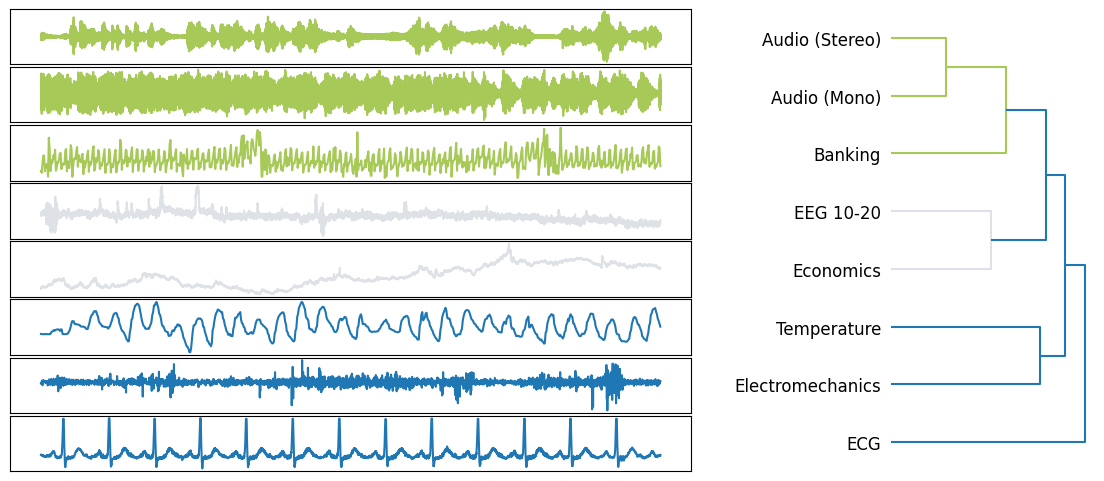

In [3]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn.functional as F

from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.cluster import hierarchy
hierarchy.set_link_color_palette(['#dee2e6', '#a7c957', 'y', 'k'])

name_map = {
    'eeg_10-20': 'EEG 10-20',
    'ecg': 'ECG',
    'banking': 'Banking',
    'economics': 'Economics',
    'temperature': 'Temperature',
    'audio_mono': 'Audio (Mono)',
    'audio_stereo': 'Audio (Stereo)',
    'electromechanics': 'Electromechanics',
}

def plot_dendrogram(ax, model: str = 'base'):
    # y, X = torch.load(f'/Users/philip/Documents/AI_for_Med/projects/otis/{model}Deep_pos_embed_y.pt')
    # y, X = torch.load("/home/oturgut/otis/output/pre/otis/base/dec160d4b/p1x24/pre_b2624_blr3e-5/baseDeep_pos_embed_y.pt")
    y, X = new_ckpt_base
    X = X[1:]  # remove pad token

    y_name_by_index = {index: name for name, index in y.items()}
    indices_sorted = sorted(y_name_by_index.keys())  

    y_names = []
    y_indices = []

    prev_index = None
    for index in indices_sorted:
        name = y_name_by_index[index]
        if prev_index is not None:
            y_names.extend([prev_name] * (index - prev_index))
            y_indices.extend(range(0, index - prev_index))
        prev_name = name
        prev_index = index
    # add the last one
    y_names.extend([prev_name] * (X.shape[0] - prev_index))
    y_indices.extend(range(0, X.shape[0] - prev_index))

    name_clusters = []
    names = list(set(y_names))
    for name in names:
        indices = [i for i, n in enumerate(y_names) if n == name]
        name_clusters.append((name, indices))
    X_clusters = []
    for name, indices in name_clusters:
        X_cluster = X[indices].mean(dim=0)
        X_clusters.append(X_cluster)
    X_clusters = torch.stack(X_clusters)
    X_clusters = F.normalize(X_clusters, p=2, dim=1)

    Z = linkage(X_clusters, 'complete')  #  ward, centroid, weighted, average, complete, single
    dn = dendrogram(Z, labels=names, orientation='right', show_contracted=False, ax=ax)

    leave_names = dn['ivl']
    leave_colors = dn['leaves_color_list']

    print(dn['color_list'])

    return leave_names, leave_colors


def plot_signal(ax, name, c, step = 1, upper_bnd = -1):
    name = name.replace('-', '_')
    data = torch.load(f"/home/oturgut/data/philip/{name}.pt")
    # data = torch.load(f'/Users/philip/Documents/AI_for_Med/projects/otis/{name}.pt')
    channel = 2 if name == 'eeg_10_20' else 0
    #print(data.shape, name, channel)
    ax.plot(data[channel, :upper_bnd:step], c=c)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    #ax.set_title(name)


# fig with axes: 2 columns, left column 1 row, right column 8 rows
plt.rcParams.update({'font.size': 20})  # Set the font size globally
fig3 = plt.figure(figsize=(14, 6))
# gridspec: right column smaller than left column
gs = fig3.add_gridspec(8, 2, width_ratios=[1, 0.3])
gs.update(wspace=0.45, hspace=0.05)

ax_dendrogram = fig3.add_subplot(gs[:, 1])
ax_plots = []
for i in range(8):
    ax_plots.append(fig3.add_subplot(gs[i, 0]))

leave_names, leave_colors = plot_dendrogram(ax_dendrogram, 'base')
for i, (name, c) in enumerate(zip(leave_names, leave_colors)):
    plot_signal(ax_plots[7-i], name, c)

ax_dendrogram.yaxis.set_visible(True)
ax_dendrogram.xaxis.set_visible(False)
# no outline
ax_dendrogram.spines['top'].set_visible(False)
ax_dendrogram.spines['right'].set_visible(False)
ax_dendrogram.spines['bottom'].set_visible(False)
ax_dendrogram.spines['left'].set_visible(False)
ax_dendrogram.set_yticklabels([name_map[name] for name in leave_names], fontsize=12)

plt.tight_layout()
# plt.savefig('../figures/dendrogram.pdf')

plt.show()

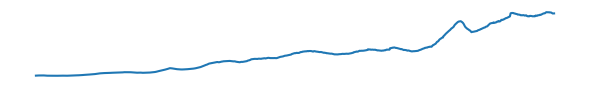

In [27]:
fig, ax = plt.subplots(figsize=(6, 1))
ax.plot(banking[50][1][0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.savefig("../figures/banking.pdf")
plt.savefig("../figures/banking.png", dpi=160)
plt.show()

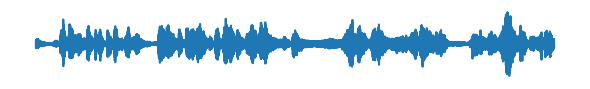

In [28]:
fig, ax = plt.subplots(figsize=(6, 1))
ax.plot(audio[0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.savefig("../figures/audio.pdf")
plt.savefig("../figures/audio.png", dpi=160)
plt.show()

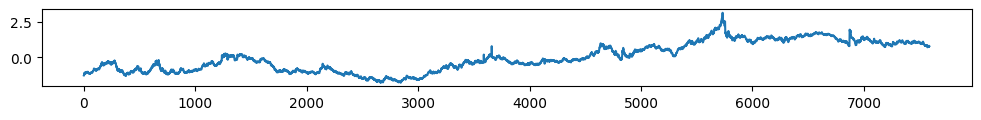

In [31]:
plt.figure(figsize=(12, 1))
plt.plot(exchange[3][1][0])
plt.show()

In [9]:
vit_0 = torch.tensor([.644, .643, .641, .637, .632])
vit_1 = torch.tensor([.635, .634, .633, .623, .621])
vit_2 = torch.tensor([.551, .550, .549, .544, .541])
vit_3 = torch.tensor([.431, .426, .417, .414, .403])

vit_5 = torch.tensor([.689, .686, .686, .685, .679])

In [12]:
vit_0.mean()**2, vit_1.mean()**2, vit_2.mean()**2, vit_3.mean()**2, vit_5.mean()**2

(tensor(0.4088),
 tensor(0.3959),
 tensor(0.2992),
 tensor(0.1749),
 tensor(0.4692))

In [15]:
mae_0 = torch.tensor([])
mae_1 = torch.tensor([.6983, .6949, .6935, .6927, .6926])
mae_2 = torch.tensor([.6022, .5996, .5987, .5982, .5977])
mae_3 = torch.tensor([.4972, .4892, .4889, .4866, .4738])

mae_5 = torch.tensor([])

In [16]:
mae_1.mean()**2, mae_2.mean()**2, mae_3.mean()**2 

(tensor(0.4822), tensor(0.3591), tensor(0.2373))

## Benchmark

Epilepsy

In [2]:
Epilepsy_data = torch.load("/home/oturgut/data/processed/benchmarks/classification/Epilepsy/test.pt")
Epilepsy_train_labels = torch.load("/home/oturgut/data/processed/benchmarks/classification/Epilepsy/train_labels.pt")
Epilepsy_val_labels = torch.load("/home/oturgut/data/processed/benchmarks/classification/Epilepsy/val_labels.pt")
Epilepsy_test_labels = torch.load("/home/oturgut/data/processed/benchmarks/classification/Epilepsy/test_labels.pt")

print(Epilepsy_data[0][1].shape)
print(torch.unique(Epilepsy_train_labels.argmax(dim=-1), return_counts=True))
print(torch.unique(Epilepsy_val_labels.argmax(dim=-1), return_counts=True))
print(torch.unique(Epilepsy_test_labels.argmax(dim=-1), return_counts=True))

torch.Size([1, 178])
(tensor([0, 1]), tensor([30, 30]))
(tensor([0, 1]), tensor([10, 10]))
(tensor([0, 1]), tensor([2260, 9160]))


EMG

In [3]:
EMG_data = torch.load("/home/oturgut/data/processed/benchmarks/classification/EMG/test.pt")
EMG_train_labels = torch.load("/home/oturgut/data/processed/benchmarks/classification/EMG/train_labels.pt")
EMG_val_labels = torch.load("/home/oturgut/data/processed/benchmarks/classification/EMG/val_labels.pt")
EMG_test_labels = torch.load("/home/oturgut/data/processed/benchmarks/classification/EMG/test_labels.pt")

print(EMG_data[0][1].shape)
print(torch.unique(EMG_train_labels.argmax(dim=-1), return_counts=True))
print(torch.unique(EMG_val_labels.argmax(dim=-1), return_counts=True))
print(torch.unique(EMG_test_labels.argmax(dim=-1), return_counts=True))

torch.Size([1, 1500])
(tensor([0, 1, 2]), tensor([21, 43, 58]))
(tensor([0, 1, 2]), tensor([ 7, 13, 21]))
(tensor([0, 1, 2]), tensor([ 5, 17, 19]))


Gesture

In [4]:
Gesture_data = torch.load("/home/oturgut/data/processed/benchmarks/classification/Gesture/test.pt")
Gesture_train_labels = torch.load("/home/oturgut/data/processed/benchmarks/classification/Gesture/train_labels.pt")
Gesture_val_labels = torch.load("/home/oturgut/data/processed/benchmarks/classification/Gesture/val_labels.pt")
Gesture_test_labels = torch.load("/home/oturgut/data/processed/benchmarks/classification/Gesture/test_labels.pt")

print(Gesture_data[0][1].shape)
print(torch.unique(Gesture_train_labels.argmax(dim=-1), return_counts=True))
print(torch.unique(Gesture_val_labels.argmax(dim=-1), return_counts=True))
print(torch.unique(Gesture_test_labels.argmax(dim=-1), return_counts=True))

torch.Size([3, 206])
(tensor([0, 1, 2, 3, 4, 5, 6, 7]), tensor([40, 40, 40, 40, 40, 40, 40, 40]))
(tensor([0, 1, 2, 3, 4, 5, 6, 7]), tensor([15, 15, 15, 15, 15, 15, 15, 15]))
(tensor([0, 1, 2, 3, 4, 5, 6, 7]), tensor([15, 15, 15, 15, 15, 15, 15, 15]))


FD-B

In [5]:
FD_B_data = torch.load("/home/oturgut/data/processed/benchmarks/classification/FD-B/test.pt")
FD_B_train_labels = torch.load("/home/oturgut/data/processed/benchmarks/classification/FD-B/train_labels.pt")
FD_B_val_labels = torch.load("/home/oturgut/data/processed/benchmarks/classification/FD-B/val_labels.pt")
FD_B_test_labels = torch.load("/home/oturgut/data/processed/benchmarks/classification/FD-B/test_labels.pt")

print(FD_B_data[0][1].shape)
print(torch.unique(FD_B_train_labels.argmax(dim=-1), return_counts=True))
print(torch.unique(FD_B_val_labels.argmax(dim=-1), return_counts=True))
print(torch.unique(FD_B_test_labels.argmax(dim=-1), return_counts=True))

torch.Size([1, 5120])
(tensor([0, 1, 2]), tensor([20, 20, 20]))
(tensor([0, 1, 2]), tensor([7, 7, 7]))
(tensor([0, 1, 2]), tensor([1213, 6173, 6173]))


In [7]:
train_labels = torch.load("/home/oturgut/data/processed/TUEV/train/labels.pt")
val_labels = torch.load("/home/oturgut/data/processed/TUEV/val/labels.pt")
test_labels = torch.load("/home/oturgut/data/processed/TUEV/test/labels.pt")

In [9]:
print(torch.unique(train_labels.argmax(dim=-1), return_counts=True))
print(torch.unique(val_labels.argmax(dim=-1), return_counts=True))
print(torch.unique(test_labels.argmax(dim=-1), return_counts=True))

(tensor([0, 1, 2, 3, 4, 5]), tensor([  598,  8532,  5431,   913,  8752, 42460]))
(tensor([0, 1, 2, 3, 4, 5]), tensor([   47,  2722,   753,   157,  2301, 11266]))
(tensor([0, 1, 2, 3, 4, 5]), tensor([  567,  3561,  1998,   329,  2204, 19646]))


In [10]:
labels, count = torch.unique(train_labels.argmax(dim=-1), return_counts=True)
class_weights = count.sum() / (len(labels) * count) # total_nb_samples / (nb_classes * samples_per_class)
class_weights

tensor([18.5858,  1.3027,  2.0465, 12.1734,  1.2699,  0.2618])

### Visualisation of pre-training corpus

In [2]:
lemon = torch.load("/home/oturgut/data/processed/LEMON/kfold/fold0/data_val_otis.pt")

In [3]:
lemon[0][1].mean()

tensor(0.0012)

In [4]:
lemon[0][1].shape

torch.Size([32, 30000])

In [5]:
lemon[0][1].dtype

torch.float32

In [2]:
data = torch.load("/home/oturgut/data/processed/TiCorp/val_all_new.pt")
data[0]

('ecg',
 tensor([[-6.6386e-02, -1.4469e-04, -1.7776e-03,  ..., -2.6915e-01,
          -6.4180e-02,  4.1229e-01],
         [-2.5293e-02, -2.2872e-01, -4.3215e-01,  ..., -4.0297e-01,
          -3.3350e-01, -1.9616e-01],
         [-1.1535e-01, -3.8482e-01, -5.8641e-01,  ..., -3.0639e-01,
          -4.4217e-01, -7.8157e-01],
         ...,
         [-1.8158e-01, -1.3971e-01, -9.7829e-02,  ...,  6.1688e-02,
           6.5301e-02,  1.5417e-01],
         [ 6.1752e-02, -2.3789e-02, -2.4073e-02,  ..., -2.3864e-01,
          -2.3693e-01, -1.0734e-01],
         [-7.7034e-02, -7.6710e-02, -7.6385e-02,  ..., -2.2002e-01,
          -2.1843e-01, -2.1683e-01]]))

In [3]:
domains = set([d for d, s in data])

In [4]:
domains

{'audio_stereo',
 'banking',
 'ecg',
 'economics',
 'eeg_10-20',
 'electromechanics',
 'temperature'}

In [5]:
audio_stereo = [s for d, s in data if d == 'audio_stereo'][0]
audio_stereo.shape

torch.Size([2, 441000])

In [6]:
banking = [s for d, s in data if d == 'banking'][0]
banking.shape

torch.Size([1, 791])

In [7]:
ecg = [s for d, s in data if d == 'ecg'][0]
ecg.shape

torch.Size([12, 5000])

In [8]:
economics = [s for d, s in data if d == 'economics'][0]
economics.shape

torch.Size([1, 728])

In [9]:
eeg_10_20 = [s for d, s in data if d == 'eeg_10-20'][0]
eeg_10_20.shape

torch.Size([19, 60015])

In [10]:
electromechanics = [s for d, s in data if d == 'electromechanics'][0]
electromechanics.shape

torch.Size([1, 5120])

In [11]:
temperature = [s for d, s in data if d == 'temperature'][0]
temperature.shape

torch.Size([1, 720])

In [12]:
audio = torch.load("/home/oturgut/data/processed/AudioSet-20K/data.pt")
audio

[('audio_mono',
  tensor([[1.5035, 1.5532, 1.5073,  ..., 1.8671, 1.5093, 1.5793]])),
 ('audio_mono',
  tensor([[-0.7047, -0.5879, -0.3648,  ..., -1.4616, -1.7181, -1.7936]])),
 ('audio_mono',
  tensor([[ 0.5088,  0.5342,  0.5596,  ..., -0.1526, -0.2797, -0.3561]])),
 ('audio_mono',
  tensor([[ 0.0556,  0.0513,  0.0360,  ..., -0.1581, -0.1747, -0.1928]])),
 ('audio_mono',
  tensor([[-0.3501, -0.2917, -0.2325,  ...,  2.2544,  1.2905, -0.0584]])),
 ('audio_mono',
  tensor([[-5.5866e-01, -5.5893e-01, -5.6248e-01,  ...,  4.7018e-04,
            4.7018e-04,  4.7018e-04]])),
 ('audio_mono',
  tensor([[ 0.0715, -0.0302, -0.1218,  ..., -0.5492, -0.6201, -0.7158]])),
 ('audio_mono',
  tensor([[-0.2817, -0.3981, -0.7808,  ...,  1.9535,  2.2299,  1.5099]])),
 ('audio_mono',
  tensor([[1.1965, 1.3397, 1.4573,  ..., 0.0362, 0.0769, 0.1167]])),
 ('audio_mono',
  tensor([[ 0.0143,  0.0143,  0.0143,  ..., -0.2325, -0.2955, -0.2951]])),
 ('audio_mono',
  tensor([[ 0.0450,  0.0732,  0.1098,  ..., -0.9495

In [13]:
audio_mono = [s for d, s in audio if d == 'audio_mono'][0]
audio_mono.shape

torch.Size([1, 441000])

[]

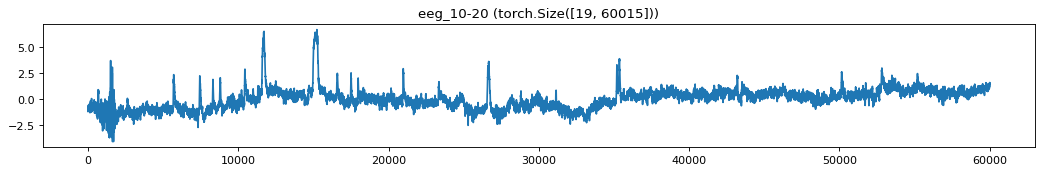

In [29]:
step = 1
upper_bnd = -1
plt.figure(figsize=(16, 2), dpi=80)
plt.plot(eeg_10_20[3, :upper_bnd:step])
plt.title(f"eeg_10-20 ({eeg_10_20.shape})")
plt.plot()

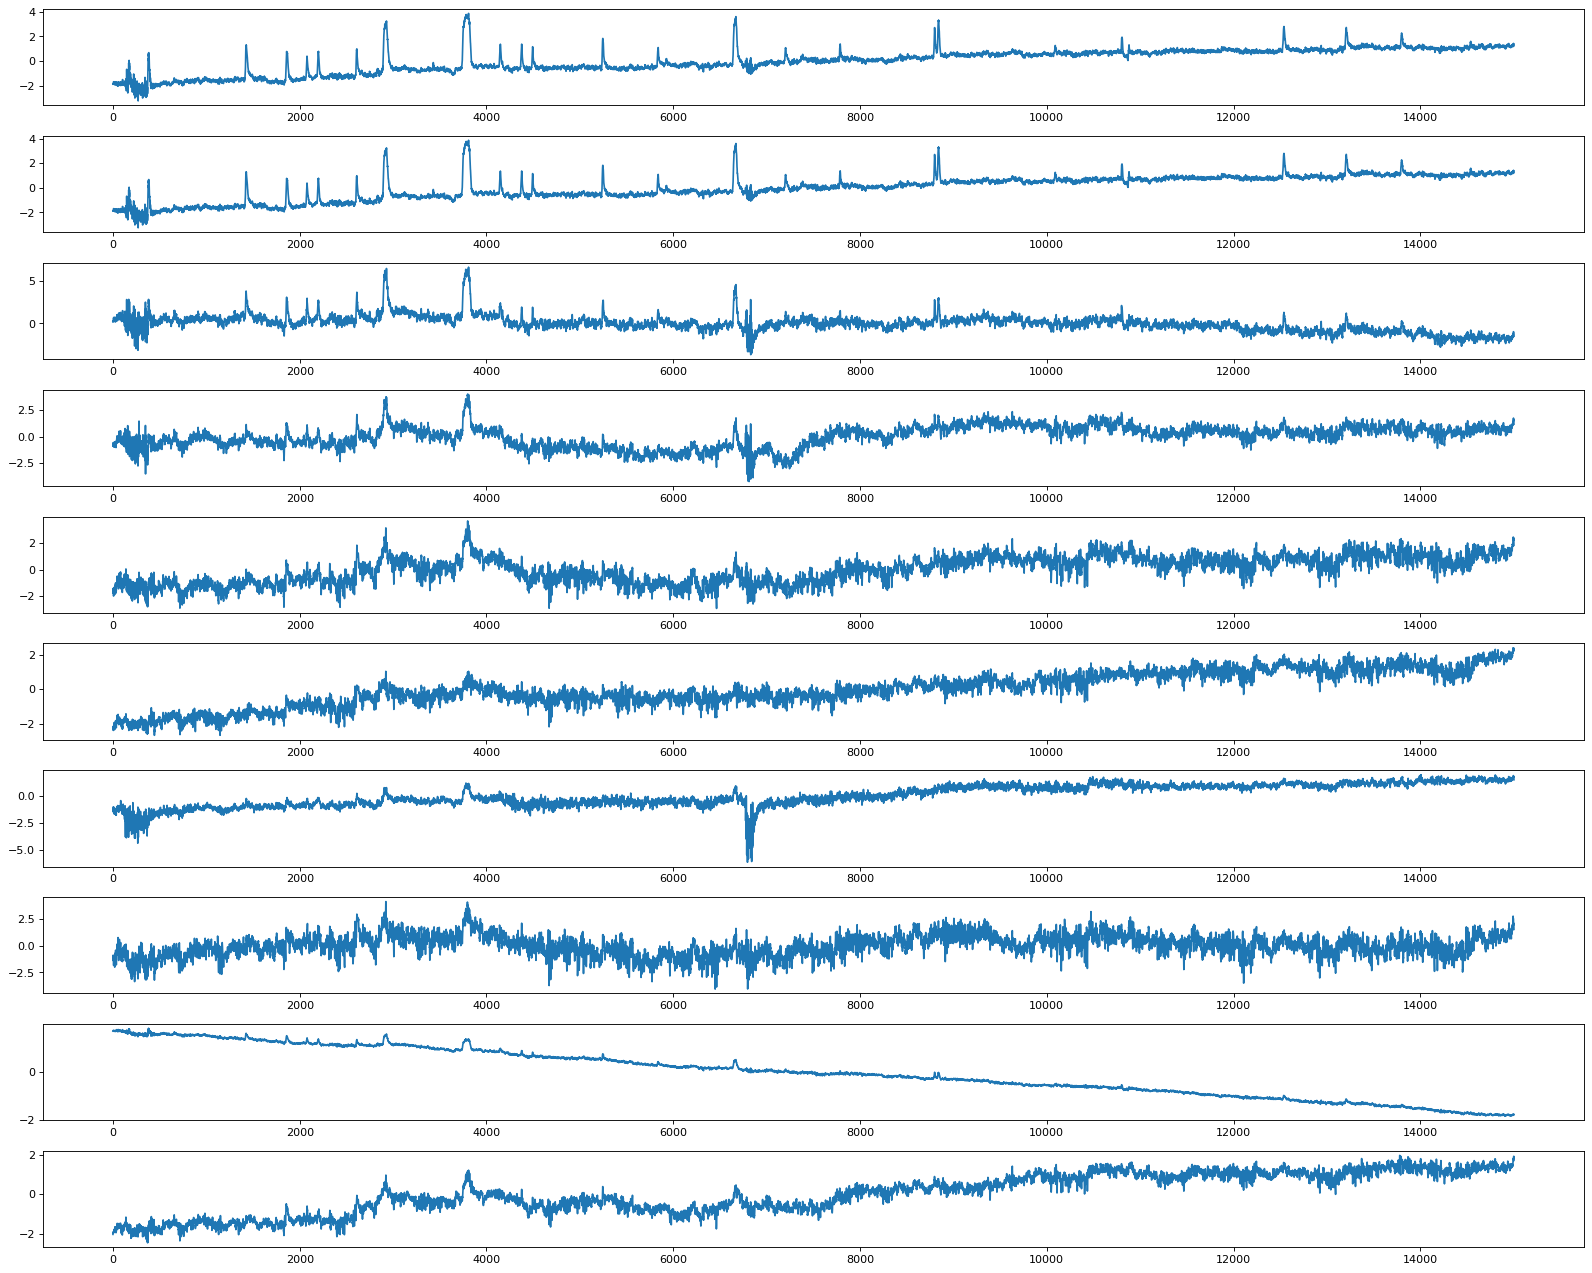

In [38]:
data = eeg_10_20

step = 4
plt.figure(figsize=(20, 16), dpi=80)

plt.subplot(10,1,1)
plt.plot(data[0, ::step])

plt.subplot(10,1,2)
plt.plot(data[0, ::step])

plt.subplot(10,1,3)
plt.plot(data[2, ::step])

plt.subplot(10,1,4)
plt.plot(data[4, ::step])

plt.subplot(10,1,5)
plt.plot(data[6, ::step])

plt.subplot(10,1,6)
plt.plot(data[8, ::step])

plt.subplot(10,1,7)
plt.plot(data[12, ::step])

plt.subplot(10,1,8)
plt.plot(data[14, ::step])

plt.subplot(10,1,9)
plt.plot(data[16, ::step])

plt.subplot(10,1,10)
plt.plot(data[18, ::step])

plt.tight_layout()
plt.show()

In [37]:
# torch.save(audio_mono.clone(), "/home/oturgut/data/philip/audio_mono.pt")
# torch.save(audio_stereo.clone(), "/home/oturgut/data/philip/audio_stereo.pt")
# torch.save(banking.clone(), "/home/oturgut/data/philip/banking.pt")
# torch.save(ecg.clone(), "/home/oturgut/data/philip/ecg.pt")
# torch.save(economics.clone(), "/home/oturgut/data/philip/economics.pt")
# torch.save(eeg_10_20.clone(), "/home/oturgut/data/philip/eeg_10_20.pt")
# torch.save(electromechanics.clone(), "/home/oturgut/data/philip/electromechanics.pt")
# torch.save(temperature.clone(), "/home/oturgut/data/philip/temperature.pt")

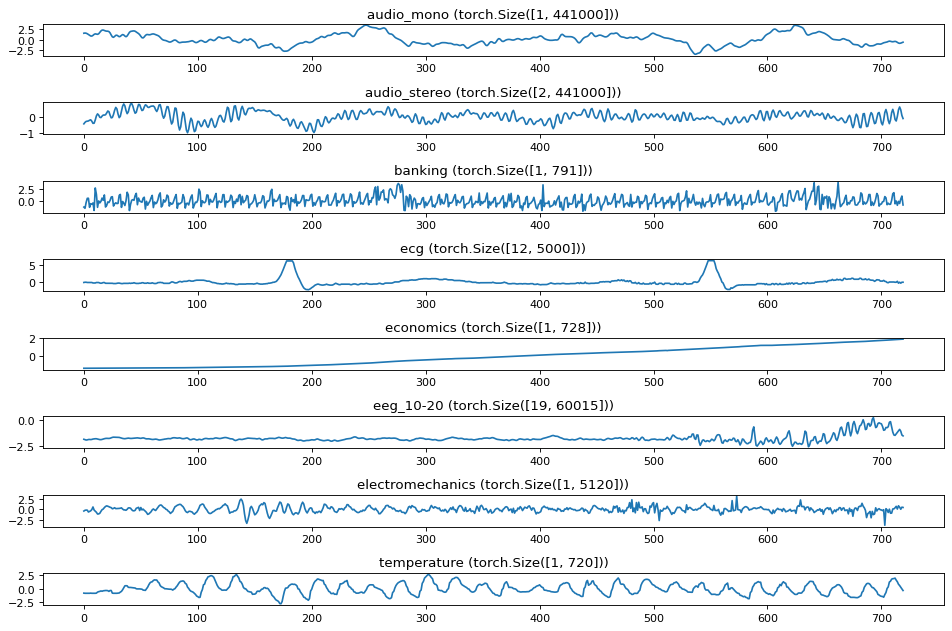

In [18]:
step = 1
upper_bnd = 720
plt.figure(figsize=(12, 8), dpi=80)

plt.subplot(8, 1, 1)
plt.plot(audio_mono[0, :upper_bnd:step])
plt.title(f"audio_mono ({audio_mono.shape})")

plt.subplot(8, 1, 2)
plt.plot(audio_stereo[0, :upper_bnd:step])
plt.title(f"audio_stereo ({audio_stereo.shape})")

plt.subplot(8, 1, 3)
plt.plot(banking[0, :upper_bnd:step])
plt.title(f"banking ({banking.shape})")

plt.subplot(8, 1, 4)
plt.plot(ecg[0, :upper_bnd:step])
plt.title(f"ecg ({ecg.shape})")

plt.subplot(8, 1, 5)
plt.plot(economics[0, :upper_bnd:step])
plt.title(f"economics ({economics.shape})")

plt.subplot(8, 1, 6)
plt.plot(eeg_10_20[0, :upper_bnd:step])
plt.title(f"eeg_10-20 ({eeg_10_20.shape})")

plt.subplot(8, 1, 7)
plt.plot(electromechanics[0, :upper_bnd:step])
plt.title(f"electromechanics ({electromechanics.shape})")

plt.subplot(8, 1, 8)
plt.plot(temperature[0, :upper_bnd:step])
plt.title(f"temperature ({temperature.shape})")

plt.tight_layout()
plt.show()

### Deutscher Wetterdienst (DWD) data

##### Germany

In [60]:
# Function to process a .txt file and extract TT_TU data
def process_txt_file(txt_file):
    tt_tu_values = []
    for line in txt_file:
        # Decode the line from bytes to string
        line_str = line.decode('utf-8').strip()
        # Skip the header line
        if not line_str.startswith("STATIONS_ID"):
            # Split the line by ';' delimiter
            data = line_str.split(';')
            # Extract TT_TU value
            tt_tu = float(data[3].strip())  # Assuming TT_TU is the 4th column (index 3)
            if tt_tu < -100.0:
                tt_tu_values.append(float(0.0))
            else:
                tt_tu_values.append(tt_tu)

    return tt_tu_values

# Function to process a .zip file
def process_zip_file(file_path):
    tt_tu_values = []
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_files = zip_ref.namelist()
        for zip_file in zip_files:
            if zip_file.endswith('.txt') and 'produkt' in zip_file:
                with zip_ref.open(zip_file) as txt_file:
                    txt_content = txt_file.readlines()
                    tt_tu_values.extend( process_txt_file(txt_content) )
                    
    return tt_tu_values

if __name__ == "__main__":
    # Directory path
    directory = '/home/oturgut/data/DWD/opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/'

    # Get a list of .zip files in the directory
    zip_files = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith('.zip')]
    zip_files = sorted(zip_files)

    # Initialize a multiprocessing Pool
    num_processes = 24
    with multiprocessing.Pool(processes=num_processes) as pool:
        # Use the Pool's map function to process each .zip file
        results = pool.map(process_zip_file, zip_files)

    # Close the Pool
    pool.close()
    pool.join()

    # Flatten the list of results
    tt_tu_values = [torch.tensor(sample, dtype=torch.float32)[None, ...] for sample in results if len(sample) > 1]

In [61]:
len(results)

629

In [55]:
tt_tu_values[0].shape

torch.Size([1, 534719])

In [62]:
min = 1e12
min_id = 0
max = 0
max_id = 0

for idx, sample in enumerate(tt_tu_values):
    sample_len = sample.shape[-1]
    if sample_len > max:
        max = sample_len
        max_id = idx

    if sample_len < min:
        min = sample_len
        min_id = idx

print(min, max)
print(min_id, max_id)

763 1148290
149 379


In [63]:
sorted(zip_files)[149]

'/home/oturgut/dwd/opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/stundenwerte_TU_01515_20021104_20030814_hist.zip'

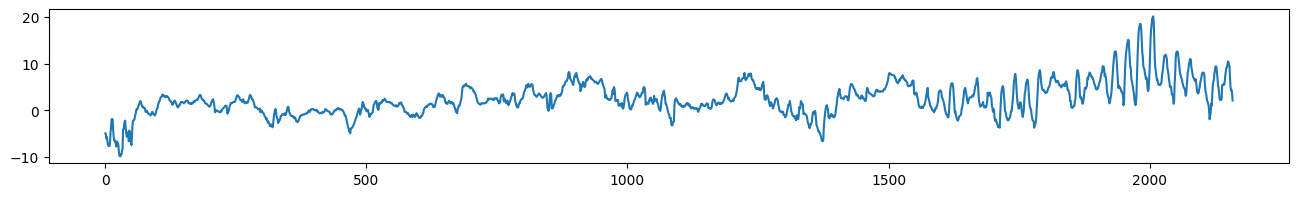

In [91]:
plt.figure(figsize=(16, 2))
plt.plot(tt_tu_values[457][0, :2160])
plt.show()

In [114]:
tt_tu_data = []

for sample in tt_tu_values:
    tt_tu_data.extend(sample.split(720, dim=-1))

In [115]:
len(tt_tu_data)

203340

In [120]:
tt_tu_data[12345].shape, tt_tu_data[12345].dtype

(torch.Size([1, 720]), torch.float32)

In [117]:
tt_filtered = [sample for sample in tt_tu_data if sample.shape[-1] >= 720]
len(tt_filtered)

202712

In [124]:
tt_final_data = [("temperature", sample) for sample in tt_filtered]

In [125]:
# torch.save(tt_final_data, "/home/oturgut/data/processed/DWD/temperature_DE_hourly.pt")

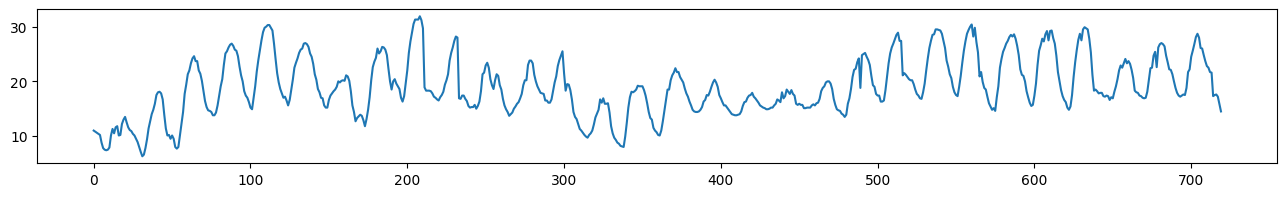

In [119]:
plt.figure(figsize=(16, 2))
plt.plot(tt_filtered[14577][0, :])
plt.show()

In [3]:
# Open the file
with open('/home/oturgut/Downloads/stundenwerte_TU_00003_19500401_20110331_hist/produkt_tu_stunde_19500401_20110331_00003.txt', newline='') as csvfile:
    # Read the file using ';' as the delimiter
    reader = csv.reader(csvfile, delimiter=';')
    
    # Skip the header row
    next(reader)
    
    # Initialize a list to store the TT_TU values
    date_tt_values = []
    tt_tu_values = []
    
    # Iterate over each row in the file
    for row in reader:
        # Append the TT_TU value to the list
        data = int(row[1])
        date_tt_values.append(data)
        tt = float(row[3])
        if tt < 0.0:
            tt_tu_values.append(float(0.0))
        else:
            tt_tu_values.append(tt)
    
    # Convert the list to a NumPy array
    tt_tu_array = torch.tensor(tt_tu_values, dtype=torch.float32)[None, ...]

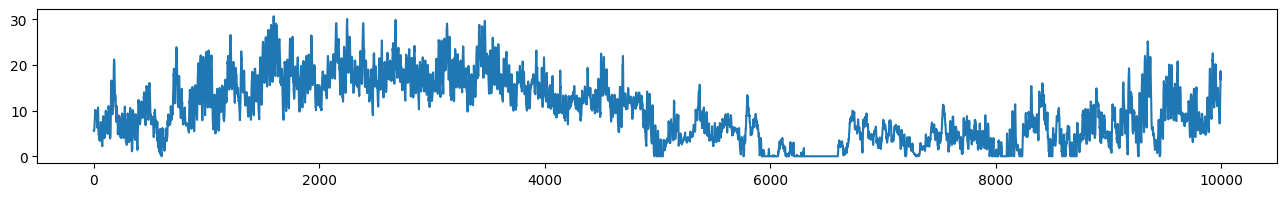

In [15]:
plt.figure(figsize=(16, 2))
plt.plot(tt_tu_array[0, :10000])
plt.show()

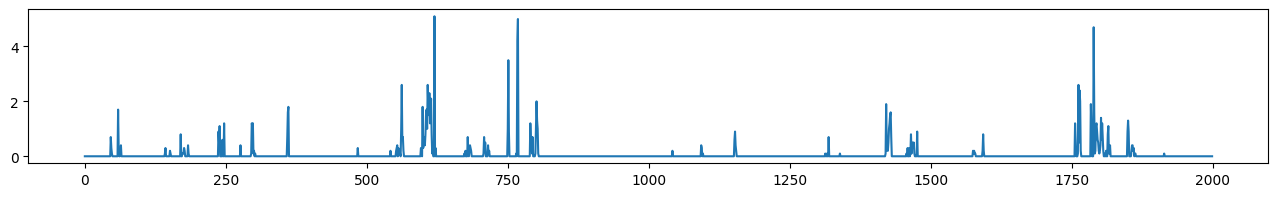

In [11]:
plt.figure(figsize=(16, 2))
plt.plot(rr_tu_array[0, :2000])
plt.show()

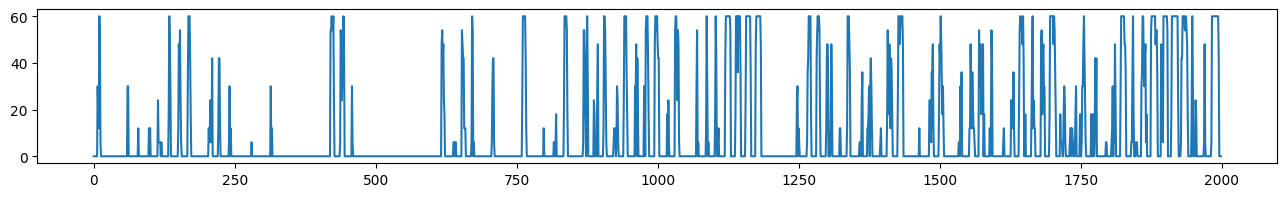

In [12]:
plt.figure(figsize=(16, 2))
plt.plot(sd_tu_array[0, :2000])
plt.show()

In [ ]:
plt.figure(figsize=(16, 2))
plt.plot(ff_tu_array[0, :200])
plt.show()

##### Global

In [40]:
# Function to process a .txt file
def process_txt_file(file_path):        
    # Initialize lists to store the values for T, R1, and S1
    Station_values = []
    T_values = []
    R1_values = []
    S1_values = []

    # with open(file_path, newline='') as csvfile:

    with open(file_path, newline='', encoding='latin-1') as csvfile:
        # Read the file using ';' as the delimiter
        reader = csv.reader(csvfile, delimiter=';')
        
        # Skip the header row
        next(reader)
        
        # Iterate over each row in the file
        for row in reader:
            # Check if the last element of the row is 'eof'
            if row[-1].lower() != 'eof':
                # Extract the values for T, R1, and S1 if the row is not empty and does not end with 'eof'
                # Check if the row contains enough elements before accessing them
                if len(row) > 23:  # Assuming the row has at least 24 elements
                    # Extract the values for T, R1, and S1 and convert them to floats
                    if row[2]:
                        # Assuming Station nb is the 3rd column (index 2)
                        # Preprocess the string to remove non-numeric characters
                        st_str = ''.join(filter(str.isdigit, row[2]))
                        # Convert the preprocessed string to float
                        Station = st_str

                    if row[9]:
                        # Assuming T is the 10th column (index 9)
                        # Preprocess the string to remove non-numeric characters
                        t_str = ''.join(filter(str.isdigit, row[9]))
                        # Convert the preprocessed string to float
                        T = float(t_str) if t_str else 0.0
                    else:
                        T = 0.0

                    if row[19]:
                        # Assuming R1 is the 20th column (index 19)
                        # Preprocess the string to remove non-numeric characters
                        r1_str = ''.join(filter(str.isdigit, row[19]))
                        # Convert the preprocessed string to float
                        R1 = float(r1_str) if r1_str else 0.0
                    else:
                        R1 = 0.0
                        
                    if row[23]:
                        # Assuming S1 is the 24th column (index 23)
                        # Preprocess the string to remove non-numeric characters
                        s1_str = ''.join(filter(str.isdigit, row[23]))
                        # Convert the preprocessed string to float
                        S1 = float(s1_str) if s1_str else 0.0
                    else:
                        S1 = 0.0
                    
                    # Append the values to the respective lists
                    Station_values.append(Station)
                    T_values.append(T)
                    R1_values.append(R1)
                    S1_values.append(S1)
        
        # Convert the lists to Torch tensors
        T_tensor = torch.tensor(T_values, dtype=torch.float32)
        R1_tensor = torch.tensor(R1_values, dtype=torch.float32)
        S1_tensor = torch.tensor(S1_values, dtype=torch.float32)

        data = torch.stack((T_tensor, R1_tensor, S1_tensor), dim=0)

    return (data, Station_values)

if __name__ == "__main__":
    # Directory path
    directory = '/home/oturgut/data/DWD/opendata.dwd.de/climate_environment/CDC/observations_global/CLIMAT/monthly/raw/'

    # Get a list of .zip files in the directory
    txt_files = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith('.txt') and 'readme' not in filename]
    txt_files = sorted(txt_files)

    # Initialize a multiprocessing Pool
    num_processes = 24
    with multiprocessing.Pool(processes=num_processes) as pool:
        # Use the Pool's map function to process each .zip file
        results = pool.map(process_txt_file, txt_files)

    # Close the Pool
    pool.close()
    pool.join()

In [41]:
len(results)

253

In [42]:
results[0]

(tensor([[ 27., 173.,   2.,  ..., 278., 278., 279.],
         [ 56.,  18., 182.,  ...,  18.,   6., 258.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]),
 ['01001',
  '01008',
  '01025',
  '01026',
  '01028',
  '01098',
  '01152',
  '01212',
  '01238',
  '01241',
  '01271',
  '01317',
  '01384',
  '01389',
  '01403',
  '01415',
  '01465',
  '01492',
  '02080',
  '02120',
  '02128',
  '02196',
  '02226',
  '02288',
  '02366',
  '02410',
  '02418',
  '02485',
  '02512',
  '02550',
  '02584',
  '02590',
  '02801',
  '02805',
  '02836',
  '02869',
  '02875',
  '02897',
  '02911',
  '02929',
  '02935',
  '02942',
  '02958',
  '02963',
  '02972',
  '02974',
  '03005',
  '03017',
  '03026',
  '03066',
  '03091',
  '03100',
  '03162',
  '03171',
  '03257',
  '03302',
  '03334',
  '03377',
  '03414',
  '03502',
  '03590',
  '03740',
  '03772',
  '03797',
  '03808',
  '03862',
  '03917',
  '03953',
  '03955',
  '03957',
  '03962',
  '03967',
  '03969',
  '03973',
  '03976',
  '03980',
  '

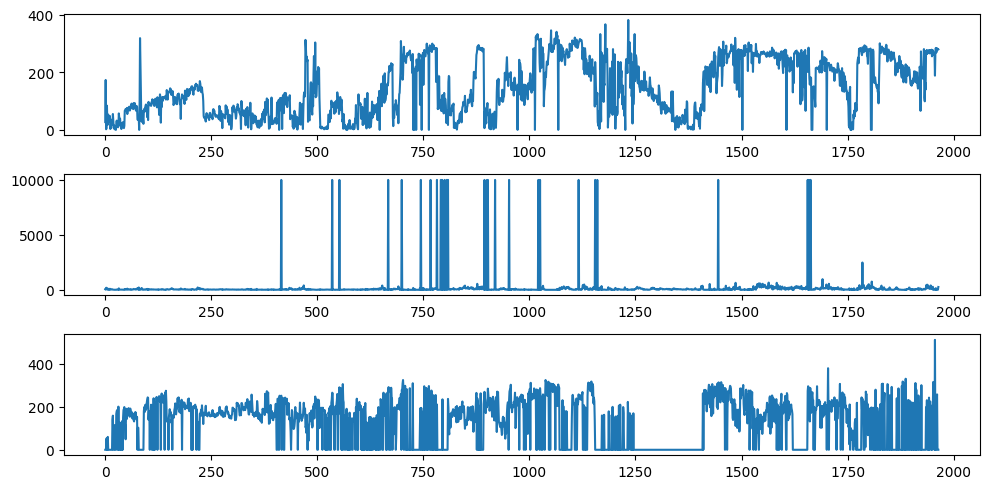

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(10, 5))

# Plot T
axes[0].plot(results[0][0], label='T')

# Plot R1
axes[1].plot(results[0][1], label='R1')

# Plot S1
axes[2].plot(results[0][2], label='S1')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [29]:
results_normed = [(sample - sample.mean(dim=-1, keepdim=True)) / (sample.std(dim=-1, keepdim=True) + 1e-9) for sample in results]

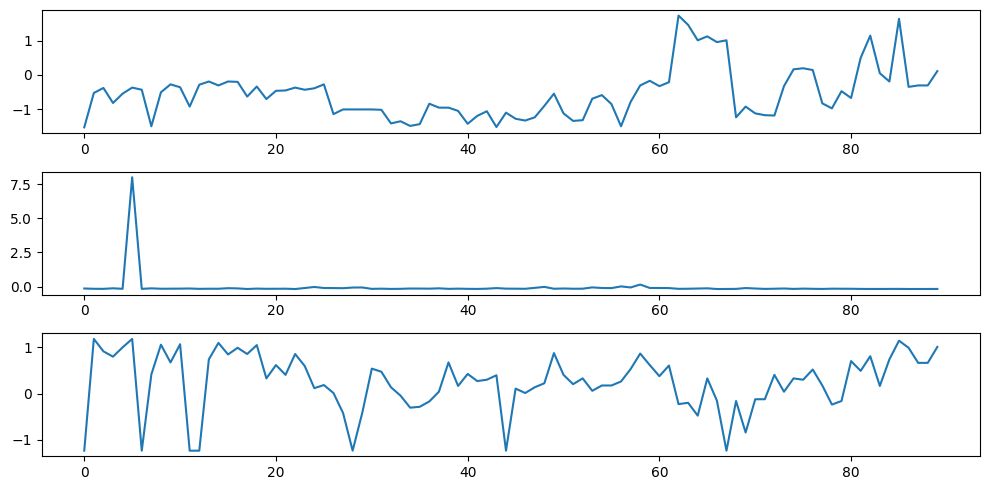

In [36]:
fig, axes = plt.subplots(3, 1, figsize=(10, 5))

min_val=410
max_val=500

# Plot T
axes[0].plot(results_normed[0][0][min_val:max_val], label='T')

# Plot R1
axes[1].plot(results_normed[0][1][min_val:max_val], label='R1')

# Plot S1
axes[2].plot(results_normed[0][2][min_val:max_val], label='S1')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Monash datasets

In [3]:
# https://forecastingdata.org/
# from https://github.com/rakshitha123/TSForecasting/blob/master/utils/data_loader.py

from datetime import datetime
from distutils.util import strtobool

import pandas as pd


# Converts the contents in a .tsf file into a dataframe and returns it along with other meta-data of the dataset: frequency, horizon, whether the dataset contains missing values and whether the series have equal lengths
#
# Parameters
# full_file_path_and_name - complete .tsf file path
# replace_missing_vals_with - a term to indicate the missing values in series in the returning dataframe
# value_column_name - Any name that is preferred to have as the name of the column containing series values in the returning dataframe
def convert_tsf_to_dataframe(
    full_file_path_and_name,
    replace_missing_vals_with="NaN",
    value_column_name="series_value",
):
    col_names = []
    col_types = []
    all_data = {}
    line_count = 0
    frequency = None
    forecast_horizon = None
    contain_missing_values = None
    contain_equal_length = None
    found_data_tag = False
    found_data_section = False
    started_reading_data_section = False

    with open(full_file_path_and_name, "r", encoding="cp1252") as file:
        for line in file:
            # Strip white space from start/end of line
            line = line.strip()

            if line:
                if line.startswith("@"):  # Read meta-data
                    if not line.startswith("@data"):
                        line_content = line.split(" ")
                        if line.startswith("@attribute"):
                            if (
                                len(line_content) != 3
                            ):  # Attributes have both name and type
                                raise Exception("Invalid meta-data specification.")

                            col_names.append(line_content[1])
                            col_types.append(line_content[2])
                        else:
                            if (
                                len(line_content) != 2
                            ):  # Other meta-data have only values
                                raise Exception("Invalid meta-data specification.")

                            if line.startswith("@frequency"):
                                frequency = line_content[1]
                            elif line.startswith("@horizon"):
                                forecast_horizon = int(line_content[1])
                            elif line.startswith("@missing"):
                                contain_missing_values = bool(
                                    strtobool(line_content[1])
                                )
                            elif line.startswith("@equallength"):
                                contain_equal_length = bool(strtobool(line_content[1]))

                    else:
                        if len(col_names) == 0:
                            raise Exception(
                                "Missing attribute section. Attribute section must come before data."
                            )

                        found_data_tag = True
                elif not line.startswith("#"):
                    if len(col_names) == 0:
                        raise Exception(
                            "Missing attribute section. Attribute section must come before data."
                        )
                    elif not found_data_tag:
                        raise Exception("Missing @data tag.")
                    else:
                        if not started_reading_data_section:
                            started_reading_data_section = True
                            found_data_section = True
                            all_series = []

                            for col in col_names:
                                all_data[col] = []

                        full_info = line.split(":")

                        if len(full_info) != (len(col_names) + 1):
                            raise Exception("Missing attributes/values in series.")

                        series = full_info[len(full_info) - 1]
                        series = series.split(",")

                        if len(series) == 0:
                            raise Exception(
                                "A given series should contains a set of comma separated numeric values. At least one numeric value should be there in a series. Missing values should be indicated with ? symbol"
                            )

                        numeric_series = []

                        for val in series:
                            if val == "?":
                                numeric_series.append(replace_missing_vals_with)
                            else:
                                numeric_series.append(float(val))

                        if numeric_series.count(replace_missing_vals_with) == len(
                            numeric_series
                        ):
                            raise Exception(
                                "All series values are missing. A given series should contains a set of comma separated numeric values. At least one numeric value should be there in a series."
                            )

                        all_series.append(pd.Series(numeric_series).array)

                        for i in range(len(col_names)):
                            att_val = None
                            if col_types[i] == "numeric":
                                att_val = int(full_info[i])
                            elif col_types[i] == "string":
                                att_val = str(full_info[i])
                            elif col_types[i] == "date":
                                att_val = datetime.strptime(
                                    full_info[i], "%Y-%m-%d %H-%M-%S"
                                )
                            else:
                                raise Exception(
                                    "Invalid attribute type."
                                )  # Currently, the code supports only numeric, string and date types. Extend this as required.

                            if att_val is None:
                                raise Exception("Invalid attribute value.")
                            else:
                                all_data[col_names[i]].append(att_val)

                line_count = line_count + 1

        if line_count == 0:
            raise Exception("Empty file.")
        if len(col_names) == 0:
            raise Exception("Missing attribute section.")
        if not found_data_section:
            raise Exception("Missing series information under data section.")

        all_data[value_column_name] = all_series
        loaded_data = pd.DataFrame(all_data)

        return (
            loaded_data,
            frequency,
            forecast_horizon,
            contain_missing_values,
            contain_equal_length,
        )


# Example of usage
# loaded_data, frequency, forecast_horizon, contain_missing_values, contain_equal_length = convert_tsf_to_dataframe("TSForecasting/tsf_data/sample.tsf")

# print(loaded_data)
# print(frequency)
# print(forecast_horizon)
# print(contain_missing_values)
# print(contain_equal_length)


In [2]:
weather_path = "/home/oturgut/Downloads/weather_dataset.tsf"
bank_path = "/home/oturgut/Downloads/nn5_daily_dataset_without_missing_values.tsf"
temp_rain_path = "/home/oturgut/Downloads/temperature_rain_dataset_without_missing_values.tsf"
solar_path = "/home/oturgut/Downloads/solar_10_minutes_dataset.tsf"
web_path = "/home/oturgut/Downloads/kaggle_web_traffic_dataset_without_missing_values.tsf"
fred_md_path = "/home/oturgut/Downloads/fred_md_dataset.tsf"
m4_monthly_path = "/home/oturgut/Downloads/m4_monthly_dataset.tsf"

In [4]:
weather_data = convert_tsf_to_dataframe(weather_path)
bank_data = convert_tsf_to_dataframe(bank_path)
temp_rain_data = convert_tsf_to_dataframe(temp_rain_path)
solar_data = convert_tsf_to_dataframe(solar_path)
web_data = convert_tsf_to_dataframe(web_path)
fred_md_data = convert_tsf_to_dataframe(fred_md_path)
m4_monthly_data = convert_tsf_to_dataframe(m4_monthly_path)

In [5]:
bank_array = np.array([np.array(data) for data in bank_data[0]["series_value"].values])
bank_array.shape

(111, 791)

In [6]:
bank_normalized = (bank_array - bank_array.mean(axis=-1, keepdims=True)) / (bank_array.std(axis=-1, keepdims=True) + 1e-9)

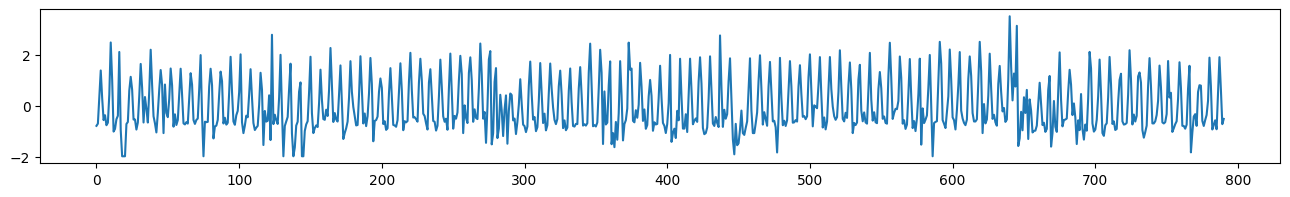

In [11]:
plt.figure(figsize=(16, 2))
plt.plot(bank_normalized[18, :])
plt.show()

In [12]:
bank_list = [("banking", torch.tensor(sample, dtype=torch.float32)[None, ...]) for sample in bank_normalized]

In [7]:
temp_rain_array = np.array([np.array(data) for data in temp_rain_data[0]["series_value"].values])
temp_rain_array.shape

(32072, 725)

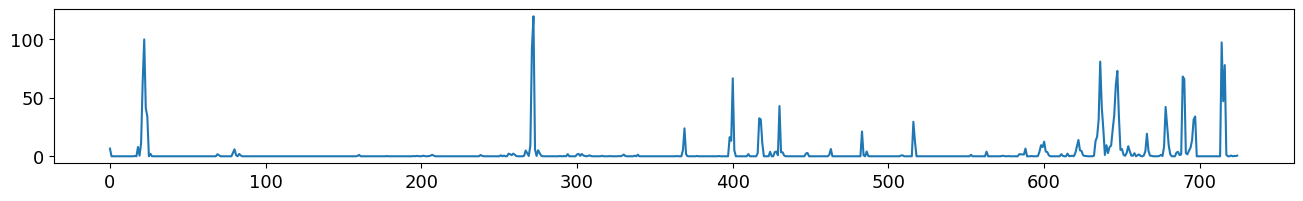

In [38]:
plt.figure(figsize=(16, 2))
plt.plot(temp_rain_array[1000, :])
plt.show()

In [53]:
temp_rain_array.std(axis=-1, keepdims=True).argmax()

30629

In [34]:
temp_rain_array_mod = np.clip(temp_rain_array.transpose(), a_min=-3*temp_rain_array.std(axis=-1), a_max=3*temp_rain_array.std(axis=-1)).transpose()
temp_normalized = (temp_rain_array_mod - temp_rain_array_mod.mean(axis=-1, keepdims=True)) / (temp_rain_array_mod.std(axis=-1, keepdims=True) + 1e-9)

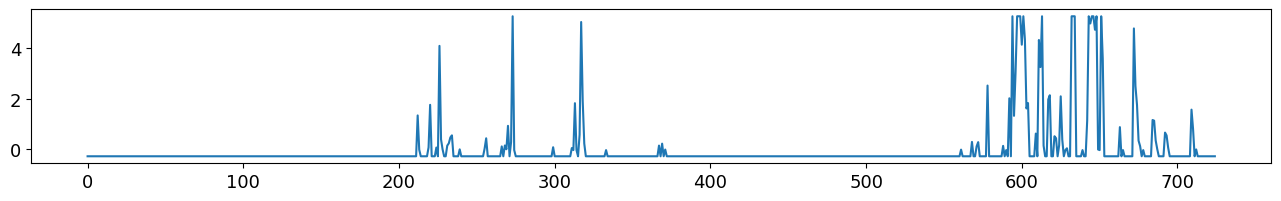

In [36]:
plt.figure(figsize=(16, 2))
plt.plot(temp_normalized[179, :])
plt.show()

In [8]:
solar_array = np.array([np.array(data) for data in solar_data[0]["series_value"].values])
solar_array.shape

(137, 52560)

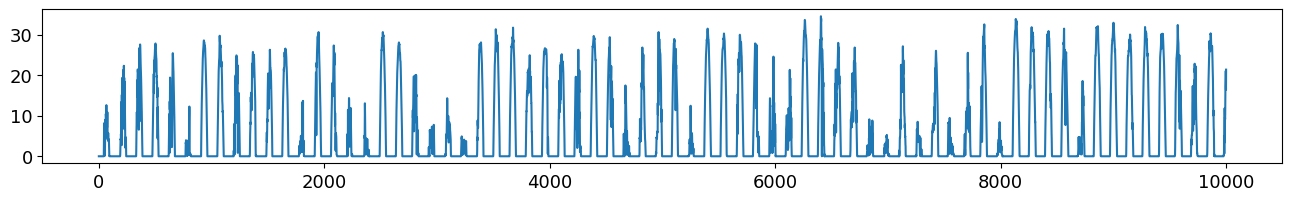

In [32]:
plt.figure(figsize=(16, 2))
plt.plot(solar_array[14, :10000])
plt.show()

In [9]:
web_array = np.array([np.array(data) for data in web_data[0]["series_value"].values])
web_array.shape

(145063, 803)

In [85]:
web_normalized = (web_array - web_array.mean(axis=-1, keepdims=True)) / (web_array.std(axis=-1, keepdims=True) + 1e-9)

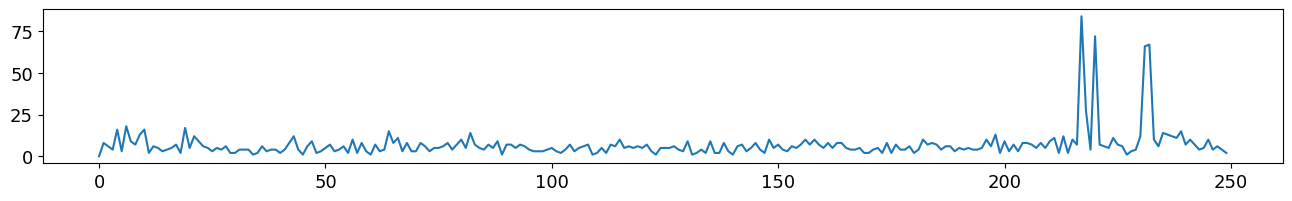

In [42]:
plt.figure(figsize=(16, 2))
plt.plot(web_array[100, :250])
plt.show()

In [108]:
web_array_mod = np.clip(web_array.transpose(), a_min=-3*web_array.std(axis=-1), a_max=3*web_array.std(axis=-1)).transpose()
web_normalized = (web_array_mod - web_array_mod.mean(axis=-1, keepdims=True)) / (web_array_mod.std(axis=-1, keepdims=True) + 1e-9)

In [ ]:
plt.figure(figsize=(16, 2))
plt.plot(web_normalized[123456, :])
plt.show()

FredMD

In [16]:
fred_md_array = np.array([np.array(data) for data in fred_md_data[0]["series_value"].values])
fred_md_array.shape

(107, 728)

In [17]:
fred_md_normalized = (fred_md_array - fred_md_array.mean(axis=-1, keepdims=True)) / (fred_md_array.std(axis=-1, keepdims=True) + 1e-9)

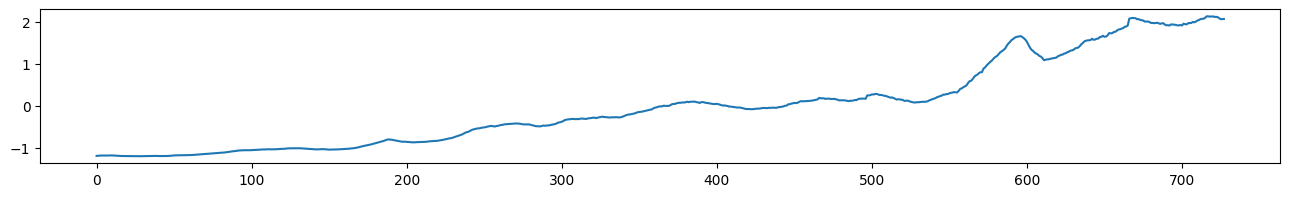

In [18]:
plt.figure(figsize=(16, 2))
plt.plot(fred_md_normalized[50, :])
plt.show()

In [19]:
fred_md_list = [("economics", torch.tensor(sample, dtype=torch.float32)[None, ...]) for sample in fred_md_normalized]

In [22]:
fred_md_list[0][1].dtype

torch.float32

Exchange

In [32]:
exchange = torch.load("/home/oturgut/data/processed/benchmarks/forecasting/data_exchange_all.pt")

In [33]:
exchange

[('economics',
  tensor([[ 0.0624,  0.0353,  0.0712,  ..., -0.3936, -0.4110, -0.4110]])),
 ('economics',
  tensor([[-0.1430, -0.1492, -0.0297,  ..., -2.4761, -2.4773, -2.4773]])),
 ('economics',
  tensor([[ 0.3406,  0.3355,  0.3349,  ..., -0.6542, -0.6632, -0.6632]])),
 ('economics',
  tensor([[-1.2669, -1.2710, -1.1822,  ...,  0.8071,  0.7828,  0.7828]])),
 ('economics',
  tensor([[2.8508, 2.8508, 2.8508,  ..., 0.0485, 0.0484, 0.0484]])),
 ('economics',
  tensor([[-1.7182, -1.7011, -1.6242,  ..., -0.5356, -0.5404, -0.5404]])),
 ('economics',
  tensor([[-0.5327, -0.5240, -0.4954,  ...,  0.3602,  0.3320,  0.3320]])),
 ('economics',
  tensor([[-1.7406, -1.7589, -1.7306,  ...,  0.2625,  0.2568,  0.2568]]))]

In [34]:
len(exchange), exchange[0][1].shape, exchange[0][1].dtype

(8, torch.Size([1, 7588]), torch.float32)

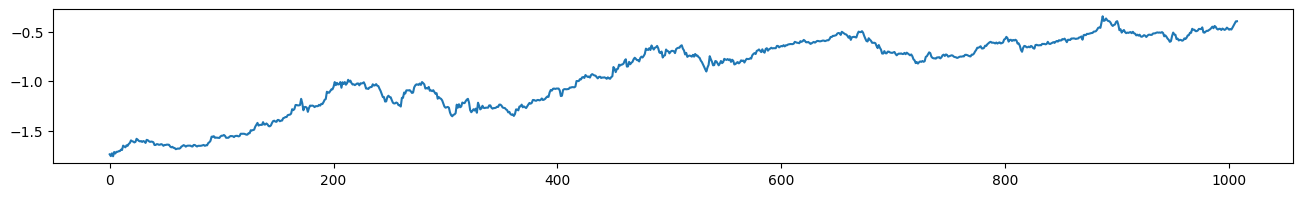

In [35]:
plt.figure(figsize=(16, 2))
plt.plot(exchange[7][1][0, :1008])
plt.show()

In [28]:
plt.rcParams.update({'font.size': 13})

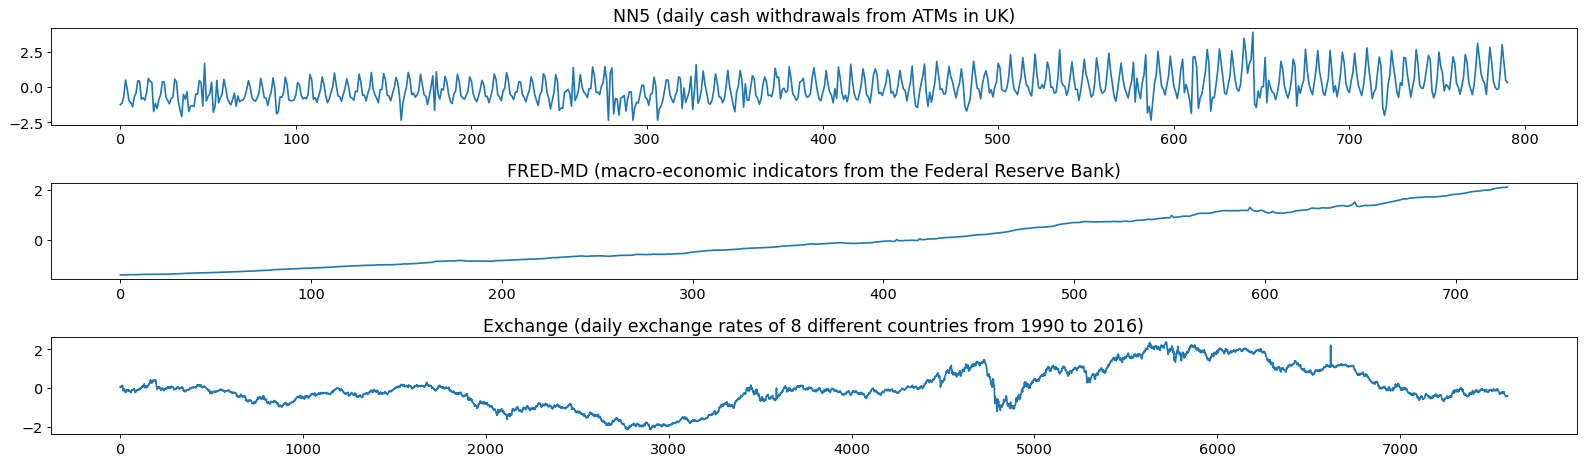

In [29]:
step = 1
plt.figure(figsize=(20, 6), dpi=80)

plt.subplot(3, 1, 1)
plt.plot(bank_normalized[0, ::step])
plt.title("NN5 (daily cash withdrawals from ATMs in UK)")

plt.subplot(3, 1, 2)
plt.plot(fred_md_normalized[0, ::step])
plt.title("FRED-MD (macro-economic indicators from the Federal Reserve Bank)")

plt.subplot(3, 1, 3)
plt.plot(exchange[0][1][0, ::step])
plt.title("Exchange (daily exchange rates of 8 different countries from 1990 to 2016)")

plt.tight_layout()
plt.show()

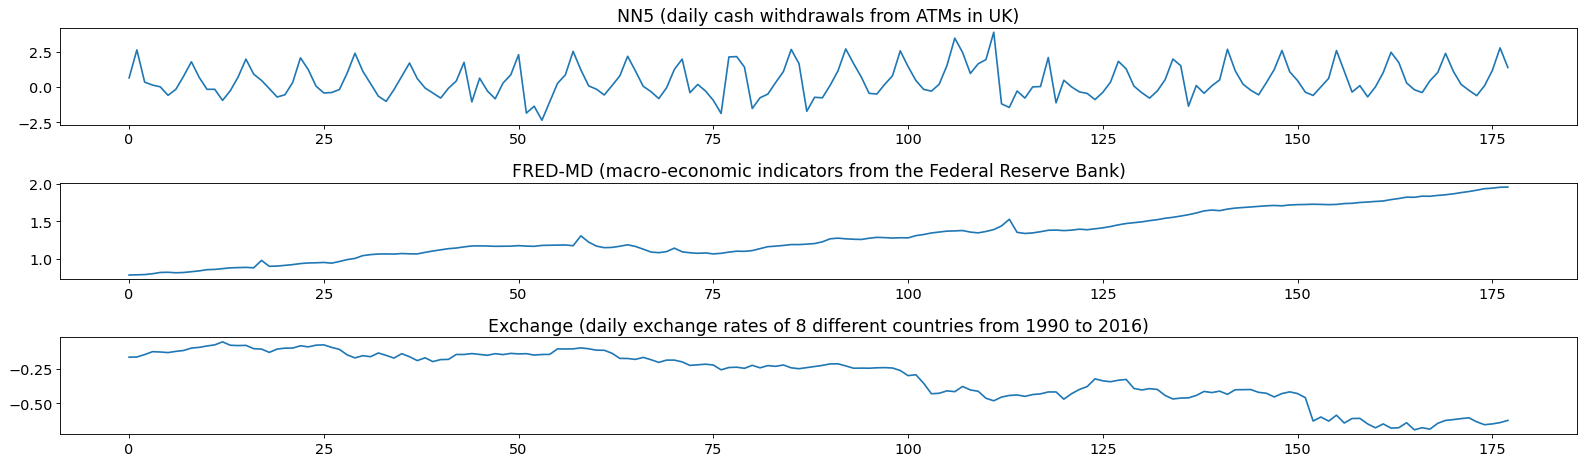

In [30]:
step = 1
plt.figure(figsize=(20, 6), dpi=80)

plt.subplot(3, 1, 1)
plt.plot(bank_normalized[0, 178*3:178*4:step])
plt.title("NN5 (daily cash withdrawals from ATMs in UK)")

plt.subplot(3, 1, 2)
plt.plot(fred_md_normalized[0, 178*3:178*4:step])
plt.title("FRED-MD (macro-economic indicators from the Federal Reserve Bank)")

plt.subplot(3, 1, 3)
plt.plot(exchange[0][1][0, 178*3:178*4:step])
plt.title("Exchange (daily exchange rates of 8 different countries from 1990 to 2016)")

plt.tight_layout()
plt.show()

In [ ]:
step = 1
plt.figure(figsize=(20, 8), dpi=80)

plt.subplot(7, 1, 1)
plt.plot(ecg[0, 0, 178*3:178*4:step])
plt.title("NN5")

plt.subplot(7, 1, 2)
plt.plot(sleep[0][1][0, 0, ::step])
plt.title("FRED-MD")

plt.subplot(7, 1, 3)
plt.plot(tdb[0][1][0, 178*30:178*31:step])
plt.title("Exchange")

plt.subplot(7, 1, 4)
plt.plot(tuab[100][1][0, 178*4:178*5:step])
plt.title("TUAB")

plt.subplot(7, 1, 5)
plt.plot(tuev[100][1][0, 178*4:178*5:step])
plt.title("TUEV")

plt.subplot(7, 1, 6)
plt.plot(seed[100][1][0, 178*55:178*56:step])
plt.title("SEED")

plt.subplot(7, 1, 7)
plt.plot(audio[0][1][0, 10000:10178:step])
plt.title("AudioSet")

plt.tight_layout()
plt.show()

### Benchmark datasets

In [2]:
def plot_psd(data, subject=0, channel=0, fs=100):
    x_t = data[subject][channel]

    N = x_t.shape[-1]
    t = torch.arange(0, N) * 1/fs

    plt.figure(figsize=(15, 4))

    plt.subplot(211)
    plt.plot(t, x_t)
    plt.xlabel('t [s]')
    plt.ylabel('x(t)')

    plt.subplot(212)
    plt.psd(x_t, 1024, fs)
    plt.xlabel('f [Hz]')

    plt.tight_layout()
    plt.show()

In [13]:
fda_train = torch.load("/home/oturgut/data/processed/benchmarks/classification/FD-A/train.pt")
fda_val = torch.load("/home/oturgut/data/processed/benchmarks/classification/FD-A/val.pt")
fda_test = torch.load("/home/oturgut/data/processed/benchmarks/classification/FD-A/test.pt")

In [14]:
len(fda_train), len(fda_val), len(fda_test)

(8184, 2728, 2728)

In [15]:
fda_val[0][1].shape

torch.Size([1, 5120])

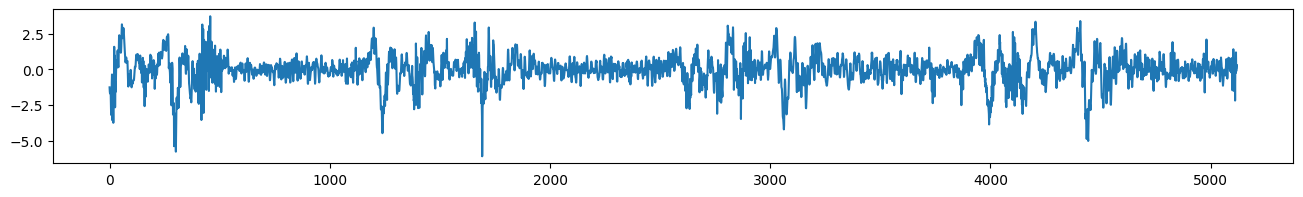

In [16]:
plt.figure(figsize=(16, 2))
plt.plot(fda_train[21][1][0])
plt.show()

In [19]:
fdb_train = torch.load("/home/oturgut/data/processed/benchmarks/classification/FD-B/train.pt")
fdb_val = torch.load("/home/oturgut/data/processed/benchmarks/classification/FD-B/val.pt")
fdb_test = torch.load("/home/oturgut/data/processed/benchmarks/classification/FD-B/test.pt")

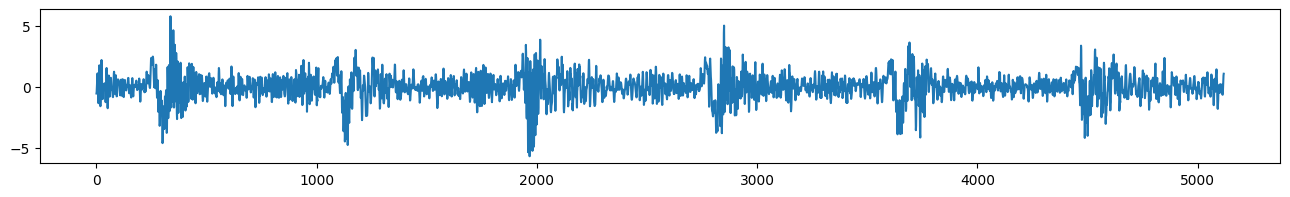

In [21]:
plt.figure(figsize=(16, 2))
plt.plot(fdb_train[21][1][0])
plt.show()

### Combine all datasets into TiCorp

In [2]:
ticorp = torch.load("/home/oturgut/data/processed/TiCorp/train.pt")
len(ticorp)

643830

In [7]:
ticorp_lite = [(a, b.clone()) for a, b in ticorp[134745:]]

In [8]:
# torch.save(ticorp_lite, "/home/oturgut/data/processed/TiCorp/train_lite.pt")

In [2]:
mimic = torch.load("/home/oturgut/data/processed/mimic-ecg-text/ecgs_val_10k_clean.pt")
mimic.shape

torch.Size([9661, 12, 5000])

In [2]:
audio = torch.load("/home/oturgut/data/processed/AudioSet-20K/data.pt")
audio[0], audio[0][1].shape

(('audio_mono',
  tensor([[1.5035, 1.5532, 1.5073,  ..., 1.8671, 1.5093, 1.5793]])),
 torch.Size([1, 441000]))

In [3]:
mimic_list = [("ecg", sample.clone()) for sample in mimic]
torch.save(mimic_list, "/home/oturgut/data/processed/mimic-ecg-text/ecgs_val_10k.pt")

In [3]:
seed = torch.load("/home/oturgut/data/processed/SEED/data.pt")
seed[0], seed[0][1].shape

(('eeg_10-20',
  tensor([[-0.6699, -0.3265, -0.8933,  ..., -0.0354, -0.5274, -0.0324],
          [ 0.0257,  0.6329, -0.3622,  ...,  0.5565,  0.6597,  0.6409],
          [-1.1083, -0.9022, -1.0708,  ...,  0.3731,  0.1440,  0.2406],
          ...,
          [-0.6627, -0.4418, -0.5684,  ...,  1.1489,  0.9876,  1.2929],
          [-1.2387,  0.7012, -1.5872,  ...,  0.8527, -1.4054,  0.9588],
          [-0.6997, -0.4726, -0.7503,  ..., -0.9950, -0.9856, -0.6962]])),
 torch.Size([19, 37001]))

In [4]:
tdbrain = torch.load("/home/oturgut/data/processed/TDBrain/data.pt")
tdbrain[0], tdbrain[0][1].shape

(('eeg_10-20',
  tensor([[-2.0500, -2.1159, -2.2176,  ..., -0.3777, -0.2968, -0.4531],
          [-1.8210, -1.8786, -1.9954,  ..., -0.6954, -0.5279, -0.5973],
          [-2.1803, -2.2538, -2.3763,  ..., -1.4595, -1.3056, -1.5225],
          ...,
          [-2.8479, -2.8887, -2.9231,  ..., -0.1633, -0.0044, -0.1354],
          [-2.5242, -2.4914, -2.4662,  ...,  0.8592,  0.8789,  0.7945],
          [-3.0386, -2.9563, -2.8793,  ...,  0.3093,  0.2950,  0.1070]])),
 torch.Size([19, 60008]))

In [5]:
sleep_eeg = torch.load("/home/oturgut/data/processed/benchmarks/classification/SleepEEG/train.pt")
sleep_eeg[0], sleep_eeg[0][1].shape

(('eeg_sleep',
  tensor([[ 0.5631,  0.0678,  0.7282, -1.2220, -1.3459, -2.5532, -1.1189, -1.3355,
           -0.9950, -1.7483,  0.4290, -0.8815, -0.3243,  0.1194, -0.2830, -1.9237,
           -1.3665, -1.0363, -1.6245, -1.5522, -0.4997, -0.6958, -0.1076, -0.5823,
            0.3568,  0.4806, -0.6855, -1.0569, -0.0147,  0.7695,  0.9346,  0.0988,
           -0.4997,  0.2639,  0.9759, -0.5719, -1.0053, -2.0166, -0.4791, -1.1911,
            0.8417,  0.5528,  2.0387, -0.8093, -0.3140, -1.1601, -0.6132, -2.3778,
           -1.3871, -0.2005,  0.7592,  0.9449,  1.4712,  0.3052,  0.5219, -0.1592,
            0.3258, -0.0457, -0.4275,  0.8521,  0.7179, -0.9331,  0.8417,  0.0472,
            1.4918, -0.0044,  1.0378, -1.7380, -0.3862, -0.1076,  0.4290, -0.0560,
            1.2029,  0.2020,  2.0387,  0.4496,  0.9553,  1.1100,  0.7592, -0.1179,
           -0.1695,  0.4806,  0.7798,  1.2339,  2.9055,  0.3155,  0.9553, -0.2108,
           -0.0354, -0.0044, -0.7680, -1.5419, -0.6855, -0.6648, -0.5719

In [5]:
fd_a = torch.load("/home/oturgut/data/processed/benchmarks/classification/FD-A/train.pt")
fd_a[0], fd_a[0][1].shape

(('electromechanics',
  tensor([[-2.0835, -3.2174, -4.4087,  ..., -0.4616, -0.2176,  0.1986]])),
 torch.Size([1, 5120]))

In [6]:
exchange = torch.load("/home/oturgut/data/processed/benchmarks/forecasting/data_exchange_all.pt")
exchange[0], exchange[0][1].shape

(('economics',
  tensor([[ 0.0624,  0.0353,  0.0712,  ..., -0.3936, -0.4110, -0.4110]])),
 torch.Size([1, 7588]))

In [8]:
nn5 = torch.load("/home/oturgut/data/processed/Monash/banking.pt")
nn5[0], nn5[0][1].shape, len(nn5)

(('banking',
  tensor([[-1.2470e+00, -1.1384e+00, -6.5740e-01,  5.0770e-01, -1.5774e-01,
           -9.8312e-01, -1.0894e+00, -1.3952e+00, -7.1344e-01, -3.9356e-01,
            4.5167e-01,  4.3182e-01, -8.4769e-01, -7.5430e-01, -9.2941e-01,
           -3.9006e-01,  6.2445e-01,  4.1664e-01,  3.3609e-01, -1.7349e+00,
           -1.1657e+00, -1.5166e+00, -8.7571e-01, -5.2898e-01,  3.8629e-01,
            3.7462e-01, -7.0293e-01, -9.3992e-01, -1.1839e+00, -8.0567e-01,
           -7.2278e-01,  5.7191e-01,  3.8979e-01, -9.5860e-01, -1.5843e+00,
           -2.0875e+00, -5.1030e-01, -8.5703e-01, -3.3052e-01, -1.7420e+00,
           -1.3567e+00, -1.3112e+00, -1.3859e+00, -4.8462e-01, -4.9746e-01,
            4.7035e-01,  3.3726e-01, -1.3567e+00,  1.6892e+00, -9.8195e-01,
           -6.6324e-01, -4.6127e-01,  3.4893e-01, -1.7816e+00, -1.3567e+00,
            4.8786e-01, -1.1139e+00, -7.4729e-01, -4.9396e-01,  5.6257e-01,
           -1.5309e-02, -7.9866e-01, -1.0882e+00, -1.2586e+00, -8.7338e-01,

In [9]:
fred_md = torch.load("/home/oturgut/data/processed/Monash/fred_md.pt")
fred_md[0], fred_md[0][1].shape, len(fred_md)

(('economics',
  tensor([[-1.4041, -1.4018, -1.3980, -1.3941, -1.3906, -1.3887, -1.3891, -1.3925,
           -1.3920, -1.3913, -1.3867, -1.3805, -1.3786, -1.3779, -1.3767, -1.3746,
           -1.3731, -1.3726, -1.3715, -1.3725, -1.3717, -1.3699, -1.3725, -1.3754,
           -1.3698, -1.3675, -1.3649, -1.3635, -1.3587, -1.3527, -1.3509, -1.3505,
           -1.3497, -1.3434, -1.3376, -1.3337, -1.3343, -1.3316, -1.3270, -1.3236,
           -1.3227, -1.3218, -1.3185, -1.3174, -1.3171, -1.3135, -1.3111, -1.3078,
           -1.3037, -1.3073, -1.3042, -1.3023, -1.2994, -1.2961, -1.2957, -1.2933,
           -1.2886, -1.2847, -1.2832, -1.2776, -1.2750, -1.2721, -1.2684, -1.2641,
           -1.2597, -1.2571, -1.2531, -1.2489, -1.2459, -1.2455, -1.2405, -1.2330,
           -1.2283, -1.2278, -1.2242, -1.2210, -1.2167, -1.2145, -1.2093, -1.2060,
           -1.1868, -1.1903, -1.1843, -1.1800, -1.1780, -1.1740, -1.1696, -1.1703,
           -1.1676, -1.1636, -1.1602, -1.1561, -1.1510, -1.1475, -1.1423

In [10]:
dwd = torch.load("/home/oturgut/data/processed/DWD/temperature_DE_hourly.pt")
dwd[0], dwd[0][1].shape, len(dwd)

(('temperature',
  tensor([[-0.4913, -0.5179, -0.5445, -0.5445, -0.4648, -0.4382, -0.4116, -0.3053,
           -0.1193,  0.0402,  0.1465,  0.2528,  0.5717,  0.5983,  0.6780,  0.6249,
            0.6780,  0.6515,  0.5983,  0.5452,  0.5452,  0.3591,  0.5186,  0.5186,
            0.3325,  0.2528,  0.2262,  0.1997,  0.0934,  0.0668,  0.2262,  0.3591,
            0.2794,  0.3857, -0.3585,  0.0668,  0.5186,  0.5983,  0.8375,  0.7844,
            0.3591, -0.4382, -0.5445, -0.6774, -0.6774, -0.7837, -0.7571, -0.7040,
           -0.7571, -0.8368, -1.0495, -0.9697, -0.9697, -0.8634, -1.1026, -1.1026,
           -0.8900, -0.6242, -0.3850, -0.7571, -0.5711, -0.5711, -0.3585, -0.0130,
           -0.1458, -0.4116, -0.5179, -0.6508, -0.6774, -0.9963, -1.0760, -1.1823,
           -1.2089, -1.2355, -1.2621, -1.3418, -1.4215, -1.2621, -1.1292, -0.9431,
           -0.5179, -0.0927,  0.1997,  0.0136,  0.2794,  0.3325,  0.0934, -0.3585,
           -0.6774, -0.6774, -0.4648, -0.4648, -0.5711, -0.6242, -0.65

In [17]:
# ticorp_train_wo_mimic = dwd[:int(len(dwd)*0.95)].copy() + tdbrain[:int(len(tdbrain)*0.95)].copy() + seed[:int(len(seed)*0.95)].copy() + audio[:int(len(audio)*0.95)].copy() + fd_a[:int(len(fd_a)*0.95)].copy() + nn5[:int(len(nn5)*0.95)].copy() + fred_md[:int(len(fred_md)*0.95)].copy() + exchange[:int(len(exchange)*0.95)].copy()
ticorp_val_wo_mimic = dwd[int(len(dwd)*0.95):].copy() + tdbrain[int(len(tdbrain)*0.95):].copy() + seed[int(len(seed)*0.95):].copy() + audio[int(len(audio)*0.95):].copy() + fd_a[int(len(fd_a)*0.95):].copy() + nn5[int(len(nn5)*0.95):].copy() + fred_md[int(len(fred_md)*0.95):].copy() + exchange[int(len(exchange)*0.95):].copy()

In [15]:
len(ticorp_train_wo_mimic)

222394

In [18]:
len(ticorp_val_wo_mimic)

11709

In [19]:
# torch.save(ticorp_train_wo_mimic, "/home/oturgut/data/processed/TiCorp/train_wo_mimic_new.pt")
# torch.save(ticorp_val_wo_mimic, "/home/oturgut/data/processed/TiCorp/val_wo_mimic_new.pt")

In [7]:
# ticorp_train_wo_mimic = sleep_eeg[:int(len(sleep_eeg)*0.95)].copy() + tdbrain[:int(len(tdbrain)*0.95)].copy() + seed[:int(len(seed)*0.95)].copy() + audio[:int(len(audio)*0.95)].copy() + fd_a[:int(len(fd_a)*0.95)].copy()
# ticorp_val_wo_mimic = sleep_eeg[int(len(sleep_eeg)*0.95):].copy() + tdbrain[int(len(tdbrain)*0.95):].copy() + seed[int(len(seed)*0.95):].copy() + audio[int(len(audio)*0.95):].copy() + fd_a[int(len(fd_a)*0.95):].copy()

In [8]:
# len(ticorp_train_wo_mimic), len(ticorp_val_wo_mimic)

(382107, 20113)

In [38]:
# ticorp_train_wo_mimic = torch.load("/home/oturgut/data/processed/TiCorp/train_wo_mimic.pt")
# ticorp_val_wo_mimic = torch.load("/home/oturgut/data/processed/TiCorp/val_wo_mimic.pt")

In [39]:
# len(ticorp_train_wo_mimic), len(ticorp_val_wo_mimic)

(382107, 20113)

In [40]:
# ticorp_train_wo_mimic_new = ticorp_train_wo_mimic + bank_list[:int(len(bank_list)*0.95)].copy() + fred_md_list[:int(len(fred_md_list)*0.95)].copy() + exchange[:int(len(exchange)*0.95)].copy()
# ticorp_val_wo_mimic_new = ticorp_val_wo_mimic + bank_list[int(len(bank_list)*0.95):].copy() + fred_md_list[int(len(fred_md_list)*0.95):].copy() + exchange[int(len(exchange)*0.95):].copy()

In [41]:
# len(ticorp_train_wo_mimic_new), len(ticorp_val_wo_mimic_new)

(382320, 20126)

In [9]:
# ticorp_train = mimic_list[:int(len(mimic)*0.95)].copy() + sleep_eeg[:int(len(sleep_eeg)*0.95)].copy() + tdbrain[:int(len(tdbrain)*0.95)].copy() + seed[:int(len(seed)*0.95)].copy() + audio[:int(len(audio)*0.95)].copy() + exchange[:int(len(exchange)*0.95)].copy()
# ticorp_val = mimic_list[int(len(mimic)*0.95):].copy() + sleep_eeg[int(len(sleep_eeg)*0.95):].copy() + tdbrain[int(len(tdbrain)*0.95):].copy() + seed[int(len(seed)*0.95):].copy() + audio[int(len(audio)*0.95):].copy() + exchange[int(len(exchange)*0.95):].copy()

In [42]:
# torch.save(ticorp_train_wo_mimic_new, "/home/oturgut/data/processed/TiCorp/train_wo_mimic.pt")
# torch.save(ticorp_val_wo_mimic_new, "/home/oturgut/data/processed/TiCorp/val_wo_mimic.pt")

### Audio (AudioSet)

In [ ]:
def list_files(rootdir):
    files = []
    for file in os.listdir(rootdir):
        curr_object = os.path.join(rootdir, file)
        if os.path.isdir(curr_object): 
            files += list_files(curr_object)
        elif ".wav" in curr_object:
            files.append(curr_object)

    return files

# Replace 'directory_path' with the path of the directory you want to search
# directory_path = '/home/oturgut/data/AudioSet/archive/train_wav'
directory_path = '/home/oturgut/data/AudioSet/archive/train_wav/'
files = list_files(directory_path)

In [ ]:
len(files)

In [ ]:
files[0]

In [ ]:
tensors = []
curr_file = ""

for file in files:
    curr_file = file
    samplerate, data = wavfile.read(file)

    tensor = torch.from_numpy(data)
    if tensor.dim() == 1:
        tensor = tensor[..., None]

    tensor = tensor.transpose(1, 0)

    if tensor.shape[-1] == 0:
        continue
    
    tensor = tensor.to(dtype=torch.float32)
    tensor_normalised = ( tensor - tensor.mean(dim=-1, keepdim=True) ) / ( tensor.std(dim=-1, keepdim=True) + 1e-9 )

    tensors.append(tensor_normalised)

In [ ]:
len(tensors)

In [ ]:
tensors[0].shape

In [ ]:
tensors[0].max(), tensors[0].min(), tensors[0].mean(), tensors[0].std()

In [ ]:
len(files)

In [ ]:
def process_file(file):
    try:
        samplerate, data = wavfile.read(file)

        tensor = torch.from_numpy(data)
        if tensor.dim() == 1:
            tensor = tensor[..., None]

        tensor = tensor.transpose(1, 0)

        if tensor.shape[-1] == 0:
            return None
        
        tensor = tensor.to(dtype=torch.float32)
        tensor_normalised = (tensor - tensor.mean(dim=-1, keepdim=True)) / (tensor.std(dim=-1, keepdim=True) + 1e-9)

        return tensor_normalised
    except Exception as e:
        print(f"Error processing file {file}: {e}")
        return None

if __name__ == "__main__":
    # Number of processes to use
    num_processes = 32

    with multiprocessing.Pool(processes=num_processes) as pool:
        tensors_ = pool.map(process_file, files)

    # Remove any None values (failed files)
    # tensors_ = [tensor for tensor in tensors_ if tensor is not None]

    print(f"Processed {len(tensors_)} files.")

In [ ]:
univariate = [tensor.shape for tensor in tensors if tensor.shape[0] == 1]
multivariate = [tensor.shape for tensor in tensors if tensor.shape[0] == 2]

In [ ]:
len(univariate), len(multivariate)

In [ ]:
subject = 100
data_audio = tensors[subject]

step = 10
plt.figure(figsize=(20, 4), dpi=80)

plt.subplot(2,1,1)
plt.plot(data_audio[0, ::step])

plt.subplot(2,1,2)
plt.plot(data_audio[1, ::step])

plt.tight_layout()
plt.show()

In [ ]:
step = 1
plt.figure(figsize=(20, 4), dpi=80)

plt.subplot(2,1,1)
plt.plot(data_audio[0, 10000:10178:step])

plt.subplot(2,1,2)
plt.plot(data_audio[0, :12000:step])

plt.tight_layout()
plt.show()

In [ ]:
mono_audio = [("audio_mono", tensor) for tensor in tensors if tensor.shape[0] == 1]
len(mono_audio)

In [ ]:
stereo_audio = [("audio_stereo", tensor) for tensor in tensors if tensor.shape[0] == 2]
len(stereo_audio)

In [ ]:
audioset = mono_audio + stereo_audio

In [ ]:
audioset[12250]

In [ ]:
audioset_float16 = [(data[0], data[1].to(dtype=torch.float16)) for data in audioset]

In [ ]:
# torch.save(audioset_float16, "/home/oturgut/data/processed/signalnet/audioset_20k_float16.pt")
# torch.save(audioset, "/home/oturgut/data/processed/signalnet/audioset_20k.pt")

In [66]:
audio0 = torch.load("/home/oturgut/data/processed/AudioSet/audioset_20k.pt")

In [67]:
audio0[0][1].shape, audio0[0][1].mean(), audio0[0][1].std() 

(torch.Size([1, 441000]), tensor(9.2037e-09), tensor(1.))

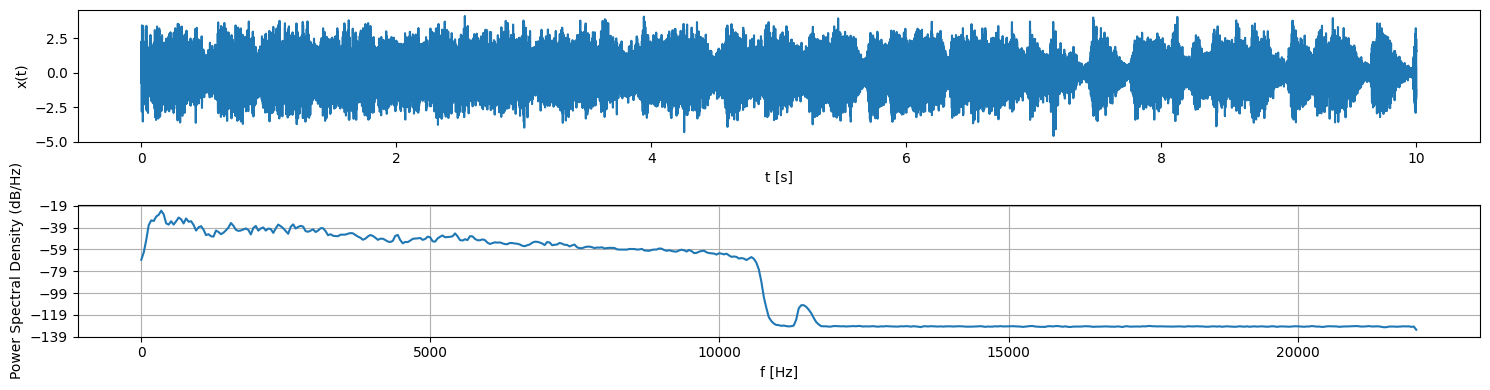

In [13]:
subject = 0
channel = 0
fs = 44100
plot_psd(audio0[0][1][None, ...], subject=subject, channel=channel, fs=fs)

### Audio (ESC-50)

In [2]:
data_path = "/home/oturgut/data/ESC-50"
df = pd.read_csv(os.path.join(data_path, 'meta/esc50.csv'))
df

filename  fold  target        category  esc10  src_file take
0      1-100032-A-0.wav     1       0             dog   True    100032    A
1     1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2     1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3     1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4     1-101296-A-19.wav     1      19    thunderstorm  False    101296    A
...                 ...   ...     ...             ...    ...       ...  ...
1995   5-263831-B-6.wav     5       6             hen  False    263831    B
1996  5-263902-A-36.wav     5      36  vacuum_cleaner  False    263902    A
1997   5-51149-A-25.wav     5      25       footsteps  False     51149    A
1998    5-61635-A-8.wav     5       8           sheep  False     61635    A
1999     5-9032-A-0.wav     5       0             dog   True      9032    A

[2000 rows x 7 columns]

In [8]:
categories = df["category"].values
targets = df["target"].values

In [16]:
target_dict = {targets[idx]:category for idx, category in enumerate(categories)}

In [17]:
target_dict

{0: 'dog',
 14: 'chirping_birds',
 36: 'vacuum_cleaner',
 19: 'thunderstorm',
 30: 'door_wood_knock',
 34: 'can_opening',
 9: 'crow',
 22: 'clapping',
 48: 'fireworks',
 41: 'chainsaw',
 47: 'airplane',
 31: 'mouse_click',
 17: 'pouring_water',
 45: 'train',
 8: 'sheep',
 15: 'water_drops',
 46: 'church_bells',
 37: 'clock_alarm',
 32: 'keyboard_typing',
 16: 'wind',
 25: 'footsteps',
 4: 'frog',
 3: 'cow',
 27: 'brushing_teeth',
 43: 'car_horn',
 12: 'crackling_fire',
 40: 'helicopter',
 29: 'drinking_sipping',
 10: 'rain',
 7: 'insects',
 26: 'laughing',
 6: 'hen',
 44: 'engine',
 23: 'breathing',
 20: 'crying_baby',
 49: 'hand_saw',
 24: 'coughing',
 39: 'glass_breaking',
 28: 'snoring',
 18: 'toilet_flush',
 2: 'pig',
 35: 'washing_machine',
 38: 'clock_tick',
 21: 'sneezing',
 1: 'rooster',
 11: 'sea_waves',
 42: 'siren',
 5: 'cat',
 33: 'door_wood_creaks',
 13: 'crickets'}

In [18]:
# torch.save(target_dict, "/home/oturgut/data/processed/ESC-50/labels_dict.pt")

In [94]:
files = df["filename"].values
folds = df["fold"].values
labels = df["target"].values

In [99]:
tensors = []
targets = []

for fold in np.unique(folds):
    curr_files = files[folds == fold]
    curr_labels = labels[folds == fold]

    tensors_fold = []
    labels_fold = []
    for idx, file in enumerate(curr_files):
        file_path = os.path.join(data_path, 'audio', file)
        samplerate, data = wavfile.read(file_path)

        tensor = torch.from_numpy(data)
        if tensor.dim() == 1:
            tensor = tensor[..., None]

        tensor = tensor.transpose(1, 0)

        if tensor.shape[-1] == 0:
            continue
        
        tensor = tensor.to(dtype=torch.float32)
        tensor_normalised = ( tensor - tensor.mean(dim=-1, keepdim=True) ) / ( tensor.std(dim=-1, keepdim=True) + 1e-9 )

        tensors_fold.append(tensor_normalised)
        labels_fold.append(curr_labels[idx])

    tensors.append(tensors_fold)
    targets.append(labels_fold)

In [163]:
data_fold_0 = [("audio_mono", data.unsqueeze(0)) for data in tensors[0]]
data_fold_1 = [("audio_mono", data.unsqueeze(0)) for data in tensors[1]]
data_fold_2 = [("audio_mono", data.unsqueeze(0)) for data in tensors[2]]
data_fold_3 = [("audio_mono", data.unsqueeze(0)) for data in tensors[3]]
data_fold_4 = [("audio_mono", data.unsqueeze(0)) for data in tensors[4]]

In [166]:
# torch.save(data_fold_0, "/home/oturgut/data/processed/ESC-50/data_fold0.pt")
# torch.save(data_fold_1, "/home/oturgut/data/processed/ESC-50/data_fold1.pt")
# torch.save(data_fold_2, "/home/oturgut/data/processed/ESC-50/data_fold2.pt")
# torch.save(data_fold_3, "/home/oturgut/data/processed/ESC-50/data_fold3.pt")
# torch.save(data_fold_4, "/home/oturgut/data/processed/ESC-50/data_fold4.pt")

In [164]:
labels_fold_0 = torch.nn.functional.one_hot(torch.tensor(targets[0]), num_classes=50).to(torch.int32)
labels_fold_1 = torch.nn.functional.one_hot(torch.tensor(targets[1]), num_classes=50).to(torch.int32)
labels_fold_2 = torch.nn.functional.one_hot(torch.tensor(targets[2]), num_classes=50).to(torch.int32)
labels_fold_3 = torch.nn.functional.one_hot(torch.tensor(targets[3]), num_classes=50).to(torch.int32)
labels_fold_4 = torch.nn.functional.one_hot(torch.tensor(targets[4]), num_classes=50).to(torch.int32)

In [165]:
# torch.save(labels_fold_0, "/home/oturgut/data/processed/ESC-50/labels_fold0.pt")
# torch.save(labels_fold_1, "/home/oturgut/data/processed/ESC-50/labels_fold1.pt")
# torch.save(labels_fold_2, "/home/oturgut/data/processed/ESC-50/labels_fold2.pt")
# torch.save(labels_fold_3, "/home/oturgut/data/processed/ESC-50/labels_fold3.pt")
# torch.save(labels_fold_4, "/home/oturgut/data/processed/ESC-50/labels_fold4.pt")

In [ ]:
subject = 0
channel = 0
fs = 44100
plot_psd(data_fold_3[0][1], subject=subject, channel=channel, fs=fs)

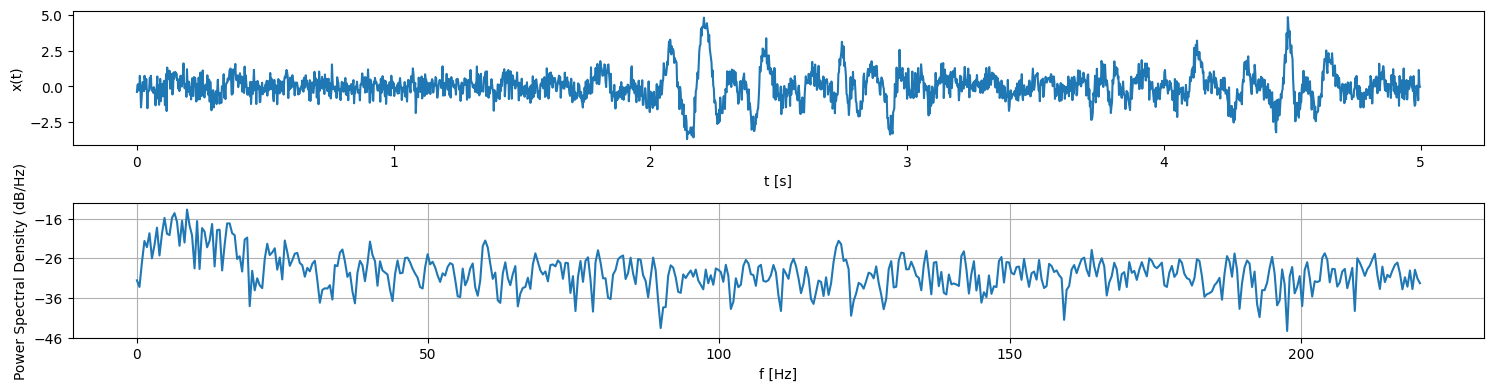

In [162]:
subject = 0
channel = 0
fs = 441
plot_psd(data_fold_3[111][1][..., ::100], subject=subject, channel=channel, fs=fs)

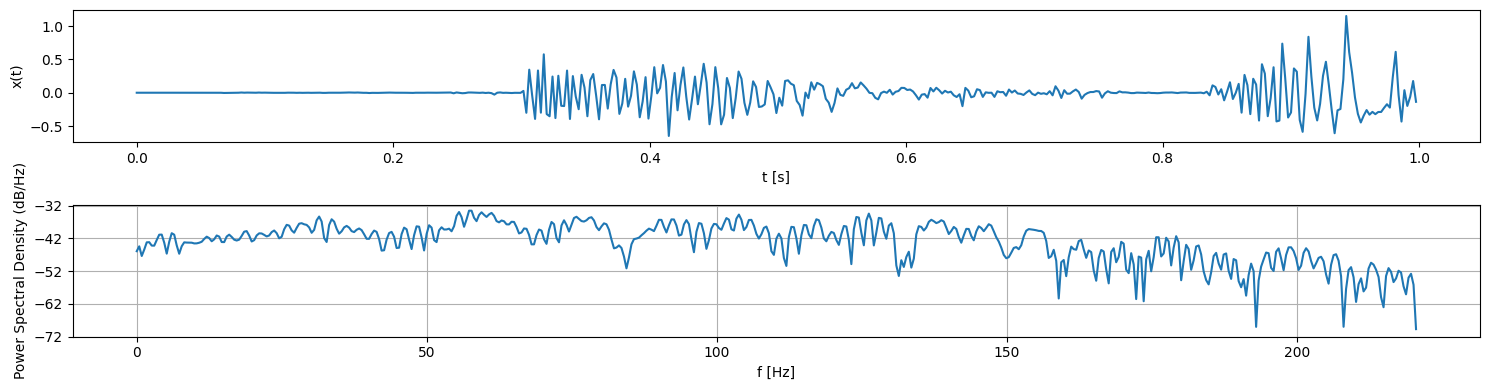

In [160]:
subject = 0
channel = 0
fs = 441
plot_psd(data_fold_3[388][1][..., :44100:100], subject=subject, channel=channel, fs=fs)

### Sleep EEG

In [302]:
dataset = "EMG"
split = "val"
sleep_eeg = torch.load(f"/home/oturgut/data/signalnet/datasets/classification/{dataset}/{split}.pt")

##### labels

In [303]:
len(sleep_eeg["labels"]), sleep_eeg["labels"].to(torch.int64).unique()

(41, tensor([0, 1, 2]))

In [304]:
labels = torch.nn.functional.one_hot(sleep_eeg["labels"].to(torch.int64)).to(torch.int32)
labels.shape, labels.dtype 

(torch.Size([41, 3]), torch.int32)

In [305]:
# torch.save(labels, f"/home/oturgut/data/processed/signalnet/classification/{dataset}/{split}_labels.pt")

In [242]:
# labels_test = torch.load("/home/oturgut/data/processed/ukbb/labelsOneHot/labels_train_CAD_all_balanced.pt")

In [191]:
# labels_test.shape, labels_test.dtype

(torch.Size([4030, 2]), torch.float32)

##### data

In [181]:
len(sleep_eeg["samples"]), sleep_eeg["samples"].shape, sleep_eeg["samples"].mean(), sleep_eeg["samples"].std(), sleep_eeg["samples"].dtype

(43673,
 torch.Size([43673, 1, 1500]),
 tensor(0.0004, dtype=torch.float64),
 tensor(0.0125, dtype=torch.float64),
 torch.float64)

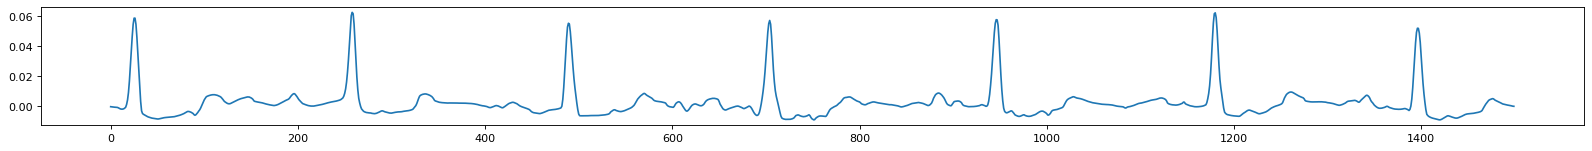

In [164]:
step = 1
plt.figure(figsize=(20, 2), dpi=80)

plt.subplot(1, 1, 1)
plt.plot(sleep_eeg["samples"][0, 0, ::step])

plt.tight_layout()
plt.show()

In [165]:
data_sleep = (sleep_eeg["samples"] - sleep_eeg["samples"].mean(dim=-1, keepdim=True)) / (sleep_eeg["samples"].std(dim=-1, keepdim=True) + 1e-9)

In [166]:
# data_sleep = (torch.tensor(sleep_eeg["samples"], dtype=torch.float32) - torch.tensor(sleep_eeg["samples"], dtype=torch.float32).mean(dim=-1, keepdim=True)) / (torch.tensor(sleep_eeg["samples"], dtype=torch.float32).std(dim=-1, keepdim=True) + 1e-9)

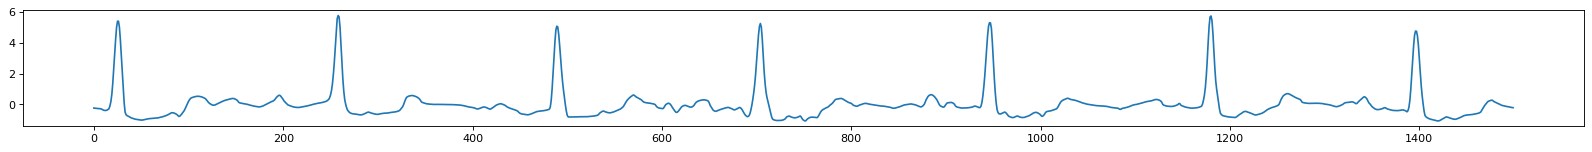

In [167]:
step = 1
plt.figure(figsize=(20, 2), dpi=80)

plt.subplot(1, 1, 1)
plt.plot(data_sleep[0, 0, ::step])

plt.tight_layout()
plt.show()

In [168]:
# sleepeeg = [("eeg_sleep", data.unsqueeze(0)) for data in data_sleep]

In [169]:
# sleepeeg = [("har", data.unsqueeze(0)) for data in data_sleep]
sleepeeg = [("ecg_singleLead", data.unsqueeze(0).to(torch.float32)) for data in data_sleep]

In [170]:
sleepeeg[0][1].shape, sleepeeg[0][1].mean(), sleepeeg[0][1].std(), sleepeeg[0][1].dtype

(torch.Size([1, 1, 1500]), tensor(3.1789e-10), tensor(1.0000), torch.float32)

In [171]:
len(sleepeeg)

43673

In [172]:
# torch.save(sleepeeg, "/home/oturgut/data/processed/signalnet/classification/ECG/train.pt")

In [68]:
data_test = torch.load("/home/oturgut/data/processed/signalnet/forecasting/data_exchange_all.pt")
data_test, data_test[0][-1].shape, data_test[0][-1].mean(), data_test[0][-1].dtype

([('exchange',
   tensor([[[ 0.0624,  0.0353,  0.0712,  ..., -0.3936, -0.4110, -0.4110]]])),
  ('exchange',
   tensor([[[-0.1430, -0.1492, -0.0297,  ..., -2.4761, -2.4773, -2.4773]]])),
  ('exchange',
   tensor([[[ 0.3406,  0.3355,  0.3349,  ..., -0.6542, -0.6632, -0.6632]]])),
  ('exchange',
   tensor([[[-1.2669, -1.2710, -1.1822,  ...,  0.8071,  0.7828,  0.7828]]])),
  ('exchange',
   tensor([[[2.8508, 2.8508, 2.8508,  ..., 0.0485, 0.0484, 0.0484]]])),
  ('exchange',
   tensor([[[-1.7182, -1.7011, -1.6242,  ..., -0.5356, -0.5404, -0.5404]]])),
  ('exchange',
   tensor([[[-0.5327, -0.5240, -0.4954,  ...,  0.3602,  0.3320,  0.3320]]])),
  ('exchange',
   tensor([[[-1.7406, -1.7589, -1.7306,  ...,  0.2625,  0.2568,  0.2568]]]))],
 torch.Size([1, 1, 7588]),
 tensor(-1.8601e-07),
 torch.float32)

In [70]:
ecg0 = torch.load("/home/oturgut/data/processed/mimic-ecg-text/ecgs_val_10k_clean.pt")
ecg0.shape

torch.Size([9661, 12, 5000])

In [179]:
len(data_test)

321

In [304]:
data_new = [(data[0], data[-1].to(torch.float32)) for data in data_test]
data_new[0][-1].shape, data_new[0][-1].dtype

(torch.Size([1, 1, 5120]), torch.float32)

In [305]:
len(data_new)

21

In [306]:
# torch.save(data_new, "/home/oturgut/data/processed/signalnet/classification/FD-B/val.pt")

In [251]:
# sleep0 = torch.load("/home/oturgut/data/processed/SleepEEG/sleepeeg_train.pt")

In [17]:
len(sleep0)

371055

In [22]:
sleep0[0][-1].shape, sleep0[0][-1].mean(), sleep0[0][-1].std()

(torch.Size([1, 178]), tensor(-2.6789e-09), tensor(1.0000))

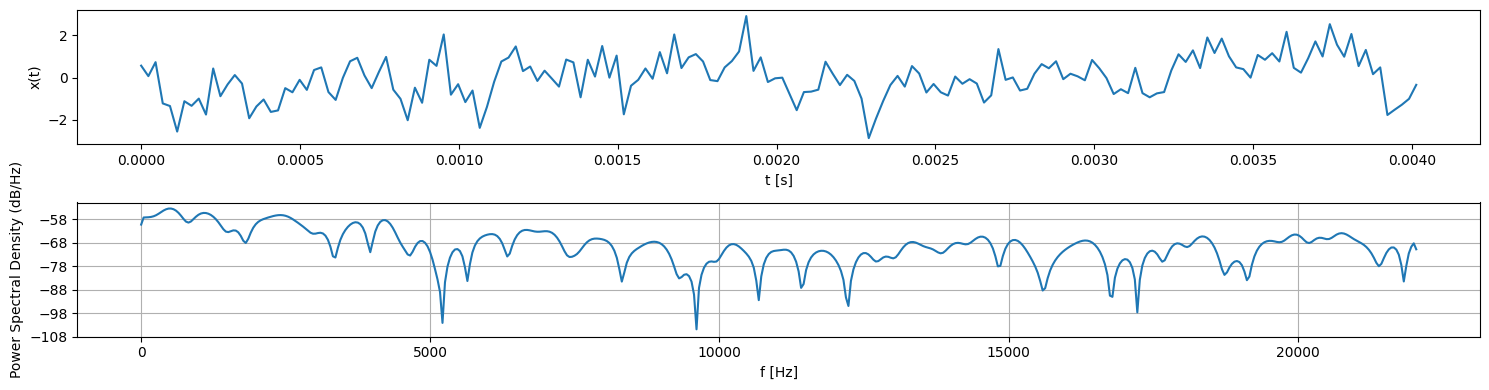

In [21]:
subject = 0
channel = 0
fs = 44100
plot_psd(sleep0[0][1][None, ...], subject=subject, channel=channel, fs=fs)

### ETT

In [7]:
etth1 = pd.read_csv("/home/oturgut/data/benchmarks/ETTh1.csv")
etth2 = pd.read_csv("/home/oturgut/data/benchmarks/ETTh2.csv")

In [8]:
etth1

date    HUFL   HULL   MUFL   MULL   LUFL   LULL  \
0      2016-07-01 00:00:00   5.827  2.009  1.599  0.462  4.203  1.340   
1      2016-07-01 01:00:00   5.693  2.076  1.492  0.426  4.142  1.371   
2      2016-07-01 02:00:00   5.157  1.741  1.279  0.355  3.777  1.218   
3      2016-07-01 03:00:00   5.090  1.942  1.279  0.391  3.807  1.279   
4      2016-07-01 04:00:00   5.358  1.942  1.492  0.462  3.868  1.279   
...                    ...     ...    ...    ...    ...    ...    ...   
17415  2018-06-26 15:00:00  -1.674  3.550 -5.615  2.132  3.472  1.523   
17416  2018-06-26 16:00:00  -5.492  4.287 -9.132  2.274  3.533  1.675   
17417  2018-06-26 17:00:00   2.813  3.818 -0.817  2.097  3.716  1.523   
17418  2018-06-26 18:00:00   9.243  3.818  5.472  2.097  3.655  1.432   
17419  2018-06-26 19:00:00  10.114  3.550  6.183  1.564  3.716  1.462   

              OT  
0      30.531000  
1      27.787001  
2      27.787001  
3      25.044001  
4      21.948000  
...          ...  
17415  10.904000  
17416  11.044000  
17417  10.271000  
17418   9.778000  
17419   9.567000  

[17420 rows x 8 columns]

In [9]:
etth2

date       HUFL    HULL       MUFL    MULL    LUFL  \
0      2016-07-01 00:00:00  41.130001  12.481  36.535999   9.355   4.424   
1      2016-07-01 01:00:00  37.528000  10.136  33.936001   7.532   4.435   
2      2016-07-01 02:00:00  37.946999  11.309  35.330002   9.007   2.100   
3      2016-07-01 03:00:00  38.952000  11.895  35.543999   9.436   3.380   
4      2016-07-01 04:00:00  38.113998  11.476  35.410000   9.623   2.036   
...                    ...        ...     ...        ...     ...     ...   
17415  2018-06-26 15:00:00  39.202999  11.392  49.644001  11.929 -10.331   
17416  2018-06-26 16:00:00  38.113998  10.974  48.759998  11.366 -10.331   
17417  2018-06-26 17:00:00  39.622002  10.974  50.609001  11.661 -11.557   
17418  2018-06-26 18:00:00  43.643002  13.403  54.737000  13.778 -10.299   
17419  2018-06-26 19:00:00  38.868000  10.052  49.859001  10.669 -11.525   

        LULL         OT  
0      1.311  38.661999  
1      1.215  37.124001  
2      0.000  36.465000  
3      1.215  33.608501  
4      0.000  31.850500  
...      ...        ...  
17415 -1.258  47.084999  
17416 -1.290  48.183498  
17417 -1.418  48.183498  
17418 -1.418  46.865501  
17419 -1.418  45.986500  

[17420 rows x 8 columns]

In [10]:
np.array(etth1.values[:, 1:], dtype=float)

array([[ 5.82700014,  2.00900006,  1.59899998, ...,  4.20300007,
         1.34000003, 30.53100014],
       [ 5.69299984,  2.07599998,  1.49199998, ...,  4.1420002 ,
         1.37100005, 27.78700066],
       [ 5.15700006,  1.74100006,  1.27900004, ...,  3.77699995,
         1.21800005, 27.78700066],
       ...,
       [ 2.81299996,  3.81800008, -0.81699997, ...,  3.71600008,
         1.523     , 10.27099991],
       [ 9.24300003,  3.81800008,  5.47200012, ...,  3.65499997,
         1.43200004,  9.77799988],
       [10.11400032,  3.54999995,  6.18300009, ...,  3.71600008,
         1.46200001,  9.56700039]])

In [11]:
etth1_tensor = torch.tensor(np.array(etth1.values[:, 1:], dtype=float)).permute(1, 0)
etth1_tensor.shape

torch.Size([7, 17420])

In [12]:
etth2_tensor = torch.tensor(np.array(etth2.values[:, 1:], dtype=float)).permute(1, 0)
etth2_tensor.shape

torch.Size([7, 17420])

In [8]:
etth1_tensor[0].mean(), etth1_tensor[0].std()

(tensor(7.3751, dtype=torch.float64), tensor(7.0677, dtype=torch.float64))

In [14]:
[etth1_tensor[idx].std() for idx in range(len(etth1_tensor))]

[tensor(7.0677, dtype=torch.float64),
 tensor(2.0423, dtype=torch.float64),
 tensor(6.8270, dtype=torch.float64),
 tensor(1.8093, dtype=torch.float64),
 tensor(1.1645, dtype=torch.float64),
 tensor(0.5996, dtype=torch.float64),
 tensor(8.5669, dtype=torch.float64)]

In [20]:
etth_all_new = torch.stack((etth1_tensor, etth2_tensor))
etth_all_new.shape

torch.Size([2, 7, 17420])

In [32]:
etth2_tensor[0].mean(), etth2_tensor[0].std()

(tensor(37.1933, dtype=torch.float64), tensor(10.2189, dtype=torch.float64))

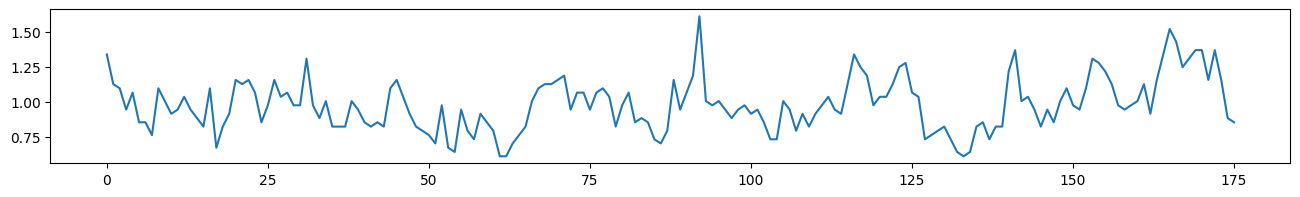

In [28]:
plt.figure(figsize=(16, 2))
plt.plot(etth1_tensor[5, 10452:10628])
plt.show()

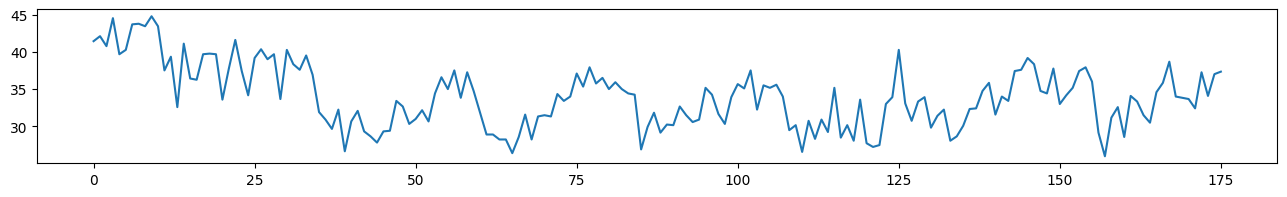

In [34]:
plt.figure(figsize=(16, 2))
plt.plot(etth2_tensor[0, 10452:10628])
plt.show()

In [21]:
(etth_all_new - etth_all_new.mean(dim=-1, keepdim=True)) / etth_all_new.std(dim=-1, keepdim=True)

tensor([[[-0.2190, -0.2380, -0.3138,  ..., -0.6455,  0.2643,  0.3875],
         [-0.1142, -0.0814, -0.2454,  ...,  0.7715,  0.7715,  0.6403],
         [-0.3957, -0.4113, -0.4425,  ..., -0.7496,  0.1716,  0.2758],
         ...,
         [ 0.9763,  0.9239,  0.6105,  ...,  0.5581,  0.5057,  0.5581],
         [ 0.8057,  0.8574,  0.6022,  ...,  1.1109,  0.9592,  1.0092],
         [ 2.0085,  1.6882,  1.6882,  ..., -0.3564, -0.4140, -0.4386]],

        [[ 0.3852,  0.0327,  0.0738,  ...,  0.2377,  0.6312,  0.1639],
         [ 0.6550,  0.2655,  0.4603,  ...,  0.4047,  0.8082,  0.2515],
         [-0.5587, -0.7578, -0.6510,  ...,  0.5192,  0.8353,  0.4617],
         ...,
         [ 1.2772,  1.2790,  0.8990,  ..., -1.3237, -1.1190, -1.3185],
         [ 0.5650,  0.5490,  0.3469,  ...,  0.1111,  0.1111,  0.1111],
         [ 1.0138,  0.8845,  0.8290,  ...,  1.8147,  1.7039,  1.6299]]],
       dtype=torch.float64)

In [27]:
etth_all_new_list_float64 = [("etth", sample) for sample in etth_all_new]
etth_all_new_list_float64

[('etth',
  tensor([[ 5.8270,  5.6930,  5.1570,  ...,  2.8130,  9.2430, 10.1140],
          [ 2.0090,  2.0760,  1.7410,  ...,  3.8180,  3.8180,  3.5500],
          [ 1.5990,  1.4920,  1.2790,  ..., -0.8170,  5.4720,  6.1830],
          ...,
          [ 4.2030,  4.1420,  3.7770,  ...,  3.7160,  3.6550,  3.7160],
          [ 1.3400,  1.3710,  1.2180,  ...,  1.5230,  1.4320,  1.4620],
          [30.5310, 27.7870, 27.7870,  ..., 10.2710,  9.7780,  9.5670]],
         dtype=torch.float64)),
 ('etth',
  tensor([[ 41.1300,  37.5280,  37.9470,  ...,  39.6220,  43.6430,  38.8680],
          [ 12.4810,  10.1360,  11.3090,  ...,  10.9740,  13.4030,  10.0520],
          [ 36.5360,  33.9360,  35.3300,  ...,  50.6090,  54.7370,  49.8590],
          ...,
          [  4.4240,   4.4350,   2.1000,  ..., -11.5570, -10.2990, -11.5250],
          [  1.3110,   1.2150,   0.0000,  ...,  -1.4180,  -1.4180,  -1.4180],
          [ 38.6620,  37.1240,  36.4650,  ...,  48.1835,  46.8655,  45.9865]],
         dtype=t

In [28]:
# torch.save(etth_all_new_list_float64, "/home/oturgut/data/processed/benchmarks/forecasting/data_etth_all_new_float64.pt")

In [36]:
etth_all_new_list_float64[0][1].mean(dim=-1, keepdim=True), etth_all_new_list_float64[0][1].std(dim=-1, keepdim=True)

(tensor([[ 7.3751],
         [ 2.2422],
         [ 4.3002],
         [ 0.8816],
         [ 3.0661],
         [ 0.8569],
         [13.3247]], dtype=torch.float64),
 tensor([[7.0677],
         [2.0423],
         [6.8270],
         [1.8093],
         [1.1645],
         [0.5996],
         [8.5669]], dtype=torch.float64))

In [35]:
(etth_all_new_list_float64[0][1] - etth_all_new_list_float64[0][1].mean(dim=-1, keepdim=True)) / etth_all_new_list_float64[0][1].std(dim=-1, keepdim=True)

tensor([[-0.2190, -0.2380, -0.3138,  ..., -0.6455,  0.2643,  0.3875],
        [-0.1142, -0.0814, -0.2454,  ...,  0.7715,  0.7715,  0.6403],
        [-0.3957, -0.4113, -0.4425,  ..., -0.7496,  0.1716,  0.2758],
        ...,
        [ 0.9763,  0.9239,  0.6105,  ...,  0.5581,  0.5057,  0.5581],
        [ 0.8057,  0.8574,  0.6022,  ...,  1.1109,  0.9592,  1.0092],
        [ 2.0085,  1.6882,  1.6882,  ..., -0.3564, -0.4140, -0.4386]],
       dtype=torch.float64)

In [39]:
ili = torch.load("/home/oturgut/data/processed/benchmarks/forecasting/data_ili_all.pt")

In [41]:
ili[0][1].shape

torch.Size([7, 966])

In [37]:
etth_all_new_list = [("etth", sample.to(torch.float32)) for sample in etth_all_new]
etth_all_new_list

[('etth',
  tensor([[ 5.8270,  5.6930,  5.1570,  ...,  2.8130,  9.2430, 10.1140],
          [ 2.0090,  2.0760,  1.7410,  ...,  3.8180,  3.8180,  3.5500],
          [ 1.5990,  1.4920,  1.2790,  ..., -0.8170,  5.4720,  6.1830],
          ...,
          [ 4.2030,  4.1420,  3.7770,  ...,  3.7160,  3.6550,  3.7160],
          [ 1.3400,  1.3710,  1.2180,  ...,  1.5230,  1.4320,  1.4620],
          [30.5310, 27.7870, 27.7870,  ..., 10.2710,  9.7780,  9.5670]])),
 ('etth',
  tensor([[ 41.1300,  37.5280,  37.9470,  ...,  39.6220,  43.6430,  38.8680],
          [ 12.4810,  10.1360,  11.3090,  ...,  10.9740,  13.4030,  10.0520],
          [ 36.5360,  33.9360,  35.3300,  ...,  50.6090,  54.7370,  49.8590],
          ...,
          [  4.4240,   4.4350,   2.1000,  ..., -11.5570, -10.2990, -11.5250],
          [  1.3110,   1.2150,   0.0000,  ...,  -1.4180,  -1.4180,  -1.4180],
          [ 38.6620,  37.1240,  36.4650,  ...,  48.1835,  46.8655,  45.9865]]))]

In [38]:
# torch.save(etth_all_new_list, "/home/oturgut/data/processed/benchmarks/forecasting/data_etth_all_new.pt")

In [17]:
etth_all = torch.load("/home/oturgut/data/processed/benchmarks/forecasting/data_etth_all.pt")
etth_all

[('etth',
  tensor([[-0.2190, -0.2380, -0.3138,  ..., -0.6455,  0.2643,  0.3875],
          [-0.1142, -0.0814, -0.2454,  ...,  0.7715,  0.7715,  0.6403],
          [-0.3957, -0.4113, -0.4425,  ..., -0.7496,  0.1716,  0.2758],
          ...,
          [ 0.9763,  0.9239,  0.6105,  ...,  0.5581,  0.5057,  0.5581],
          [ 0.8057,  0.8574,  0.6022,  ...,  1.1109,  0.9592,  1.0092],
          [ 2.0085,  1.6882,  1.6882,  ..., -0.3564, -0.4140, -0.4386]])),
 ('etth',
  tensor([[ 0.3852,  0.0327,  0.0738,  ...,  0.2377,  0.6312,  0.1639],
          [ 0.6550,  0.2655,  0.4603,  ...,  0.4047,  0.8082,  0.2515],
          [-0.5587, -0.7578, -0.6510,  ...,  0.5192,  0.8353,  0.4617],
          ...,
          [ 1.2772,  1.2790,  0.8990,  ..., -1.3237, -1.1190, -1.3185],
          [ 0.5650,  0.5490,  0.3469,  ...,  0.1111,  0.1111,  0.1111],
          [ 1.0138,  0.8845,  0.8290,  ...,  1.8147,  1.7039,  1.6299]]))]

In [19]:
etth_all[0][1].shape, etth_all[0][1].dtype

(torch.Size([7, 17420]), torch.float32)

In [38]:
etth1_tensor_normalized = (etth1_tensor - etth1_tensor.mean(dim=-1, keepdim=True)) / (etth1_tensor.std(dim=-1, keepdim=True) + 1e-9)

In [41]:
etth2_tensor_normalized = (etth2_tensor - etth2_tensor.mean(dim=-1, keepdim=True)) / (etth2_tensor.std(dim=-1, keepdim=True) + 1e-9)

In [42]:
etth2_tensor_normalized[0, :10]

tensor([ 0.3852,  0.0327,  0.0738,  0.1721,  0.0901, -0.0410,  0.1803,  0.2131,
        -0.3197,  0.1229], dtype=torch.float64)

In [43]:
etth_all[1][1][0, :10]

tensor([ 0.3852,  0.0327,  0.0738,  0.1721,  0.0901, -0.0410,  0.1803,  0.2131,
        -0.3197,  0.1229])

In [44]:
etth2_tensor.std(dim=-1, keepdim=True)[0]

tensor([10.2189], dtype=torch.float64)

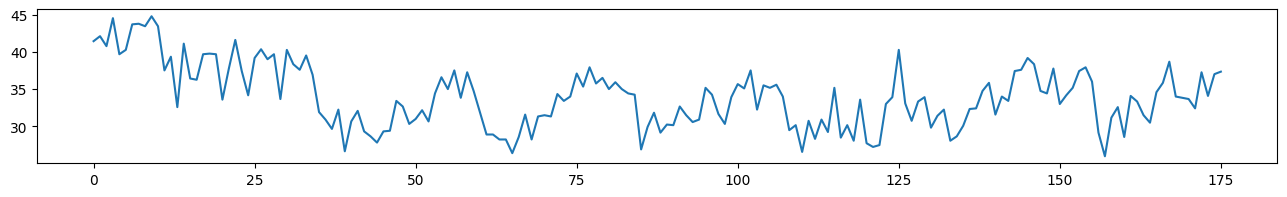

In [45]:
plt.figure(figsize=(16, 2))
plt.plot(etth2_tensor[0, 10452:10628])
plt.show()

In [47]:
pems = np.load("/home/oturgut/Downloads/Timer_datasets/PEMS/PEMS03.npz")

In [52]:
pems["data"].shape

(26208, 358, 1)

In [2]:
weather = pd.read_csv("/home/oturgut/Downloads/weather_dataset.tsf", sep="\t")

In [6]:
weather.values

array([['# This dataset contains 3010 daily time series representing the variations of four weather variables: rain, mintemp, maxtemp and solar radiation, measured at the weather stations in Australia.'],
       ['# The series were extracted using R bomrang package.'],
       ['#'],
       ...,
       ['T3008:solar:25.5,25.7,25.4,28.3,28.8,28.7,28.7,27.8,28.4,28.6,28.5,27.9,26.6,27,26.2,27.5,27.4,28.1,28.6,29.3,28.3,28.8,28,28.3,28.2,28,27.9,27.5,25.7,27.3,27.5,27.2,27.2,28.7,28.5,29.8,29.8,28.6,11.5,29.8,29.7,30,29.2,29.1,25,26.9,29.6,29.4,29.7,29.5,27.5,27.2,21.3,27.7,14.5,26.5,17.9,26.8,27.7,28.5,28.3,27.8,27,24.3,25.6,27,20,19.4,25.9,7.7,24.2,27.4,27.4,27.2,26,23.4,25.4,21.8,25.8,25.7,23.3,25,23.6,23,14.5,16.1,25.4,24.6,24.2,22.4,23.6,23.5,23.2,23.8,24.1,24,23.9,23.6,23.3,21.9,20.6,22.8,22.6,22.7,22.7,21.9,22.1,21.8,21.4,20.4,17.5,14.8,14.9,15.7,4.2,18.8,19.1,18.2,14.2,18,16.5,19.6,19.3,19.5,19.1,19,19,19.3,18.8,18.6,18.9,18.5,18.2,17.7,17.6,17.6,17.9,17.9,17.5,14.6,16.1,13.1,8.3,1

In [89]:
etth = torch.load("/home/oturgut/data/processed/signalnet/classification/EMG/train.pt")
etth = torch.load("/home/oturgut/data/processed/signalnet/forecasting/data_etth_all.pt")

In [ ]:
etth["samples"].shape

In [91]:
len(etth)

2

In [92]:
etth[0][1].shape, etth[0][1].mean(), etth[0][1].std()

(torch.Size([1, 7, 17420]), tensor(2.3275e-08), tensor(1.0000))

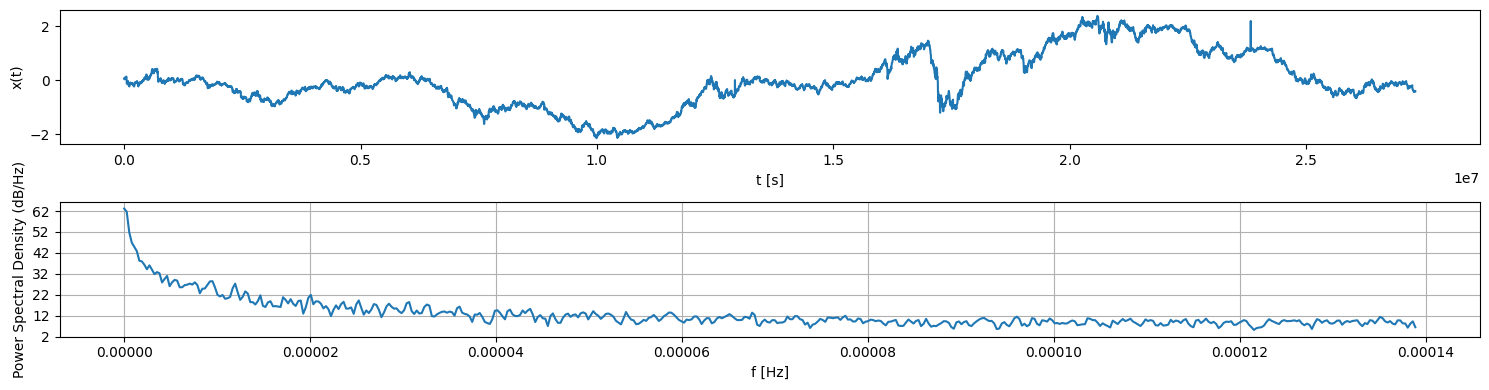

In [88]:
subject = 0
channel = 0
fs = 0.000277778
plot_psd(etth[0][1][...], subject=subject, channel=channel, fs=fs)

### TDBrain

In [3]:
def list_files(rootdir):
    files = []
    for file in os.listdir(rootdir):
        curr_object = os.path.join(rootdir, file)
        if os.path.isdir(curr_object): 
            files += list_files(curr_object)
        elif ".vhdr" in curr_object:
            files.append(curr_object)

    return files

# Replace 'directory_path' with the path of the directory you want to search
directory_path = '/home/oturgut/data/TDBrain/'
files = list_files(directory_path)

In [4]:
len(files)

2692

In [5]:
chOrder_standard_tuev = ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', \
                         'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF']

In [6]:
chOrder_standard = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz']

In [7]:
data_raw = mne.io.read_raw_brainvision(files[0], verbose=False)
print(data_raw.ch_names)

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC3', 'FCz', 'FC4', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP3', 'CPz', 'CP4', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2', 'VPVA', 'VNVB', 'HPHL', 'HNHR', 'Erbs', 'OrbOcc', 'Mass']


In [8]:
drop_channels = [ch for ch in data_raw.ch_names if ch not in chOrder_standard]
print(drop_channels)

['FC3', 'FCz', 'FC4', 'CP3', 'CPz', 'CP4', 'Oz', 'VPVA', 'VNVB', 'HPHL', 'HNHR', 'Erbs', 'OrbOcc', 'Mass']


In [9]:
def load_data(file, normalise=True):
    data_raw = mne.io.read_raw_brainvision(file, verbose=False)

    if drop_channels is not None:
        useless_chs = []
        for ch in drop_channels:
            if ch in data_raw.ch_names:
                useless_chs.append(ch)
        data_raw.drop_channels(useless_chs)

    if chOrder_standard is not None and len(chOrder_standard) == len(data_raw.ch_names):
        data_raw.reorder_channels(chOrder_standard)

    if data_raw.ch_names != chOrder_standard:
        raise Exception("channel order is wrong!")

    data = data_raw.load_data(verbose=False)._data

    if normalise:
        data = ( data - data.mean(axis=-1, keepdims=True) ) / ( data.std(axis=-1, keepdims=True) + 1e-9 )

    return data


if __name__ == "__main__":
    num_workers = 24
    with Pool(processes=num_workers) as pool:
        # Use the pool.map function to apply the square function to each element in the numbers list
        data_tdb = pool.map(load_data, files)

In [10]:
len(data_tdb), data_tdb[1000].shape, data_tdb[1000].dtype

(2692, (19, 60015), dtype('float64'))

In [13]:
data_tdb[100].min(), data_tdb[100].max(), data_tdb[100].mean(), data_tdb[100].std()

(-3.598114747348022,
 11.516004063002264,
 6.688131643882883e-15,
 0.9999785230383272)

In [14]:
tdbrain = [("eeg_10-20", torch.tensor(data, dtype=torch.float32)) for data in data_tdb]

In [15]:
len(tdbrain)

2692

In [18]:
tdbrain

[('eeg_10-20',
  tensor([[-2.0500, -2.1159, -2.2176,  ..., -0.3777, -0.2968, -0.4531],
          [-1.8210, -1.8786, -1.9954,  ..., -0.6954, -0.5279, -0.5973],
          [-2.1803, -2.2538, -2.3763,  ..., -1.4595, -1.3056, -1.5225],
          ...,
          [-2.8479, -2.8887, -2.9231,  ..., -0.1633, -0.0044, -0.1354],
          [-2.5242, -2.4914, -2.4662,  ...,  0.8592,  0.8789,  0.7945],
          [-3.0386, -2.9563, -2.8793,  ...,  0.3093,  0.2950,  0.1070]])),
 ('eeg_10-20',
  tensor([[-0.7696, -0.7386, -0.7320,  ...,  1.1946,  1.2033,  1.2144],
          [-0.9255, -0.8815, -0.8458,  ...,  1.4560,  1.4335,  1.4313],
          [-0.9194, -0.8342, -0.7697,  ...,  1.2985,  1.3288,  1.3670],
          ...,
          [-1.2812, -1.1872, -1.1184,  ...,  1.5979,  1.6088,  1.6225],
          [-1.1347, -1.0382, -0.9334,  ...,  2.1255,  2.1034,  2.1301],
          [-0.6529, -0.4910, -0.3421,  ...,  2.6657,  2.6036,  2.6036]])),
 ('eeg_10-20',
  tensor([[-1.7607, -1.7697, -1.8560,  ...,  0.9816,  0

In [16]:
tdbrain[0][1].shape

torch.Size([19, 60008])

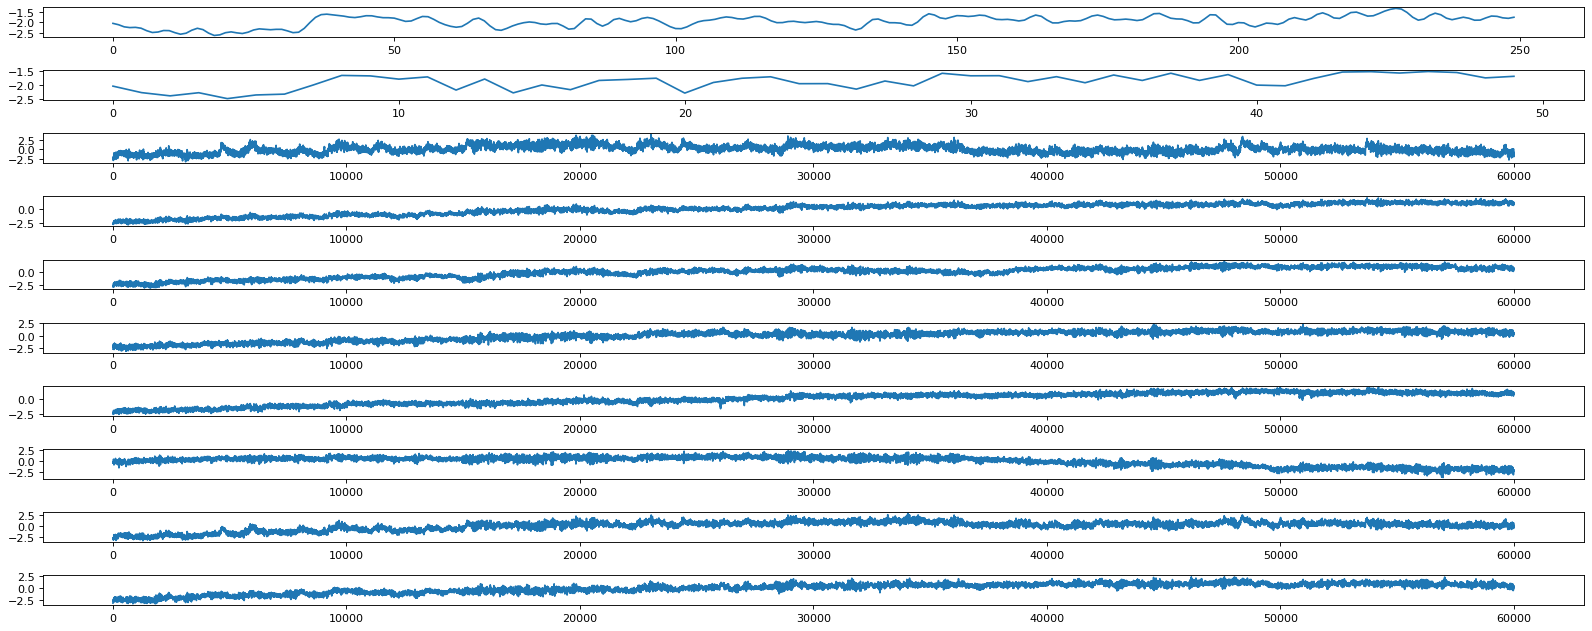

In [22]:
subject = 0
data = tdbrain[subject][1]

step = 1
plt.figure(figsize=(20, 8), dpi=80)

plt.subplot(10,1,1)
plt.plot(data[0, :250:step])

plt.subplot(10,1,2)
plt.plot(data[0, :250:step*5])

plt.subplot(10,1,3)
plt.plot(data[2, ::step])

plt.subplot(10,1,4)
plt.plot(data[4, ::step])

plt.subplot(10,1,5)
plt.plot(data[6, ::step])

plt.subplot(10,1,6)
plt.plot(data[8, ::step])

plt.subplot(10,1,7)
plt.plot(data[12, ::step])

plt.subplot(10,1,8)
plt.plot(data[14, ::step])

plt.subplot(10,1,9)
plt.plot(data[16, ::step])

plt.subplot(10,1,10)
plt.plot(data[18, ::step])

plt.tight_layout()
plt.show()

In [23]:
# torch.save(tdbrain, "/home/oturgut/data/processed/TDBrain/data.pt")

In [3]:
data_tdb = torch.load("/home/oturgut/data/processed/TDBrain/data.pt")

In [4]:
data_tdb[0]

('eeg_10-20',
 tensor([[-2.0500, -2.1159, -2.2176,  ..., -0.3777, -0.2968, -0.4531],
         [-1.8210, -1.8786, -1.9954,  ..., -0.6954, -0.5279, -0.5973],
         [-2.1803, -2.2538, -2.3763,  ..., -1.4595, -1.3056, -1.5225],
         ...,
         [-2.8479, -2.8887, -2.9231,  ..., -0.1633, -0.0044, -0.1354],
         [-2.5242, -2.4914, -2.4662,  ...,  0.8592,  0.8789,  0.7945],
         [-3.0386, -2.9563, -2.8793,  ...,  0.3093,  0.2950,  0.1070]]))

In [5]:
data_tdb[0][1].shape, data_tdb[0][1], data_tdb[0][1].std()

(torch.Size([19, 60008]),
 tensor([[-2.0500, -2.1159, -2.2176,  ..., -0.3777, -0.2968, -0.4531],
         [-1.8210, -1.8786, -1.9954,  ..., -0.6954, -0.5279, -0.5973],
         [-2.1803, -2.2538, -2.3763,  ..., -1.4595, -1.3056, -1.5225],
         ...,
         [-2.8479, -2.8887, -2.9231,  ..., -0.1633, -0.0044, -0.1354],
         [-2.5242, -2.4914, -2.4662,  ...,  0.8592,  0.8789,  0.7945],
         [-3.0386, -2.9563, -2.8793,  ...,  0.3093,  0.2950,  0.1070]]),
 tensor(1.0000))

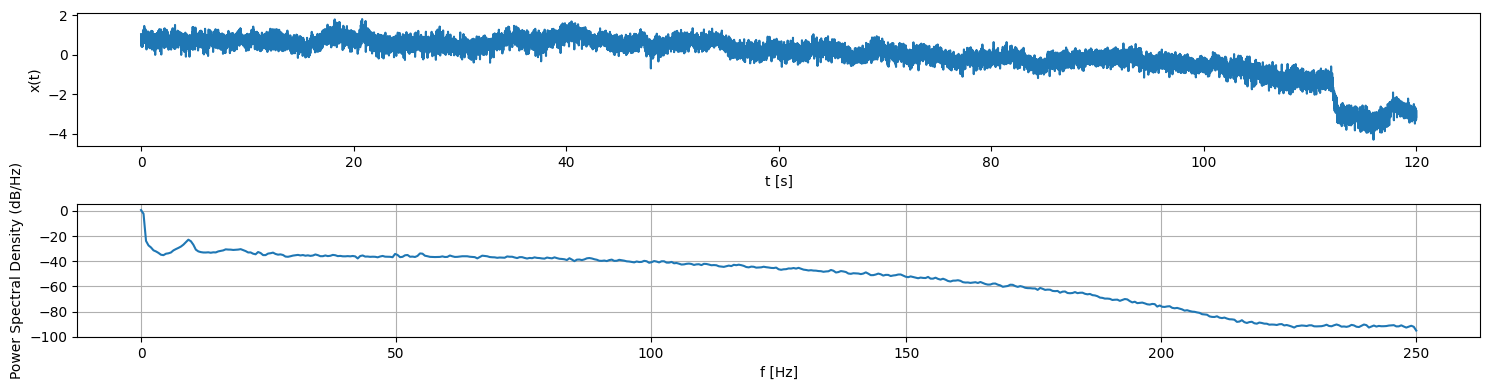

In [29]:
subject = 0
channel = 5
fs = 500
plot_psd(data_tdb[0][1][None, ...], subject=subject, channel=channel, fs=fs)

### Visualisation

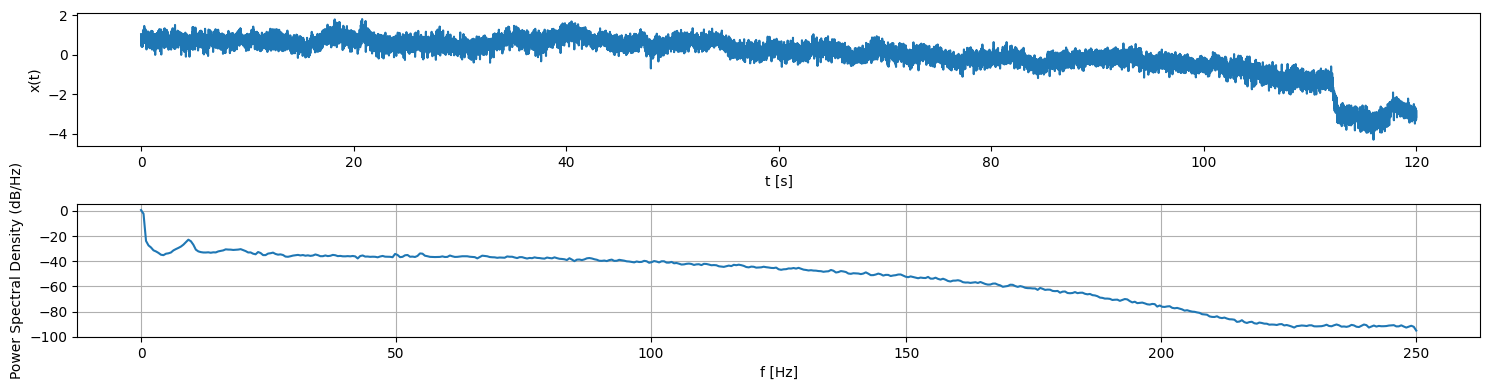

In [26]:
subject = 0
channel = 5
fs = 500
plot_psd(data_tdb[0][1][None, ...], subject=subject, channel=channel, fs=fs)

In [7]:
sleepeeg = torch.load("/home/oturgut/data/processed/signalnet/sleepeeg_train.pt")

In [8]:
sleepeeg[0][1].shape

torch.Size([1, 178])

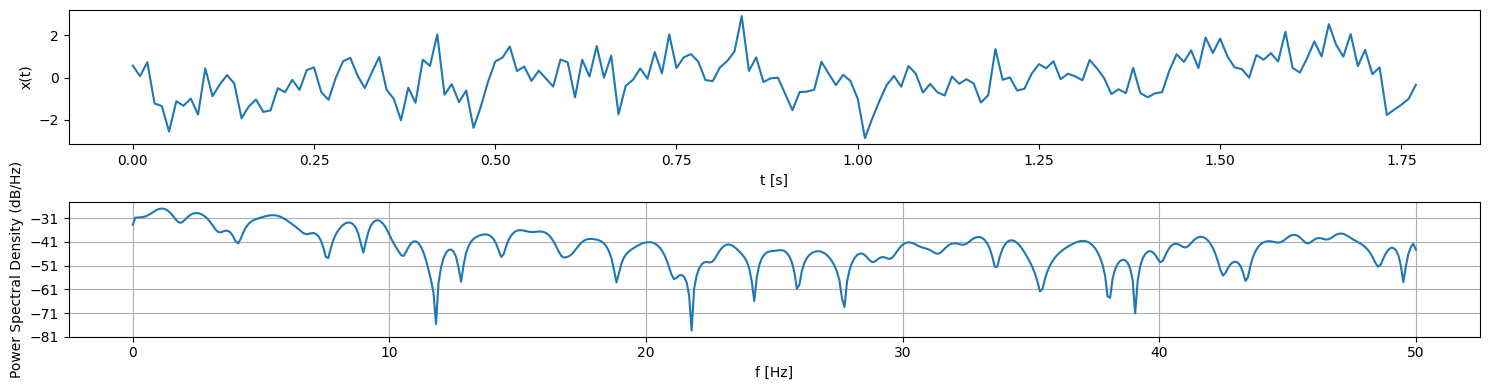

In [9]:
subject = 0
channel = 0
fs = 100
plot_psd(sleepeeg[0][1][None, ...], subject=subject, channel=channel, fs=fs)

In [10]:
audio = torch.load("/home/oturgut/data/processed/signalnet/audioset_20k.pt")

In [11]:
audio[0][1].shape

torch.Size([1, 441000])

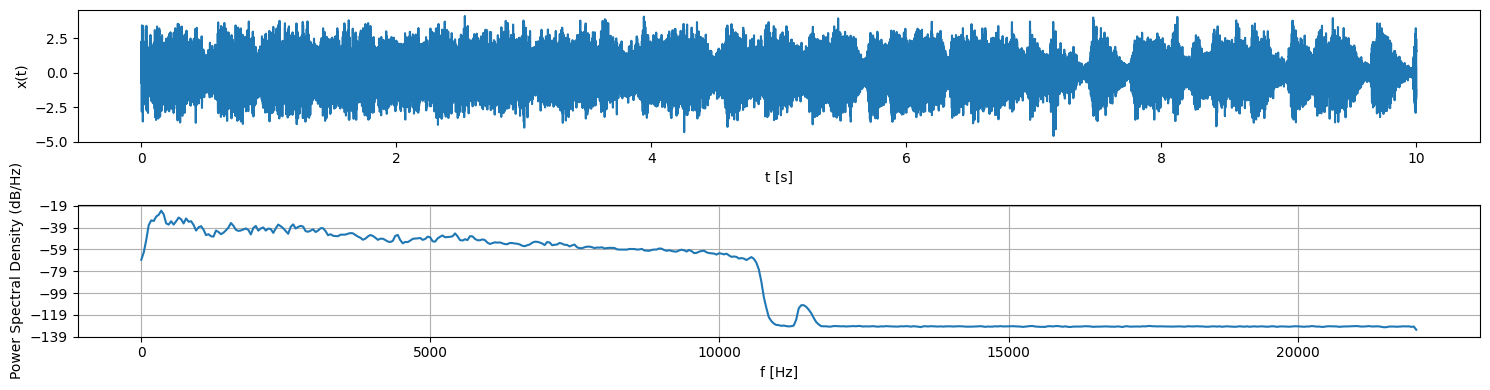

In [12]:
subject = 0
channel = 0
fs = 44100
plot_psd(audio[0][1][None, ...], subject=subject, channel=channel, fs=fs)

In [13]:
ecg = torch.load("/home/oturgut/data/processed/mimic-ecg-text/ecgs_val_10k_clean.pt")

In [14]:
ecg.shape

torch.Size([9661, 12, 5000])

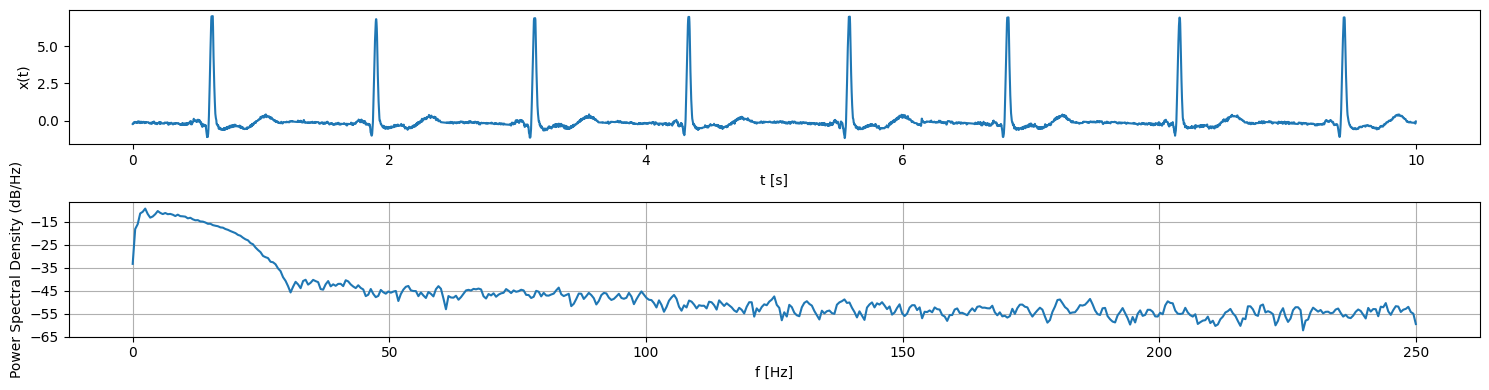

In [15]:
subject = 0
channel = 0
fs = 500
plot_psd(ecg[...], subject=subject, channel=channel, fs=fs)

In [ ]:
# torch.save(tdbrain, "/home/oturgut/data/processed/signalnet/tdbrain.pt")

### Visualisation

In [4]:
ecg = torch.load("/home/oturgut/data/processed/mimic-ecg-text/ecgs_val_10k_clean.pt")

In [5]:
audio = torch.load("/home/oturgut/data/processed/AudioSet/audioset_20k.pt")

In [6]:
tdb = torch.load("/home/oturgut/data/processed/TDBrain/tdbrain.pt")

In [7]:
sleep = torch.load("/home/oturgut/data/processed/signalnet/classification/SleepEEG/test.pt")

In [8]:
tuev = torch.load("/home/oturgut/data/processed/TUAB/test/data.pt")
tuab = torch.load("/home/oturgut/data/processed/TUEV/test/data.pt")

In [26]:
seed = torch.load("/home/oturgut/data/processed/SEED/data_seed_all.pt")

In [27]:
print(ecg.shape)
print(audio[0][1].shape)
print(tdb[0][1].shape)
print(sleep[0][1].shape)
print(tuab[0][1].shape)
print(tuev[0][1].shape)
print(seed[0][1].shape)

torch.Size([9661, 12, 5000])
torch.Size([1, 441000])
torch.Size([33, 60003])
torch.Size([1, 1, 178])
torch.Size([19, 1000])
torch.Size([19, 2000])
torch.Size([19, 37001])


In [20]:
plt.rcParams.update({'font.size': 13})

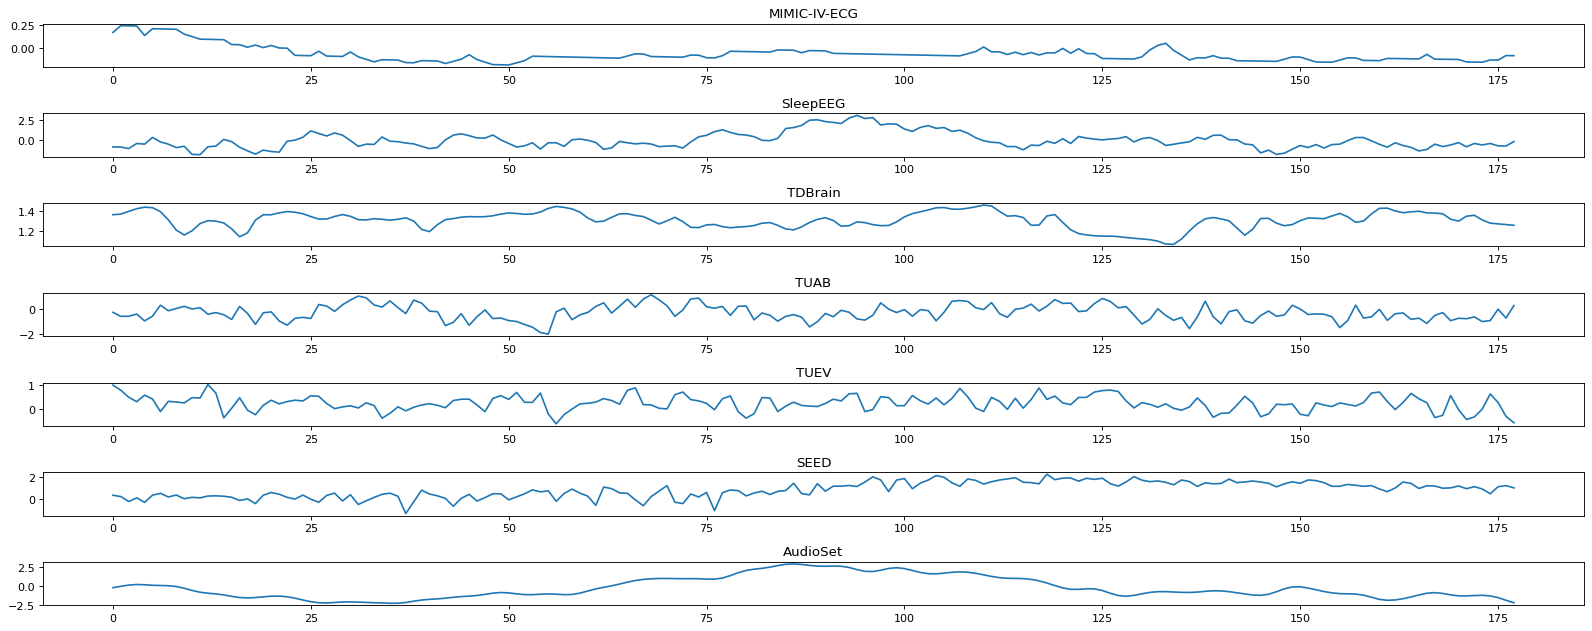

In [28]:
step = 1
plt.figure(figsize=(20, 8), dpi=80)

plt.subplot(7, 1, 1)
plt.plot(ecg[0, 0, 178*3:178*4:step])
plt.title("MIMIC-IV-ECG")

plt.subplot(7, 1, 2)
plt.plot(sleep[0][1][0, 0, ::step])
plt.title("SleepEEG")

plt.subplot(7, 1, 3)
plt.plot(tdb[0][1][0, 178*30:178*31:step])
plt.title("TDBrain")

plt.subplot(7, 1, 4)
plt.plot(tuab[100][1][0, 178*4:178*5:step])
plt.title("TUAB")

plt.subplot(7, 1, 5)
plt.plot(tuev[100][1][0, 178*4:178*5:step])
plt.title("TUEV")

plt.subplot(7, 1, 6)
plt.plot(seed[100][1][0, 178*55:178*56:step])
plt.title("SEED")

plt.subplot(7, 1, 7)
plt.plot(audio[0][1][0, 10000:10178:step])
plt.title("AudioSet")

plt.tight_layout()
plt.show()

In [ ]:
tst_data = torch.load("/home/oturgut/data/processed/signalnet/data_val_new.pt")

In [ ]:
tst_data[0][1].shape

### Plots

In [ ]:
plt.rcParams.update({'font.size': 11})

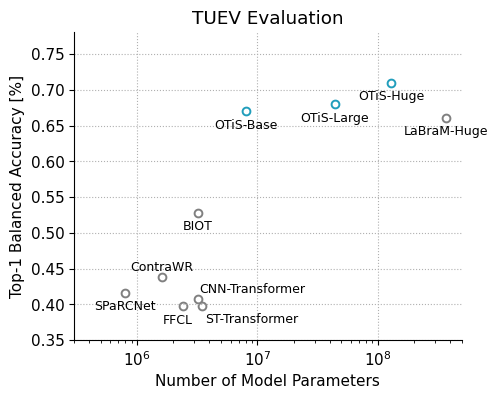

In [ ]:
# Sample data for demonstration
models = ['SPaRCNet', 'ContraWR', 'CNN-Transformer', 'FFCL', 'ST-Transformer', 'BIOT', 'LaBraM-Huge', 'OTiS-Base', 'OTiS-Large', 'OTiS-Huge']
num_parameters = [790000, 1600000, 3200000, 2400000, 3500000, 3200000, 369000000, 8000000, 44000000, 130000000]  # Example number of parameters for each model
performance = [0.416, 0.438, 0.408, 0.397, 0.398, 0.528, 0.661, 0.67, 0.68, 0.71]  # Example performance for each model

# Define colors for each model
colors = ['gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', '#219ebc', '#219ebc', '#219ebc']

# Create scatter plot
plt.figure(figsize=(5, 4))
ax = plt.gca()
for i in range(len(models)):
    plt.scatter(num_parameters[i], performance[i], label=models[i], marker="o", color=colors[i])

    ha="center"
    va="top"
    offset_x = 0
    offset_y = -0.01
    if models[i] == 'CNN-Transformer':
        ha="left"
        va="top"
        offset_x = +1e5
        offset_y = +0.0225
    elif models[i] == 'ST-Transformer':
        ha="left"
        va="top"
        offset_x = +2e5
    elif models[i] == 'FFCL':
        ha="center"
        va="top"
        offset_x = -2e5
    elif models[i] == 'ContraWR':
        offset_y = +0.0225
    
    plt.text(num_parameters[i]+offset_x, performance[i]+offset_y, models[i], fontsize=9, ha=ha, va=va)


# Create scatter plot for smaller white dots to achieve donut shapes
for i in range(len(models)):
    plt.scatter(num_parameters[i], performance[i], color='white', s=10)

# Add labels and title
plt.xlabel('Number of Model Parameters')
plt.xscale(value="log")

plt.ylabel('Top-1 Balanced Accuracy [%]')
plt.title('TUEV Evaluation')

# Hide top and right axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set minimum and maximum values for both axes
ax.set_xlim(3e5, 5e8)
ax.set_ylim(0.35, max(performance) * 1.1)

# Show legend
# plt.legend()

# Show grid
plt.grid(True, linestyle="dotted")

# Show plot
plt.show()

In [3]:
plt.rcParams.update({'font.size': 12})

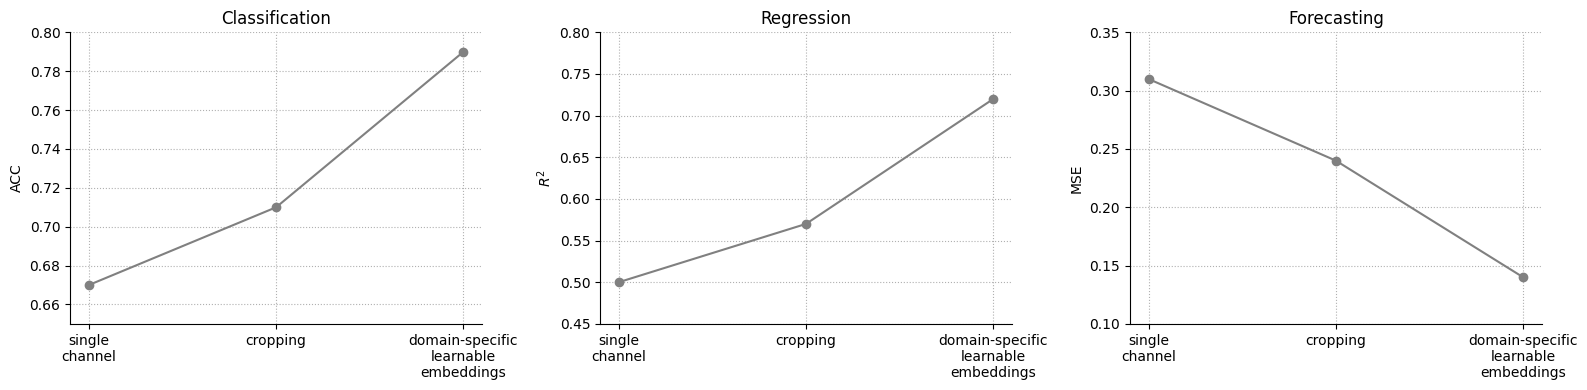

In [6]:
# Sample data
categories = ['single\nchannel', 'cropping', 'domain-specific\nlearnable\nembeddings'] #'shared\nlearnable\nembeddings', 
AUROC = [0.67, 0.71, 0.79]
MSE = [0.31, 0.24, 0.14]
r_squared = [0.5, 0.57, 0.72]

# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Plot AUROC
axs[0].plot(categories, AUROC, color='gray', marker="o")
axs[0].set_title('Classification')
axs[0].set_ylabel('ACC')
axs[0].set_ylim(ymin=0.65, ymax=0.8)
# axs[0].set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].grid(True, linestyle="dotted")

# Plot r_squared
axs[1].plot(categories, r_squared, color='gray', marker="o")
axs[1].set_title('Regression')
axs[1].set_ylabel('$R^2$')
axs[1].set_ylim(ymin=0.45, ymax=0.8)
# axs[1].set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].grid(True, linestyle="dotted")

# Plot MSE
axs[2].plot(categories, MSE, color='gray', marker="o")
axs[2].set_title('Forecasting')
axs[2].set_ylabel('MSE')
axs[2].set_ylim(ymin=0.1, ymax=0.35)
# axs[1].set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].grid(True, linestyle="dotted")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [46]:
b_reg_1 = np.array([0.3022, 0.3086, 0.3011])
b_reg_10 = np.array([0.3855, 0.3728, 0.3796])
b_reg_100 = np.array([0.3976, 0.3887, 0.3865])

b_reg_1.mean(), b_reg_1.std(), b_reg_10.mean(), b_reg_10.std(), b_reg_100.mean(), b_reg_100.std()

(0.30396666666666666,
 0.0033068951533962374,
 0.37929999999999997,
 0.005189091121445701,
 0.39093333333333335,
 0.0047988424530181146)

In [47]:
l_reg_1 = np.array([0.2894, 0.2854, 0.2900])
l_reg_10 = np.array([0.3577, 0.3687, 0.3682])
l_reg_100 = np.array([0.3796, 0.3620, 0.3683])

l_reg_1.mean(), l_reg_1.std(), l_reg_10.mean(), l_reg_10.std(), l_reg_100.mean(), l_reg_100.std()

(0.28826666666666667,
 0.0020417857108151393,
 0.3648666666666667,
 0.005071708018234318,
 0.3699666666666667,
 0.007281178170842653)

In [48]:
h_reg_1 = np.array([0.2712, 0.2741, 0.2699])
h_reg_10 = np.array([0.3189, 0.3189, 0.3315])
h_reg_100 = np.array([0.3772, 0.3923, 0.3593])

h_reg_1.mean(), h_reg_1.std(), h_reg_10.mean(), h_reg_10.std(), h_reg_100.mean(), h_reg_100.std()

(0.2717333333333333,
 0.0017556258776351733,
 0.3231,
 0.0059396969619669995,
 0.3762666666666667,
 0.013488348881740688)

In [53]:
4.303 * ACC_base_std / np.sqrt(3)

array([2.54893827, 3.82494847, 0.9187044 ])

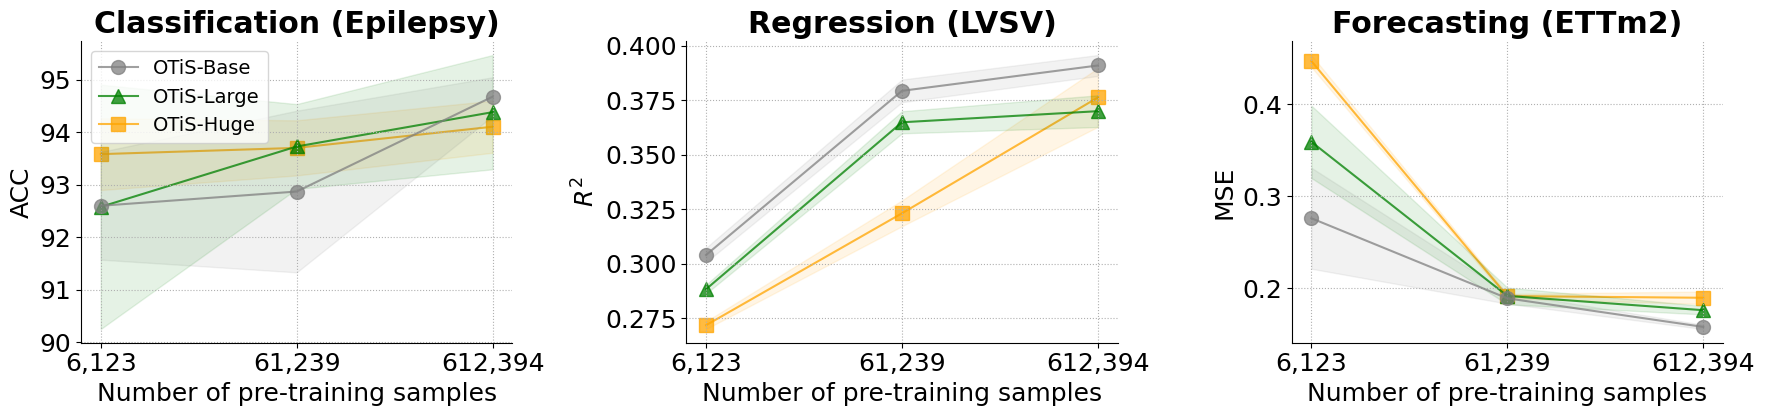

In [139]:
plt.rcParams.update({'font.size': 18})

# Sample data
categories = ['6,123', '61,239', '612,394'] #'shared\nlearnable\nembeddings', 

# ACC_base = [0.9260, 0.9287, 0.9468]
# ACC_large = [0.9257, 0.9373, 0.9438]
# ACC_huge = [0.9357, 0.937, 0.9410]

ACC_base = np.array([epilepsy_b_1.mean(), epilepsy_b_10.mean(), epilepsy_b_100.mean()])
ACC_base_std = np.array([epilepsy_b_1.std(), epilepsy_b_10.std(), epilepsy_b_100.std()])
ACC_base_ci = 4.303 * ACC_base_std / np.sqrt(3)

ACC_large = np.array([epilepsy_l_1.mean(), epilepsy_l_10.mean(), epilepsy_l_100.mean()])
ACC_large_std = np.array([epilepsy_l_1.std(), epilepsy_l_10.std(), epilepsy_l_100.std()])

ACC_huge = np.array([epilepsy_h_1.mean(), epilepsy_h_10.mean(), epilepsy_h_100.mean()])
ACC_huge_std = np.array([epilepsy_h_1.std(), epilepsy_h_10.std(), epilepsy_h_100.std()])

# r_squared_base = np.array([0.291, 0.385, 0.398])
# r_squared_large = np.array([0.289, 0.358, 0.380])
# r_squared_huge = np.array([0.271, 0.319, 0.377])

r_squared_base = np.array([b_reg_1.mean(), b_reg_10.mean(), b_reg_100.mean()])
r_squared_base_std = np.array([b_reg_1.std(), b_reg_10.std(), b_reg_100.std()])

r_squared_large = np.array([l_reg_1.mean(), l_reg_10.mean(), l_reg_100.mean()])
r_squared_large_std = np.array([l_reg_1.std(), l_reg_10.std(), l_reg_100.std()])

r_squared_huge = np.array([h_reg_1.mean(), h_reg_10.mean(), h_reg_100.mean()])
r_squared_huge_std = np.array([h_reg_1.std(), h_reg_10.std(), h_reg_100.std()])

# MSE_base = [0.261, 0.182, 0.157]
# MSE_large = [0.365, 0.188, 0.182]
# MSE_huge = np.array([0.450, 0.189, 0.191])

MSE_base = np.array([ettm2_b_1.mean(), ettm2_b_10.mean(), ettm2_b_100.mean()])
MSE_base_std = np.array([ettm2_b_1.std(), ettm2_b_10.std(), ettm2_b_100.std()])

MSE_large = np.array([ettm2_l_1.mean(), ettm2_l_10.mean(), ettm2_l_100.mean()])
MSE_large_std = np.array([ettm2_l_1.std(), ettm2_l_10.std(), ettm2_l_100.std()])

MSE_huge = np.array([ettm2_h_1.mean(), ettm2_h_10.mean(), ettm2_h_100.mean()])
MSE_huge_std = np.array([ettm2_h_1.std(), ettm2_h_10.std(), ettm2_h_100.std()])

# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 4.5))

# Plot ACC
axs[0].plot(categories, ACC_base, color='grey', marker="o", markersize=10, label="OTiS-Base", alpha=0.75)
axs[0].fill_between(categories, (ACC_base-ACC_base_std), (ACC_base+ACC_base_std), color='grey', alpha=.1)
axs[0].plot(categories, ACC_large, color='green', marker="^", markersize=10, label="OTiS-Large", alpha=0.75, zorder=1)
axs[0].fill_between(categories, (ACC_large-ACC_large_std), (ACC_large+ACC_large_std), color='green', alpha=.1, zorder=1)
axs[0].plot(categories, ACC_huge, color='orange', marker="s", markersize=10, label="OTiS-Huge", alpha=0.75, zorder=0)
axs[0].fill_between(categories, (ACC_huge-ACC_huge_std), (ACC_huge+ACC_huge_std), color='orange', alpha=.1, zorder=0)
axs[0].set_title('Classification (Epilepsy)', fontweight='bold')
axs[0].set_ylabel('ACC')
# axs[0].set_ylim(ymin=0.65, ymax=0.8)
# axs[0].set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].grid(True, linestyle="dotted")
axs[0].set_xlabel('Number of pre-training samples')
axs[0].legend(fontsize="14")

# Plot r_squared
axs[1].plot(categories, r_squared_base, color='grey', marker="o", markersize=10, alpha=0.75)
axs[1].fill_between(categories, (r_squared_base-r_squared_base_std), (r_squared_base+r_squared_base_std), color='grey', alpha=.1)
axs[1].plot(categories, r_squared_large, color='green', marker="^", markersize=10, alpha=0.75, zorder=1)
axs[1].fill_between(categories, (r_squared_large-r_squared_large_std), (r_squared_large+r_squared_large_std), color='green', alpha=.1, zorder=1)
axs[1].plot(categories, r_squared_huge, color='orange', marker="s", markersize=10, alpha=0.75, zorder=0)
axs[1].fill_between(categories, (r_squared_huge-r_squared_huge_std), (r_squared_huge+r_squared_huge_std), color='orange', alpha=.1, zorder=0)
axs[1].set_title('Regression (LVSV)', fontweight='bold')
axs[1].set_ylabel('$R^2$')
# axs[1].set_ylim(ymin=0.45, ymax=0.8)
# axs[1].set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].grid(True, linestyle="dotted")
axs[1].set_xlabel('Number of pre-training samples')

# Plot MSE
axs[2].plot(categories, MSE_base, color='grey', marker="o", markersize=10, alpha=0.75)
axs[2].fill_between(categories, (MSE_base-MSE_base_std), (MSE_base+MSE_base_std), color='grey', alpha=.1)
axs[2].plot(categories, MSE_large, color='green', marker="^", markersize=10, alpha=0.75, zorder=1)
axs[2].fill_between(categories, (MSE_large-MSE_large_std), (MSE_large+MSE_large_std), color='green', alpha=.1, zorder=1)
axs[2].plot(categories, MSE_huge, color='orange', marker="s", markersize=10, alpha=0.75, zorder=0)
axs[2].fill_between(categories, (MSE_huge-MSE_huge_std), (MSE_huge+MSE_huge_std), color='orange', alpha=.1, zorder=0)
axs[2].set_title('Forecasting (ETTm2)', fontweight='bold')
axs[2].set_ylabel('MSE')
# axs[2].set_ylim(ymin=0.1, ymax=0.35)
# axs[2].set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].grid(True, linestyle="dotted")
axs[2].set_xlabel('Number of pre-training samples')

# Adjust layout
plt.tight_layout()

# plt.savefig("./../figures/low_data.png", dpi=160)
# plt.savefig("./../figures/low_data.pdf", dpi=160)

# Show plot
plt.show()

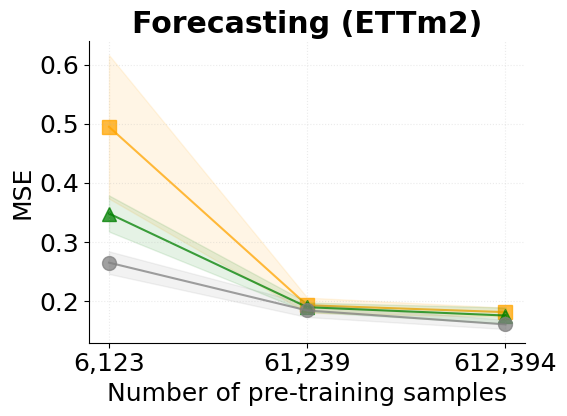

In [9]:
plt.rcParams.update({'font.size': 18})

# Sample data
categories = ['6,123', '61,239', '612,394'] #'shared\nlearnable\nembeddings', 

# ACC_base = [0.9260, 0.9287, 0.9468]
# ACC_large = [0.9257, 0.9373, 0.9438]
# ACC_huge = [0.9357, 0.937, 0.9410]

# ACC_base = np.array([epilepsy_b_1.mean(), epilepsy_b_10.mean(), epilepsy_b_100.mean()])
# ACC_base_std = np.array([epilepsy_b_1.std(), epilepsy_b_10.std(), epilepsy_b_100.std()])
# ACC_base_ci = 4.303 * ACC_base_std / np.sqrt(3)

# ACC_large = np.array([epilepsy_l_1.mean(), epilepsy_l_10.mean(), epilepsy_l_100.mean()])
# ACC_large_std = np.array([epilepsy_l_1.std(), epilepsy_l_10.std(), epilepsy_l_100.std()])

# ACC_huge = np.array([epilepsy_h_1.mean(), epilepsy_h_10.mean(), epilepsy_h_100.mean()])
# ACC_huge_std = np.array([epilepsy_h_1.std(), epilepsy_h_10.std(), epilepsy_h_100.std()])

# r_squared_base = np.array([0.291, 0.385, 0.398])
# r_squared_large = np.array([0.289, 0.358, 0.380])
# r_squared_huge = np.array([0.271, 0.319, 0.377])

# r_squared_base = np.array([b_reg_1.mean(), b_reg_10.mean(), b_reg_100.mean()])
# r_squared_base_std = np.array([b_reg_1.std(), b_reg_10.std(), b_reg_100.std()])
# r_squared_large = np.array([l_reg_1.mean(), l_reg_10.mean(), l_reg_100.mean()])
# r_squared_large_std = np.array([l_reg_1.std(), l_reg_10.std(), l_reg_100.std()])
# r_squared_huge = np.array([h_reg_1.mean(), h_reg_10.mean(), h_reg_100.mean()])
# r_squared_huge_std = np.array([h_reg_1.std(), h_reg_10.std(), h_reg_100.std()])

MSE_base = np.array([ettm2_b_1.mean(), ettm2_b_10.mean(), ettm2_b_100.mean()])
MSE_base_std = np.array([ettm2_b_1.std(), ettm2_b_10.std(), ettm2_b_100.std()])
MSE_large = np.array([ettm2_l_1.mean(), ettm2_l_10.mean(), ettm2_l_100.mean()])
MSE_large_std = np.array([ettm2_l_1.std(), ettm2_l_10.std(), ettm2_l_100.std()])
MSE_huge = np.array([ettm2_h_1.mean(), ettm2_h_10.mean(), ettm2_h_100.mean()])
MSE_huge_std = np.array([ettm2_h_1.std(), ettm2_h_10.std(), ettm2_h_100.std()])

# Create a figure and three subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 4.5))

# # Plot ACC
# axs.plot(categories, ACC_base, color='grey', marker="o", markersize=10, label="OTiS-Base", alpha=0.75)
# axs.fill_between(categories, (ACC_base-ACC_base_std), (ACC_base+ACC_base_std), color='grey', alpha=.1)
# axs.plot(categories, ACC_large, color='green', marker="^", markersize=10, label="OTiS-Large", alpha=0.75, zorder=1)
# axs.fill_between(categories, (ACC_large-ACC_large_std), (ACC_large+ACC_large_std), color='green', alpha=.1, zorder=1)
# axs.plot(categories, ACC_huge, color='orange', marker="s", markersize=10, label="OTiS-Huge", alpha=0.75, zorder=0)
# axs.fill_between(categories, (ACC_huge-ACC_huge_std), (ACC_huge+ACC_huge_std), color='orange', alpha=.1, zorder=0)
# axs.set_title('Classification (Epilepsy)', fontweight='bold')
# axs.set_ylabel('ACC')
# # axs.set_ylim(ymin=0.65, ymax=0.8)
# # axs.set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
# axs.spines['top'].set_visible(False)
# axs.spines['right'].set_visible(False)
# axs.grid(True, linestyle="dotted", alpha=0.25)
# axs.set_xlabel('Number of pre-training samples')
# axs.legend(fontsize="14")

# # Plot R2
# axs.plot(categories, r_squared_base, color='grey', marker="o", markersize=10, alpha=0.75)
# axs.fill_between(categories, (r_squared_base-r_squared_base_std), (r_squared_base+r_squared_base_std), color='grey', alpha=.1)
# axs.plot(categories, r_squared_large, color='green', marker="^", markersize=10, alpha=0.75, zorder=1)
# axs.fill_between(categories, (r_squared_large-r_squared_large_std), (r_squared_large+r_squared_large_std), color='green', alpha=.1, zorder=1)
# axs.plot(categories, r_squared_huge, color='orange', marker="s", markersize=10, alpha=0.75, zorder=0)
# axs.fill_between(categories, (r_squared_huge-r_squared_huge_std), (r_squared_huge+r_squared_huge_std), color='orange', alpha=.1, zorder=0)
# axs.set_title('Regression (LVSV)', fontweight='bold')
# axs.set_ylabel('$R^2$')
# # axs.set_ylim(ymin=0.45, ymax=0.8)
# # axs.set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
# axs.spines['top'].set_visible(False)
# axs.spines['right'].set_visible(False)
# axs.grid(True, linestyle="dotted", alpha=0.25)
# axs.set_xlabel('Number of pre-training samples')

# Plot MSE
axs.plot(categories, MSE_base, color='grey', marker="o", markersize=10, alpha=0.75)
axs.fill_between(categories, (MSE_base-MSE_base_std), (MSE_base+MSE_base_std), color='grey', alpha=.1)
axs.plot(categories, MSE_large, color='green', marker="^", markersize=10, alpha=0.75, zorder=1)
axs.fill_between(categories, (MSE_large-MSE_large_std), (MSE_large+MSE_large_std), color='green', alpha=.1, zorder=1)
axs.plot(categories, MSE_huge, color='orange', marker="s", markersize=10, alpha=0.75, zorder=0)
axs.fill_between(categories, (MSE_huge-MSE_huge_std), (MSE_huge+MSE_huge_std), color='orange', alpha=.1, zorder=0)
axs.set_title('Forecasting (ETTm2)', fontweight='bold')
axs.set_ylabel('MSE')
# axs.set_ylim(ymin=0.1, ymax=0.35)
# axs.set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.grid(True, linestyle="dotted", alpha=0.25)
axs.set_xlabel('Number of pre-training samples')


# Adjust layout
plt.tight_layout()

# plt.savefig("../figures/low_data.png", dpi=160)
plt.savefig("../figures/low_data_for_new.pdf")

# Show plot
plt.show()

In [ ]:
fdb_b_100 = np.array([98.554, 97.426, 98.82])
fdb_l_100 = np.array([99.00, 98.894, 98.038])
fdb_h_100 = np.array([99.093, 97.529, 98.318])

fdb_b_100.mean(), fdb_b_100.std(), fdb_l_100.mean(), fdb_l_100.std(), fdb_h_100.mean(), fdb_h_100.std()

In [ ]:
fdb_b_10 = np.array([91.452, 85.751, 85.139])
fdb_l_10 = np.array([0])
fdb_h_10 = np.array([0])

fdb_b_10.mean(), fdb_b_10.std(), fdb_l_10.mean(), fdb_l_10.std(), fdb_h_10.mean(), fdb_h_10.std()

In [ ]:
fdb_b_1 = np.array([83.642, 80.943, 80.36])
fdb_l_1 = np.array([0])
fdb_h_1 = np.array([0])

fdb_b_1.mean(), fdb_b_1.std(), fdb_l_1.mean(), fdb_l_1.std(), fdb_h_1.mean(), fdb_h_1.std()

In [ ]:
fdb_b_agnostic = np.array([99.189, 97.677, 99.469])
fdb_b_ncc0 = np.array([98.267, 97.765, 98.687])
fdb_b_randomMasking = np.array([99.351, 99.137, 99.292])

fdb_b_agnostic.mean(), fdb_b_agnostic.std(), fdb_b_ncc0.mean(), fdb_b_ncc0.std(), fdb_b_randomMasking.mean(), fdb_b_randomMasking.std()

In [ ]:
gesture_b_100 = np.array([60.83, 60.83, 60.83])
gesture_l_100 = np.array([60.00, 62.50, 62.67])
gesture_h_100 = np.array([65.00, 53.33, 56.67])

gesture_b_100.mean(), gesture_b_100.std(), gesture_l_100.mean(), gesture_l_100.std(), gesture_h_100.mean(), gesture_h_100.std()

In [22]:
epilepsy_b_100 = np.array([95.079, 94.186, 94.764])
epilepsy_b_100 = np.array([95.096, 94.238, 94.150, 93.669, 94.072]) # new
epilepsy_l_100 = np.array([95.911, 93.765, 93.468])
epilepsy_l_100 = np.array([94.536, 93.905, 93.643]) # new
epilepsy_h_100 = np.array([93.433, 94.264, 94.615])
epilepsy_h_100 = np.array([91.785, 91.340, 91.322]) # new

epilepsy_b_100.mean(), epilepsy_b_100.std(), epilepsy_l_100.mean(), epilepsy_l_100.std(), epilepsy_h_100.mean(), epilepsy_h_100.std()

(94.245,
 0.46797008451395855,
 94.028,
 0.3747968338535784,
 91.48233333333333,
 0.21414377309544688)

In [23]:
epilepsy_b_10 = np.array([94.895, 92.548, 91.165])
epilepsy_b_10 = np.array([94.203, 94.316, 91.585]) # new
epilepsy_l_10 = np.array([94.046, 92.618, 94.518])
epilepsy_l_10 = np.array([93.371, 92.828, 92.198]) # new
epilepsy_h_10 = np.array([94.299, 93.783, 93.021])
epilepsy_h_10 = np.array([91.287, 92.110, 89.825]) # new

epilepsy_b_10.mean(), epilepsy_b_10.std(), epilepsy_l_10.mean(), epilepsy_l_10.std(), epilepsy_h_10.mean(), epilepsy_h_10.std()

(93.368,
 1.2616151024249342,
 92.79899999999999,
 0.47931409326244606,
 91.074,
 0.944927863207909)

In [24]:
epilepsy_b_1 = np.array([91.287, 92.715, 93.792])
epilepsy_b_1 = np.array([92.653, 91.620, 91.077]) # new
epilepsy_l_1 = np.array([94.597, 89.317, 93.818])
epilepsy_l_1 = np.array([93.879, 92.828, 90.919]) # new
epilepsy_h_1 = np.array([94.545, 93.030, 93.170])
epilepsy_h_1 = np.array([90.613, 92.198, 92.803]) # new

epilepsy_b_1.mean(), epilepsy_b_1.std(), epilepsy_l_1.mean(), epilepsy_l_1.std(), epilepsy_h_1.mean(), epilepsy_h_1.std()

(91.78333333333335,
 0.6536830696565112,
 92.54199999999999,
 1.2252202523084064,
 91.87133333333333,
 0.9234205734959303)

In [21]:
epilepsy_b_agnostic = np.array([94.677, 93.907, 94.243])
epilepsy_b_agnostic = np.array([95.403, 92.697, 92.968, 91.848, 92.000]) # new
epilepsy_b_ncc0 = np.array([94.212, 92.872, 91.401])
epilepsy_b_ncc0 = np.array([94.895, 93.853, 92.329, 91.200, 90.411]) # new
epilepsy_b_randomMasking = np.array([93.914, 94.299, 93.748])
epilepsy_b_randomMasking = np.array([94.142, 93.573, 92.049, 88.205, 84.982]) # new

epilepsy_b_agnostic.mean(), epilepsy_b_agnostic.std(), epilepsy_b_ncc0.mean(), epilepsy_b_ncc0.std(), epilepsy_b_randomMasking.mean(), epilepsy_b_randomMasking.std()

(92.98320000000001,
 1.2800730291666977,
 92.5376,
 1.6518309356589709,
 90.59020000000001,
 3.4865903917724537)

In [4]:
b_reg_da = np.array([0.3875, 0.3761, 0.3858])
b_reg_ncc0 = np.array([0.3698, 0.3720, 0.3805])
b_reg_rm = np.array([0.3810, 0.3795, 0.3916])
b_reg_100 = np.array([0.3976, 0.3887, 0.3865])

b_reg_da.mean(), b_reg_da.std(), b_reg_ncc0.mean(), b_reg_ncc0.std(), b_reg_rm.mean(), b_reg_rm.std(), b_reg_100.mean(), b_reg_100.std()

(0.3831333333333333,
 0.005021509290597359,
 0.37410000000000004,
 0.004613747572924492,
 0.3840333333333333,
 0.005385371131335539,
 0.39093333333333335,
 0.0047988424530181146)

In [5]:
ettm2_b_100 = np.array([0.1563, 0.1615, 0.1570])
ettm2_b_100 = np.array([0.1574, 0.1584, 0.1585, 0.1762, 0.1541]) # new
ettm2_l_100 = np.array([0.1827, 0.1747, 0.1718])
ettm2_l_100 = np.array([0.1641, 0.1796, 0.1769, 0.1604, 0.1986]) # new
ettm2_h_100 = np.array([0.1910, 0.1811, 0.1976])
ettm2_h_100 = np.array([0.1778, 0.1762, 0.1778, 0.1948]) # new

ettm2_b_100.mean(), ettm2_b_100.std(), ettm2_l_100.mean(), ettm2_l_100.std(), ettm2_h_100.mean(), ettm2_h_100.std()

(0.16092,
 0.007804972773815421,
 0.17592,
 0.013486793540349021,
 0.18165,
 0.0076202034093585695)

In [6]:
ettm2_b_10 = np.array([0.1819, 0.1961, 0.1899])
ettm2_b_10 = np.array([0.1728, 0.2018, 0.1829, 0.1919, 0.1730]) # new
ettm2_l_10 = np.array([0.1824, 0.1892, 0.2041])
ettm2_l_10 = np.array([0.1897, 0.1863, 0.2026, 0.1814]) # new
ettm2_h_10 = np.array([0.1890, 0.1949, 0.1913])
ettm2_h_10 = np.array([0.2049, 0.2023, 0.2011, 0.1878, 0.1704]) # new

ettm2_b_10.mean(), ettm2_b_10.std(), ettm2_l_10.mean(), ettm2_l_10.std(), ettm2_h_10.mean(), ettm2_h_10.std()

(0.18448000000000003,
 0.01118702820234221,
 0.19,
 0.007850159234053791,
 0.1933,
 0.012892323297218391)

In [7]:
ettm2_b_1 = np.array([0.2609, 0.3497, 0.2181]) # 2617 2397
ettm2_b_1 = np.array([0.2526, 0.2926, 0.2832, 0.2433, 0.2549]) # new
ettm2_l_1 = np.array([0.3652, 0.4041, 0.3084])
ettm2_l_1 = np.array([0.3609, 0.3904, 0.3084, 0.3336]) # new
ettm2_h_1 = np.array([0.4499, 0.4530, 0.4378])
ettm2_h_1 = np.array([0.3691, 0.7256, 0.4796, 0.4616, 0.4383]) # new

ettm2_b_1.mean(), ettm2_b_1.std(), ettm2_l_1.mean(), ettm2_l_1.std(), ettm2_h_1.mean(), ettm2_h_1.std()

(0.26532,
 0.019074317812178773,
 0.348325,
 0.03057477514226393,
 0.49483999999999995,
 0.12132159906628336)

In [8]:
ettm2_b_agnostic = np.array([0.1667, 0.1851, 0.1643])
ettm2_b_agnostic = np.array([0.1624, 0.1608, 0.1682, 0.1773, 0.1899]) # new
ettm2_b_ncc0 = np.array([0.1611, 0.1705, 0.1803])
ettm2_b_ncc0 = np.array([0.1600, 0.1646, 0.1656, 0.1686, 0.2212]) # new
ettm2_b_randomMasking = np.array([0.1800, 0.1639, 0.1608])
ettm2_b_randomMasking = np.array([0.1550, 0.1653, 0.1567, 0.1627, 0.1755]) # new

ettm2_b_agnostic.mean(), ettm2_b_agnostic.std(), ettm2_b_ncc0.mean(), ettm2_b_ncc0.std(), ettm2_b_randomMasking.mean(), ettm2_b_randomMasking.std()

(0.17172,
 0.010771703672121703,
 0.176,
 0.022768047786316685,
 0.16304000000000002,
 0.007284394278181263)

In [ ]:
plt.rcParams.update({'font.size': 18})

# Sample data
# categories = ['default (ours)', 'w/o domain-specifc\nlearnable embeddings', 'w/o NCC regularisation', 'w/o large multi-domain\npre-training corpus'] #'shared\nlearnable\nembeddings', 
categories = ['default (ours)', 'w/o domain-specifc\nlearnable embeddings', 'w/o dual masking', 'w/o NCC regularisation'] #'shared\nlearnable\nembeddings', 

# ACC_base = [0.9468, 0.9444, 0.9398, 0.9283]
ACC_base = np.array([epilepsy_b_100.mean(), epilepsy_b_agnostic.mean(), epilepsy_b_randomMasking.mean(), epilepsy_b_ncc0.mean()])
ACC_base_std = np.array([epilepsy_b_100.std(), epilepsy_b_agnostic.std(), epilepsy_b_randomMasking.std(), epilepsy_b_ncc0.std()])

# r_squared_base = [0.292, 0.280, 0.278, 0.295]
r_squared_base = np.array([b_reg_100.mean(), b_reg_da.mean(), b_reg_rm.mean(), b_reg_ncc0.mean()])
r_squared_base_std = np.array([b_reg_100.std(), b_reg_da.std(), b_reg_rm.std(), b_reg_ncc0.std()])

# MSE_base = [0.157, 0.159, 0.161, 0.162]
MSE_base = np.array([ettm2_b_100.mean(), ettm2_b_agnostic.mean(), ettm2_b_randomMasking.mean(), ettm2_b_ncc0.mean()])
MSE_base_std = np.array([ettm2_b_100.std(), ettm2_b_agnostic.std(), ettm2_b_randomMasking.std(), ettm2_b_ncc0.std()])

# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot ACC
axs[0].scatter(categories, ACC_base, color="grey", marker="o", s=70, label="OTiS-Base")
axs[0].errorbar(categories, ACC_base, ACC_base_std, color='grey', alpha=.25, elinewidth=3, barsabove=True)
axs[0].set_title('Classification (Epilepsy)', fontweight='bold')
axs[0].set_ylabel('ACC')
# axs[0].set_ylim(ymin=0.65, ymax=0.8)
axs[0].set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].grid(True, linestyle="dotted")
# axs[0].set_xlabel('Number of pre-training samples')
axs[0].legend(fontsize="14")

# Plot r_squared
axs[1].scatter(categories, r_squared_base, color="grey", marker="o", s=70)
# axs[1].fill_between(categories, (r_squared_base-r_squared_base_std), (r_squared_base+r_squared_base_std), color='grey', alpha=.175)
axs[1].errorbar(categories, r_squared_base, r_squared_base_std, color='grey', alpha=.25, elinewidth=3, barsabove=True)
axs[1].set_title('Regression (LVSV)', fontweight='bold')
axs[1].set_ylabel('$R^2$')
# axs[1].set_ylim(ymin=0.45, ymax=0.8)
axs[1].set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].grid(True, linestyle="dotted")
# axs[1].set_xlabel('Number of pre-training samples')

# Plot MSE
axs[2].scatter(categories, MSE_base, color="grey", marker="o", s=70)
axs[2].errorbar(categories, MSE_base, MSE_base_std, color='grey', alpha=.25, elinewidth=3, barsabove=True)
axs[2].set_title('Forecasting (ETTm2)', fontweight='bold')
axs[2].set_ylabel('MSE')
# axs[2].set_ylim(ymin=0.1, ymax=0.35)
axs[2].set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].grid(True, linestyle="dotted")
# axs[2].set_xlabel('Number of pre-training samples')

# Adjust layout
plt.tight_layout()

# plt.savefig("./../figures/ablation.png", dpi=160)
# plt.savefig("./../figures/ablation.pdf", dpi=160)

# Show plot
plt.show()

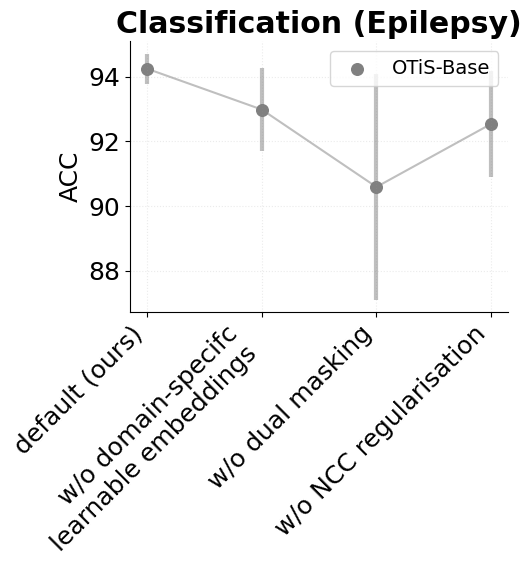

In [11]:
plt.rcParams.update({'font.size': 18})

# Sample data
# categories = ['default (ours)', 'w/o domain-specifc\nlearnable embeddings', 'w/o NCC regularisation', 'w/o large multi-domain\npre-training corpus'] #'shared\nlearnable\nembeddings', 
categories = ['default (ours)', 'w/o domain-specifc\nlearnable embeddings', 'w/o dual masking', 'w/o NCC regularisation'] #'shared\nlearnable\nembeddings', 

# ACC_base = [0.9468, 0.9444, 0.9398, 0.9283]
ACC_base = np.array([epilepsy_b_100.mean(), epilepsy_b_agnostic.mean(), epilepsy_b_randomMasking.mean(), epilepsy_b_ncc0.mean()])
ACC_base_std = np.array([epilepsy_b_100.std(), epilepsy_b_agnostic.std(), epilepsy_b_randomMasking.std(), epilepsy_b_ncc0.std()])

# # r_squared_base = [0.292, 0.280, 0.278, 0.295]
# r_squared_base = np.array([b_reg_100.mean(), b_reg_da.mean(), b_reg_rm.mean(), b_reg_ncc0.mean()])
# r_squared_base_std = np.array([b_reg_100.std(), b_reg_da.std(), b_reg_rm.std(), b_reg_ncc0.std()])

# # MSE_base = [0.157, 0.159, 0.161, 0.162]
# MSE_base = np.array([ettm2_b_100.mean(), ettm2_b_agnostic.mean(), ettm2_b_randomMasking.mean(), ettm2_b_ncc0.mean()])
# MSE_base_std = np.array([ettm2_b_100.std(), ettm2_b_agnostic.std(), ettm2_b_randomMasking.std(), ettm2_b_ncc0.std()])

# Create a figure and three subplots
fig, axs = plt.subplots(1, 1, figsize=(5.5, 6))

# Plot ACC
axs.scatter(categories, ACC_base, color="grey", marker="o", s=70, label="OTiS-Base")
axs.errorbar(categories, ACC_base, ACC_base_std, color='grey', alpha=.5, elinewidth=3, barsabove=True)
axs.set_title('Classification (Epilepsy)', fontweight='bold')
axs.set_ylabel('ACC')
# axs.set_ylim(ymin=0.65, ymax=0.8)
axs.set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.grid(True, linestyle="dotted", alpha=0.25)
# axs.set_xlabel('Number of pre-training samples')
axs.legend(fontsize="14", loc=0)

# # Plot R2
# axs.scatter(categories, r_squared_base, color="grey", marker="o", s=70)
# # axs.fill_between(categories, (r_squared_base-r_squared_base_std), (r_squared_base+r_squared_base_std), color='grey', alpha=.175)
# axs.errorbar(categories, r_squared_base, r_squared_base_std, color='grey', alpha=.5, elinewidth=3, barsabove=True)
# axs.set_title('Regression (LVSV)', fontweight='bold')
# axs.set_ylabel('$R^2$')
# # axs.set_ylim(ymin=0.45, ymax=0.8)
# axs.set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
# axs.spines['top'].set_visible(False)
# axs.spines['right'].set_visible(False)
# axs.grid(True, linestyle="dotted", alpha=0.25)
# # axs.set_xlabel('Number of pre-training samples')

# # Plot MSE
# axs.scatter(categories, MSE_base, color="grey", marker="o", s=70)
# axs.errorbar(categories, MSE_base, MSE_base_std, color='grey', alpha=.5, elinewidth=3, barsabove=True)
# axs.set_title('Forecasting (ETTm2)', fontweight='bold')
# axs.set_ylabel('MSE')
# # axs.set_ylim(ymin=0.1, ymax=0.35)
# axs.set_xticks([lbl for lbl in range(len(categories))], categories, rotation=45, ha='right')
# axs.spines['top'].set_visible(False)
# axs.spines['right'].set_visible(False)
# axs.grid(True, linestyle="dotted", alpha=0.25)
# # axs.set_xlabel('Number of pre-training samples')

# Adjust layout
plt.tight_layout()

# plt.savefig("./../figures/ablation.png", dpi=160)
# plt.savefig("../figures/ablation_for_new.pdf")

# Show plot
plt.show()

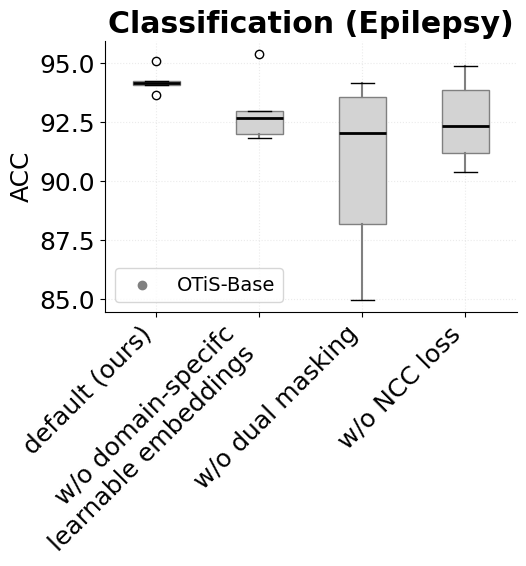

In [61]:
plt.rcParams.update({'font.size': 18})

# Sample data
categories = ['default (ours)', 'w/o domain-specifc\nlearnable embeddings', 'w/o dual masking', 'w/o NCC loss']

# ACC_base 
ACC_base = [epilepsy_b_100, epilepsy_b_agnostic, epilepsy_b_randomMasking, epilepsy_b_ncc0]  # These should be lists or arrays

R2_base = [b_reg_100, b_reg_da, b_reg_rm, b_reg_ncc0]

MSE_base = [ettm2_b_100, ettm2_b_agnostic, ettm2_b_randomMasking, ettm2_b_ncc0]


# Create a figure for the boxplot
fig, axs = plt.subplots(1, 1, figsize=(5.5, 6))

# Plot boxplot for ACC_base
axs.boxplot(ACC_base, patch_artist=True, boxprops=dict(facecolor='lightgrey', color='grey'),
            medianprops=dict(color='black', linewidth=2), whiskerprops=dict(color='grey', linewidth=1.5))

# axs.boxplot(R2_base, patch_artist=True, boxprops=dict(facecolor='lightgrey', color='grey'),
#             medianprops=dict(color='black', linewidth=2), whiskerprops=dict(color='grey', linewidth=1.5))

# axs.boxplot(MSE_base, patch_artist=True, boxprops=dict(facecolor='lightgrey', color='grey'),
#             medianprops=dict(color='black', linewidth=2), whiskerprops=dict(color='grey', linewidth=1.5))

# Set title and labels
axs.set_title('Classification (Epilepsy)', fontweight='bold')
axs.set_ylabel('ACC')
axs.set_xticks([i + 1 for i in range(len(categories))], categories, rotation=45, ha='right')
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.grid(True, linestyle="dotted", alpha=0.25)

base_model_legend = axs.scatter([], [], label='OTiS-Base', color="grey")

# Show the legend
axs.legend(handles=[base_model_legend], fontsize=14)

# axs.set_title('Regression (LVSV)', fontweight='bold')
# axs.set_ylabel('$R^2$')
# axs.set_xticks([i + 1 for i in range(len(categories))], categories, rotation=45, ha='right')
# axs.spines['top'].set_visible(False)
# axs.spines['right'].set_visible(False)
# axs.grid(True, linestyle="dotted", alpha=0.25)

# axs.set_title('Forecasting (ETTm2)', fontweight='bold')
# axs.set_ylabel('MSE')
# axs.set_xticks([i + 1 for i in range(len(categories))], categories, rotation=45, ha='right')
# axs.spines['top'].set_visible(False)
# axs.spines['right'].set_visible(False)
# axs.grid(True, linestyle="dotted", alpha=0.25)

# Adjust layout
plt.tight_layout()

plt.savefig("../figures/ablation_cls_box.pdf")

# Show plot
plt.show()

In [17]:
ckpt = torch.load("/home/oturgut/otis/checkpoints/rebuttal/ticorp/multivariate/domain_agnostic/dual_masking/cos_weight0.0/ncc_weight0.1/seed0/baseDeep_dec160d4b/t1008/p1x24/wd0.1/m0.75/pre_b3744_blr3e-5/checkpoint-196-ncc-0.8848.pth", map_location='cpu')

In [20]:
ckpt.keys()

dict_keys(['model', 'optimizer', 'epoch', 'scaler', 'args', 'domains', 'domain_offsets'])

In [21]:
ckpt["domain_offsets"]

{'audio_mono': 0,
 'audio_stereo': 0,
 'banking': 0,
 'ecg': 0,
 'economics': 0,
 'eeg_10-20': 0,
 'electromechanics': 0,
 'temperature': 0}

In [22]:
ckpt["domain_offsets"]["aha"] = 0

In [23]:
ckpt["domain_offsets"]

{'audio_mono': 0,
 'audio_stereo': 0,
 'banking': 0,
 'ecg': 0,
 'economics': 0,
 'eeg_10-20': 0,
 'electromechanics': 0,
 'temperature': 0,
 'aha': 0}